In [1]:
import matplotlib.pyplot as plt

In [96]:
import torch
import random
from grokking import GPT, gen_train_test

frac_train = 0.3
p = 113
seed = 0
train, test = gen_train_test(frac_train, p, seed)
sample = random.sample(train+test, 500)

def gen_test_result(model_path, sample):
    result = torch.load(model_path, map_location='cpu')
    model = GPT(p, d_model=128, nhead=4, num_layers=1, dropout=0.00)
    model.load_state_dict(result['model'])
    model.eval()

    # print(model)
    results = []
    model.pos_encoder.register_forward_hook(lambda self, input, output: results.append(("pos_encoder", output)))
    layer = model.transformer_encoder.layers[0]
    layer.self_attn.register_forward_hook(lambda self, input, output: results.append(("self_attn", output[0])))
    layer.norm1.register_forward_hook(lambda self, input, output: results.append(("norm1", output)))
    layer.linear1.register_forward_hook(lambda self, input, output: results.append(("linear1", output)))
    layer.norm2.register_forward_hook(lambda self, input, output: results.append(("norm2", output)))
    layer.linear2.register_forward_hook(lambda self, input, output: results.append(("linear2", output)))

    sample = torch.tensor(sample)
    model(sample.t())

    return results
results = gen_test_result('save/results_1000.pth', sample)

In [52]:
import umap
import numpy as np

data = umap.UMAP(n_neighbors=5, min_dist=0.3).fit(data)

/tmp/ipykernel_6132/1785319104.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.embedding_[:, 0], data.embedding_[:, 1], s=1.0, cmap='Spectral')


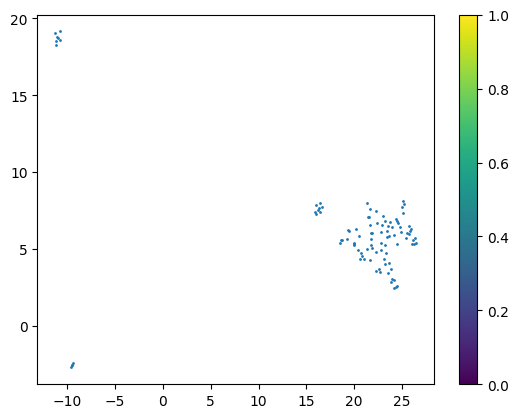

In [53]:
plt.scatter(data.embedding_[:, 0], data.embedding_[:, 1], s=1.0, cmap='Spectral')
plt.colorbar()

In [100]:
# show results of models processing by UMAP
from matplotlib import tight_layout
from matplotlib.pyplot import xlim


def show_results(results):
    for result in results:
        name = result[0]
        data = result[1].detach().cpu().numpy()
        print(name)
        plt.figure(figsize=(20, 5), tight_layout=True)
        plt.title(name)
        for i in range(len(data)):
            processed = umap.UMAP().fit_transform(data[i])
            if i == 0:
                transform = umap.UMAP().fit(data[i])
            processed = transform.transform(data[i])
            if i == 0:
                xmin = processed[:, 0].min() * 1.1
                xmax = processed[:, 0].max() * 1.1
                ymin = processed[:, 1].min() * 1.1
                ymax = processed[:, 1].max() * 1.1
            plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))
            plt.scatter(processed[:, 0], processed[:, 1])

        # plt.colorbar()
        plt.show()

save/results_0.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


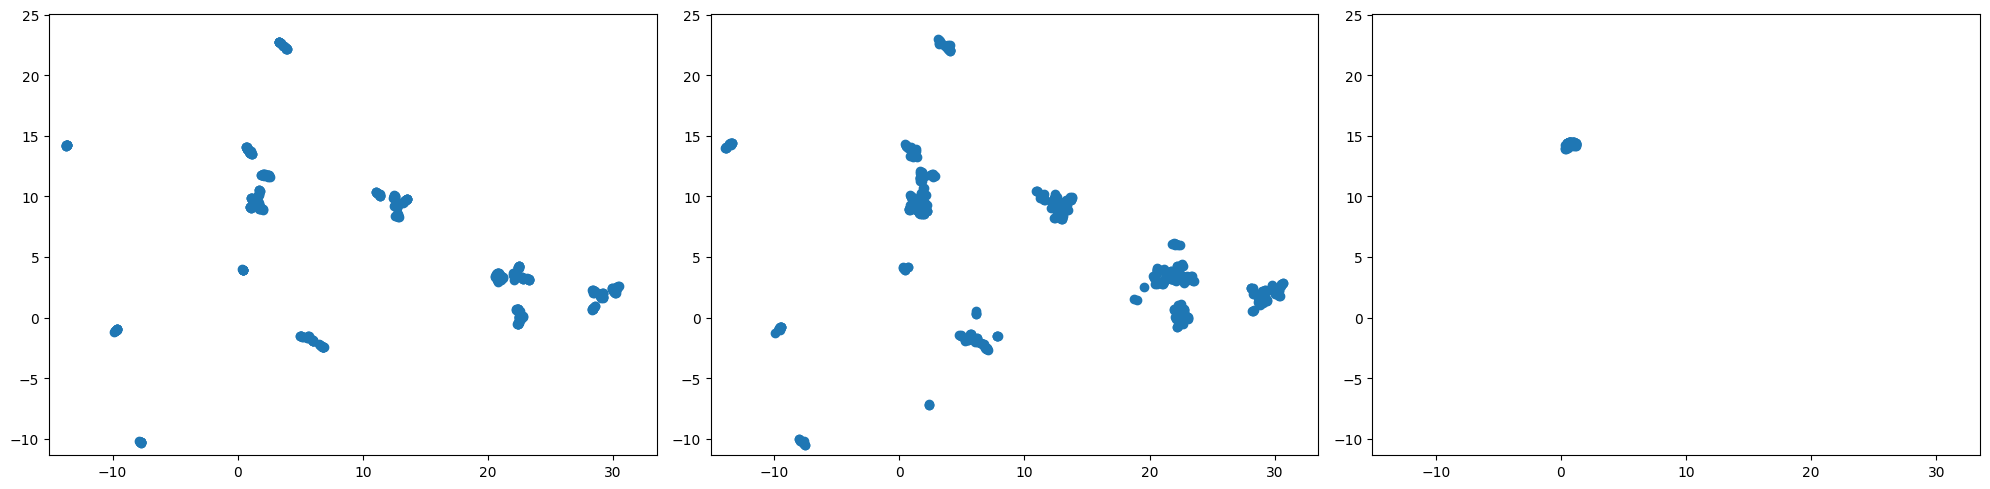

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


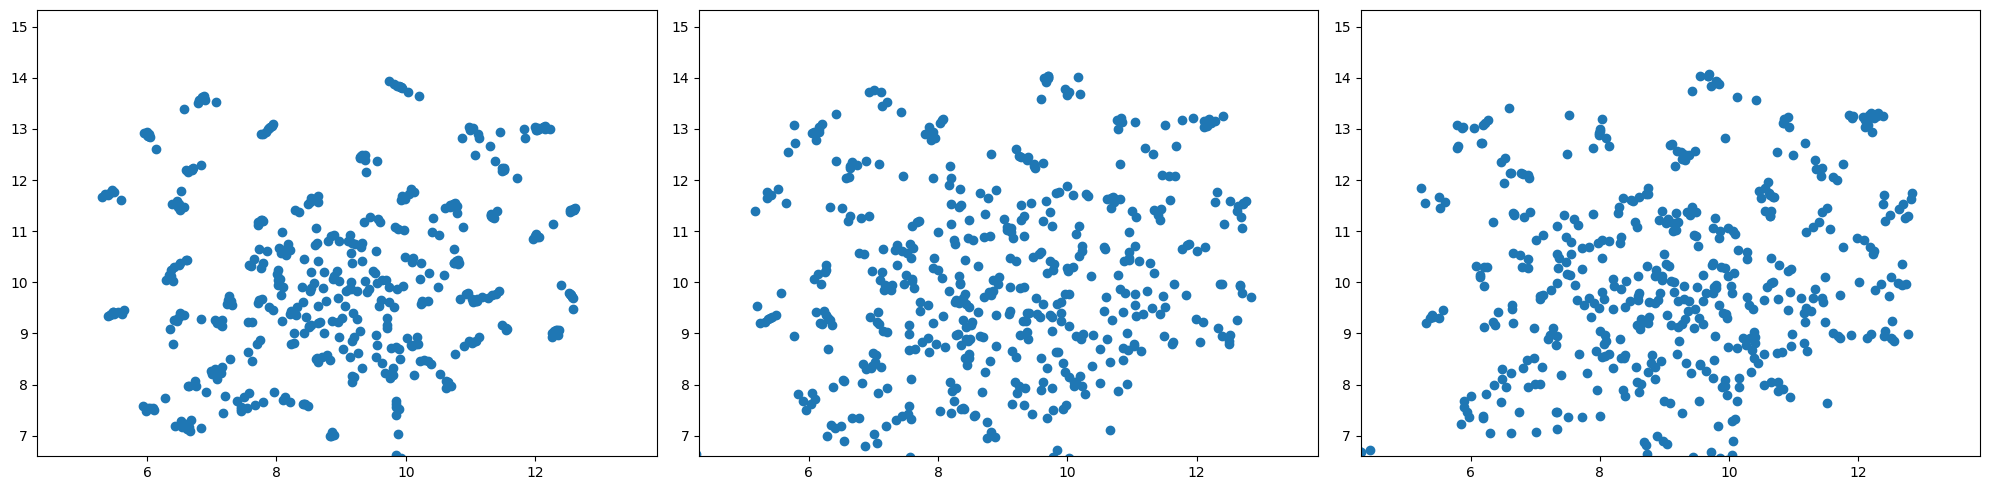

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


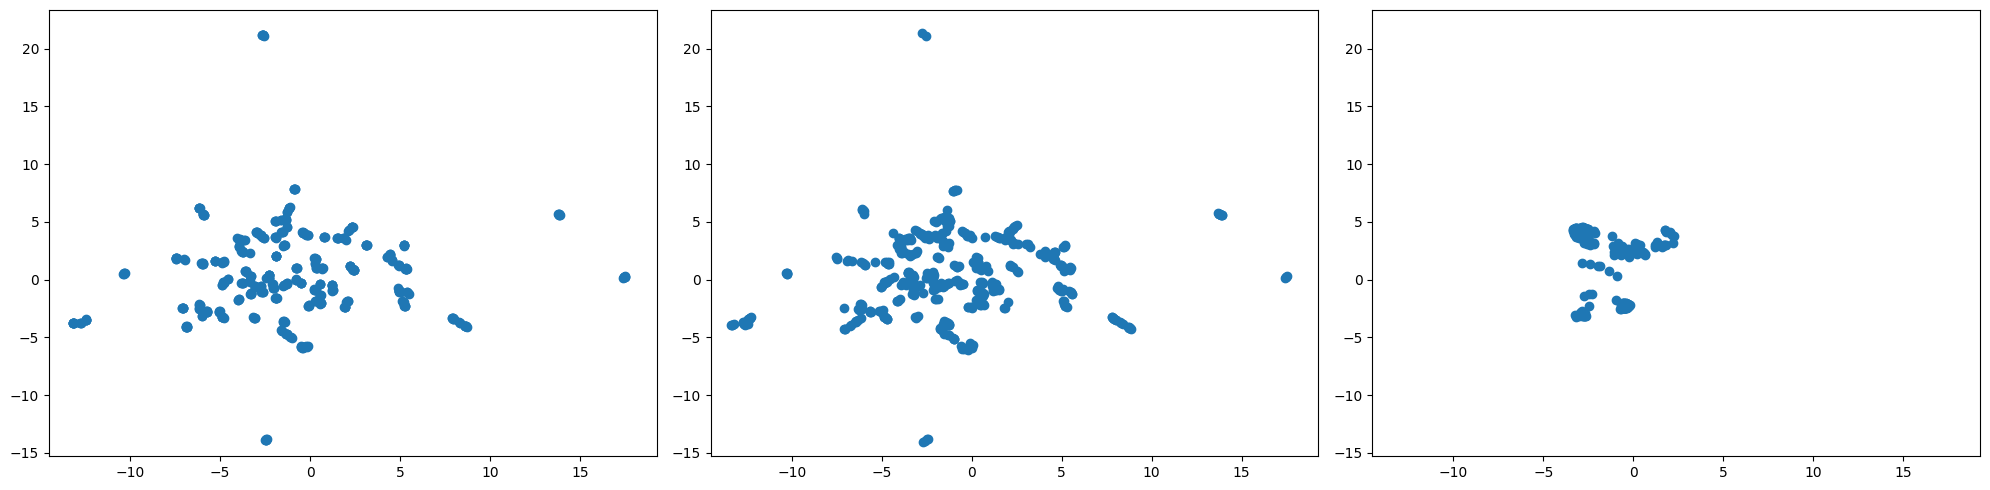

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


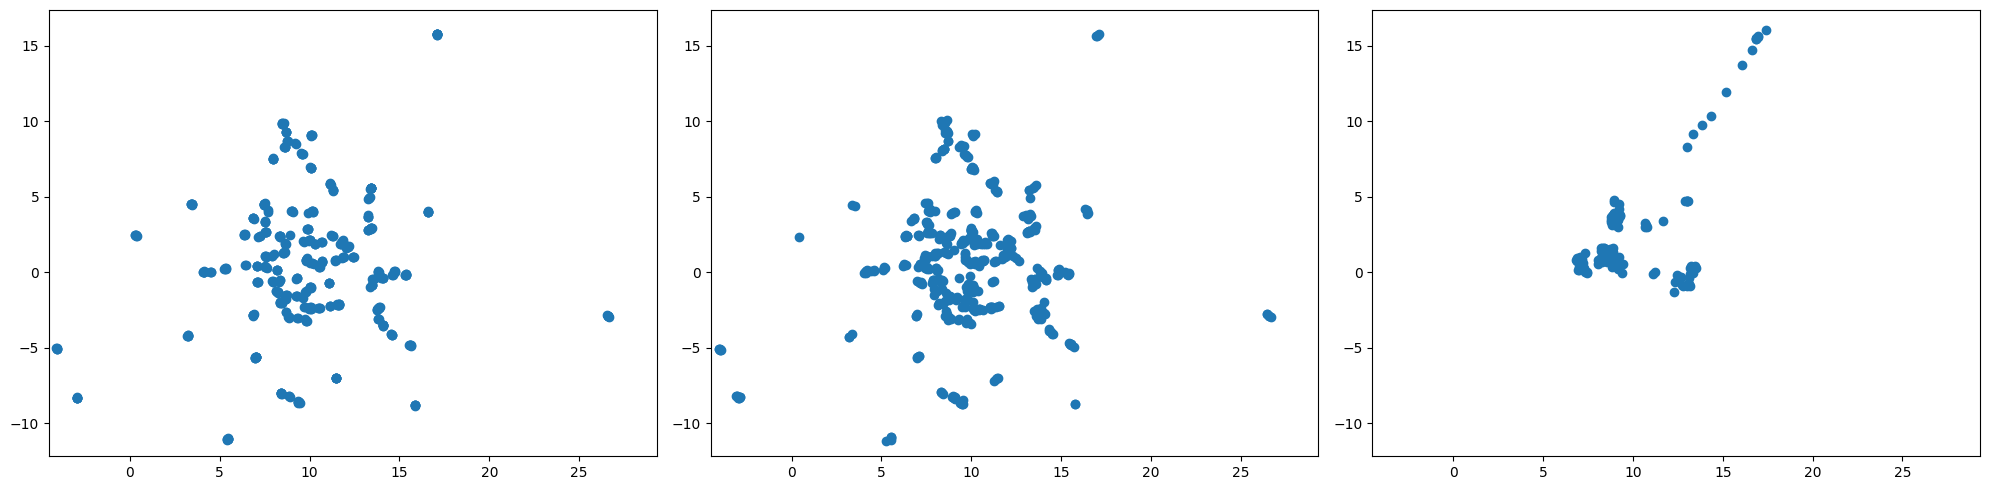

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


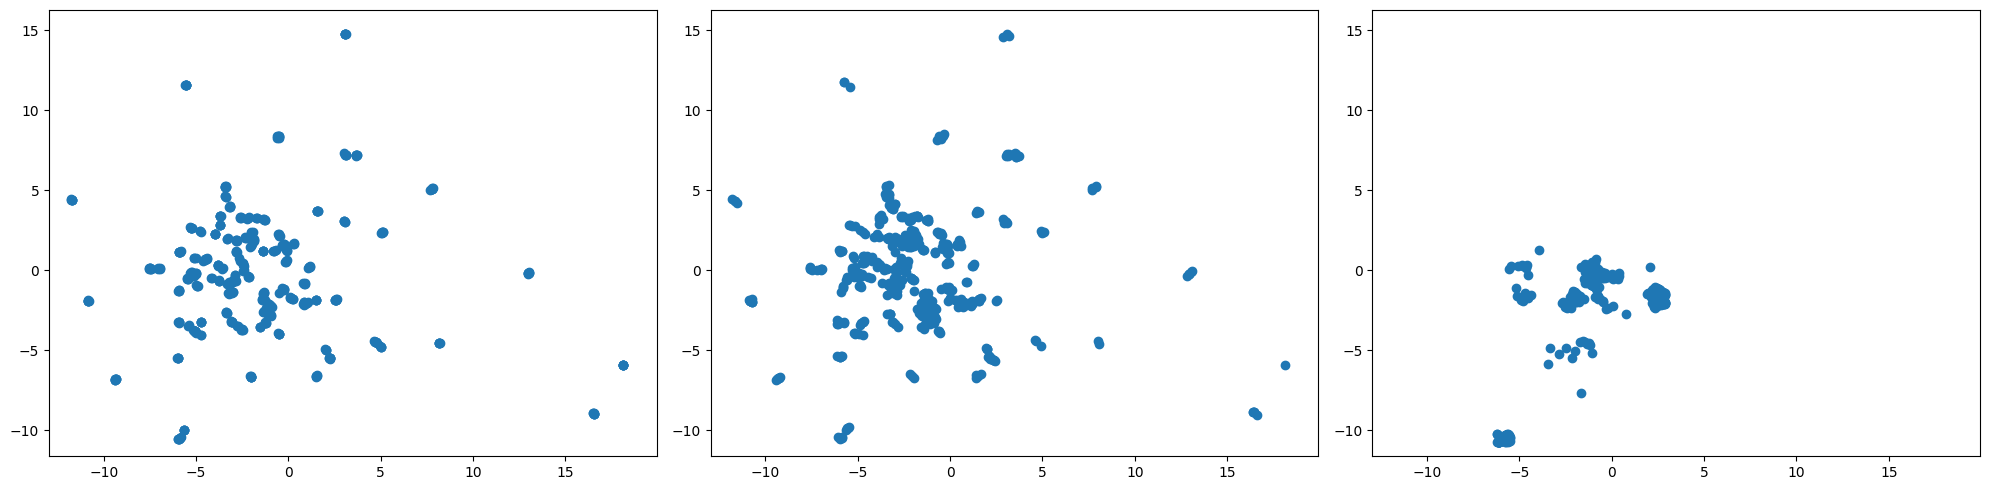

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


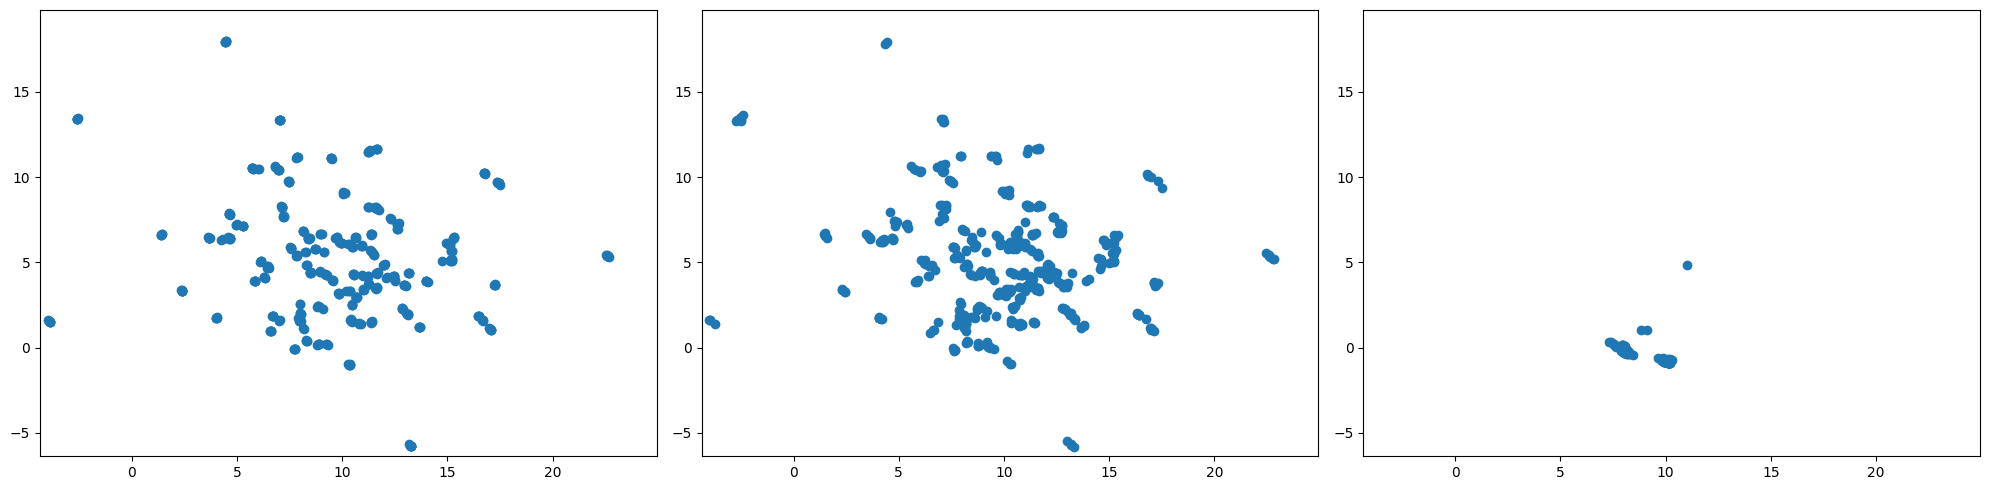

save/results_1000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


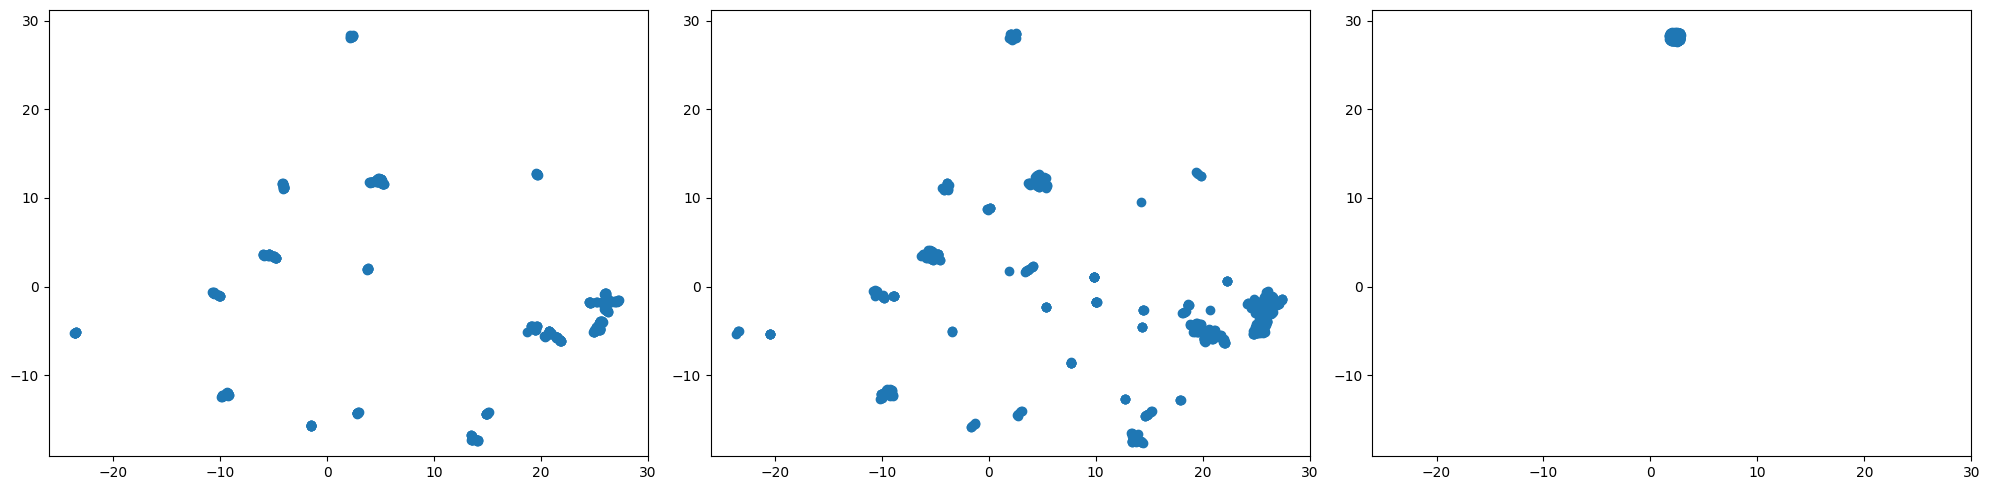

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


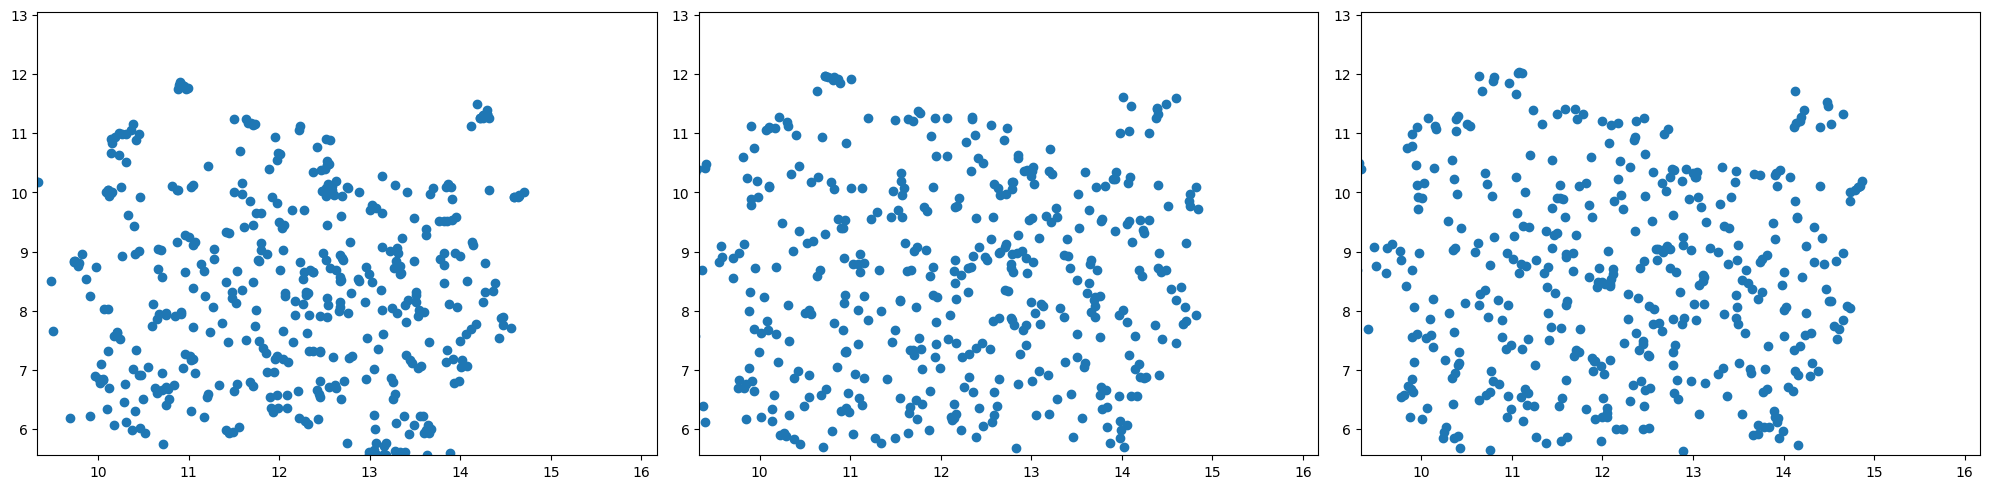

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


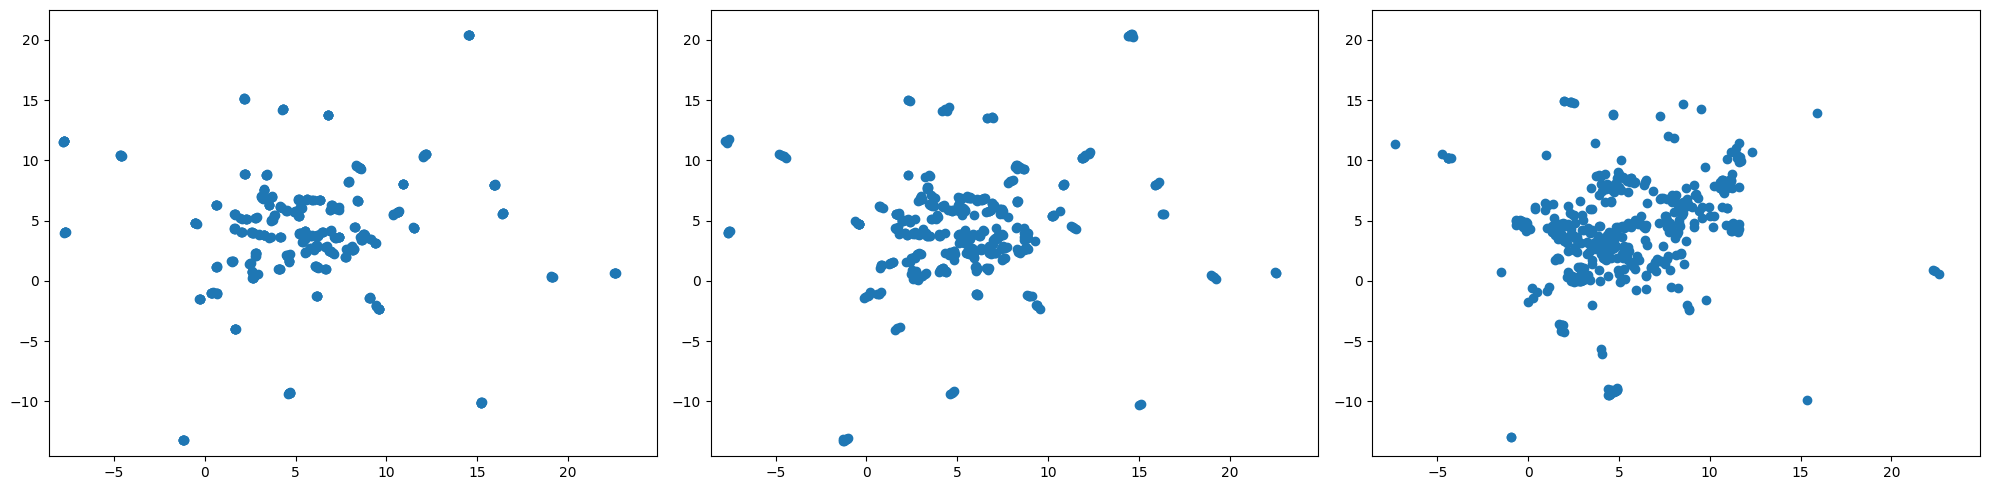

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


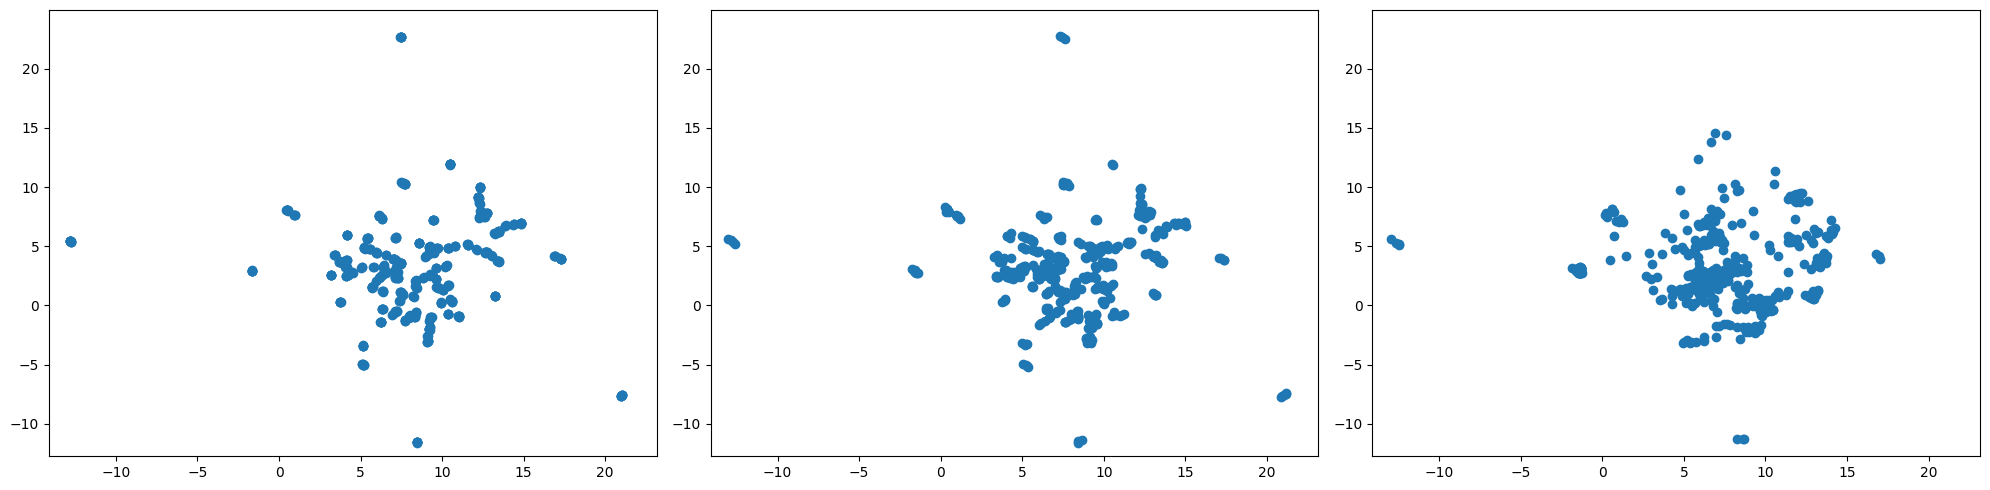

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


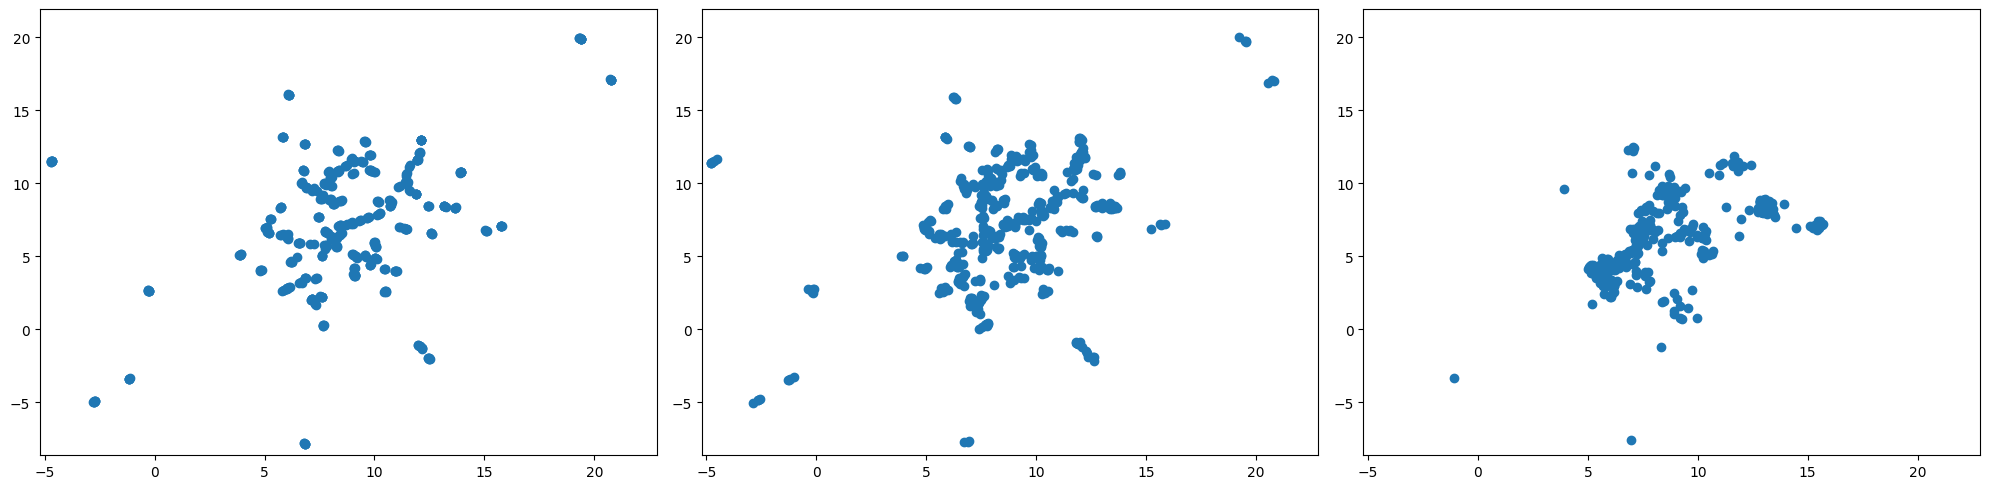

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


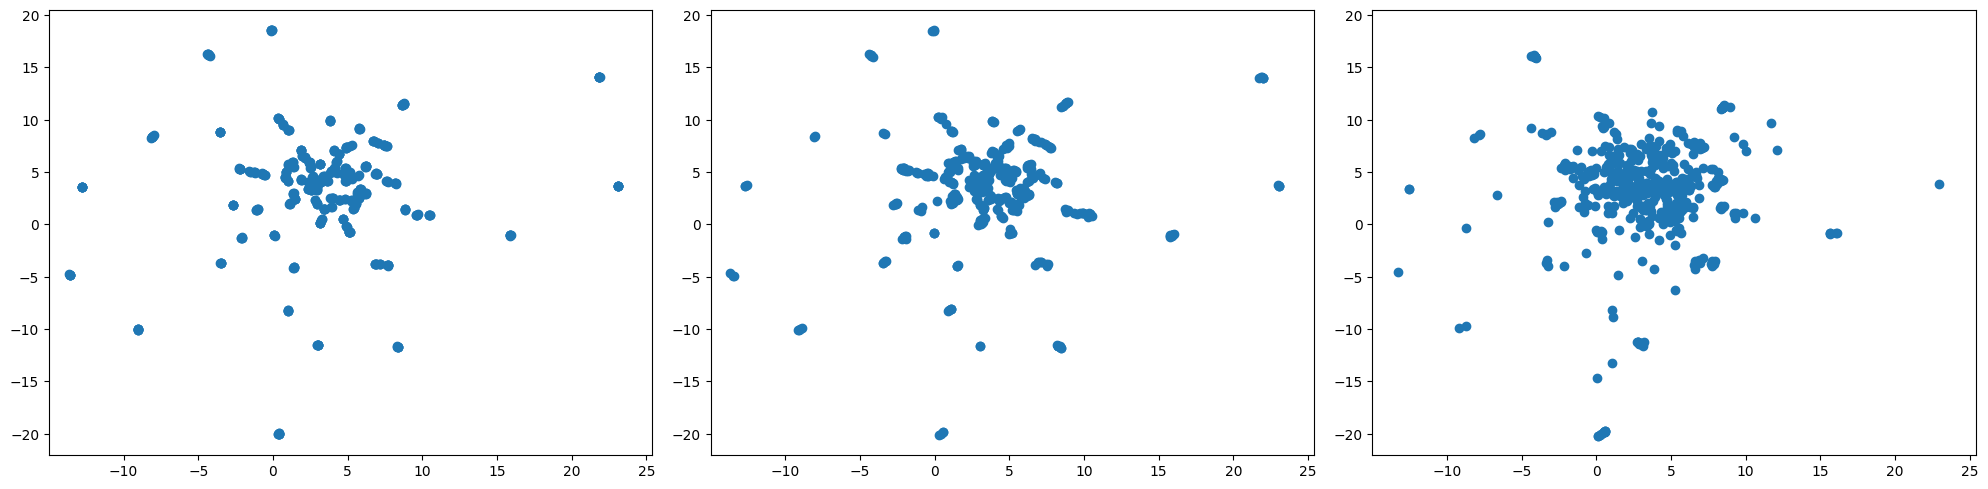

save/results_2000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


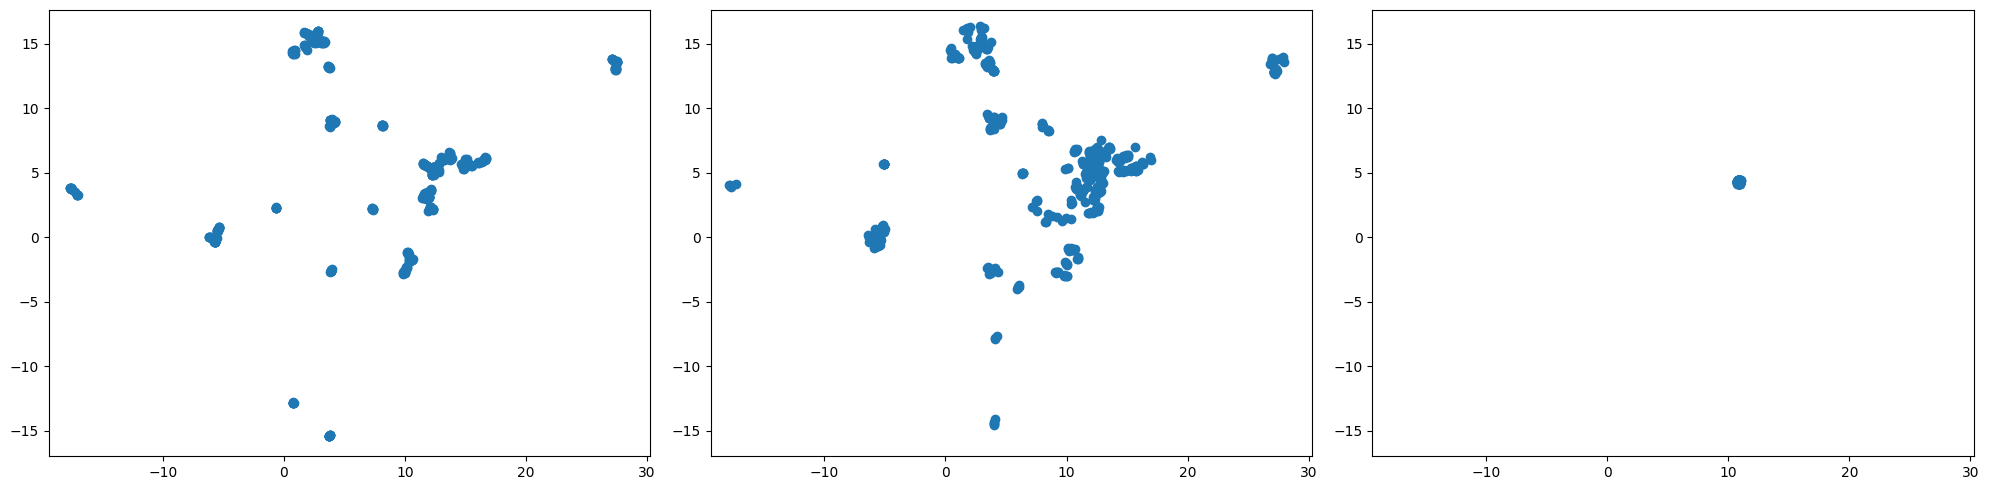

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


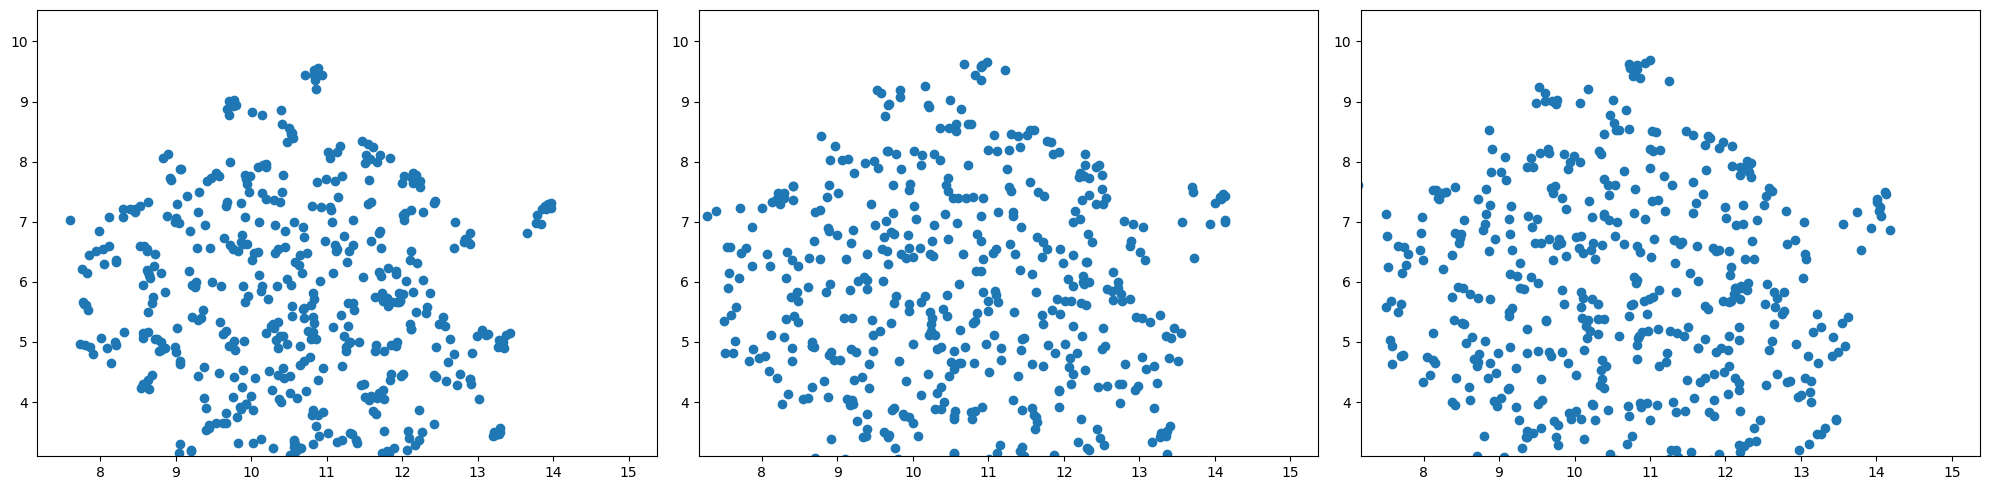

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


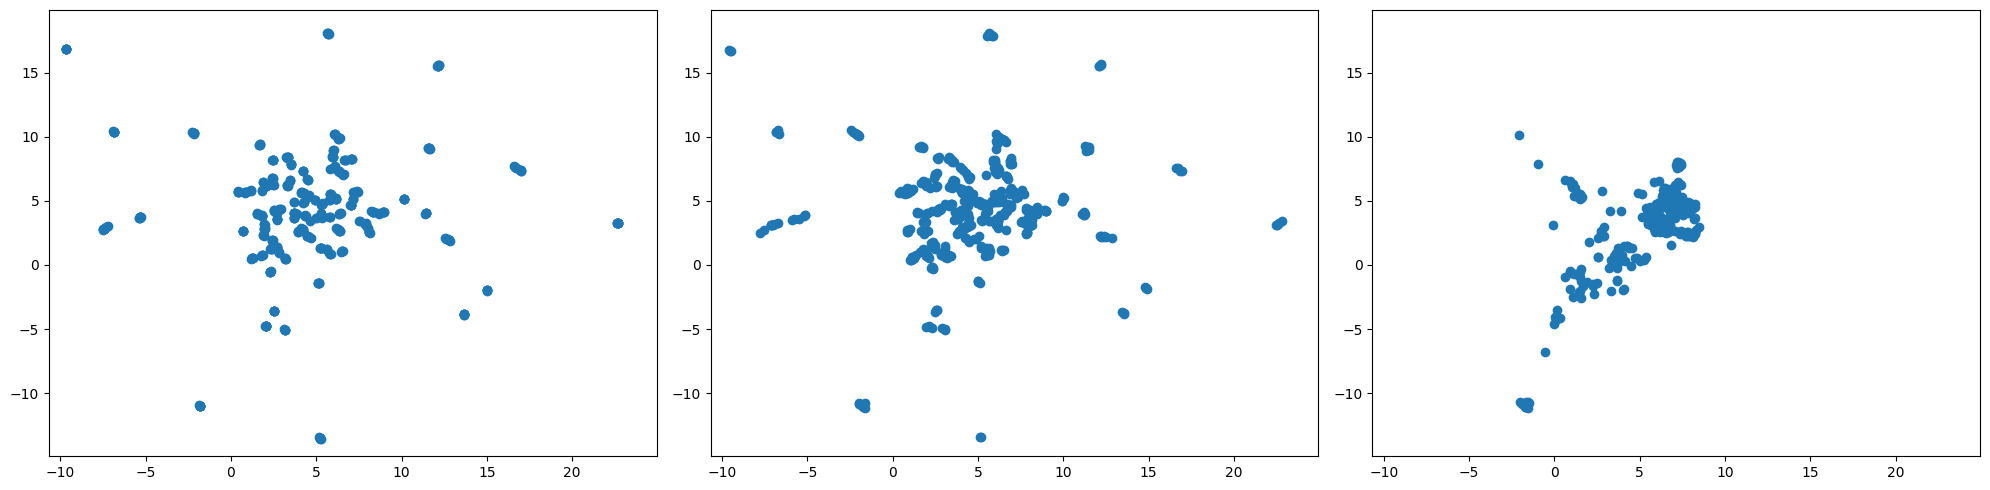

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


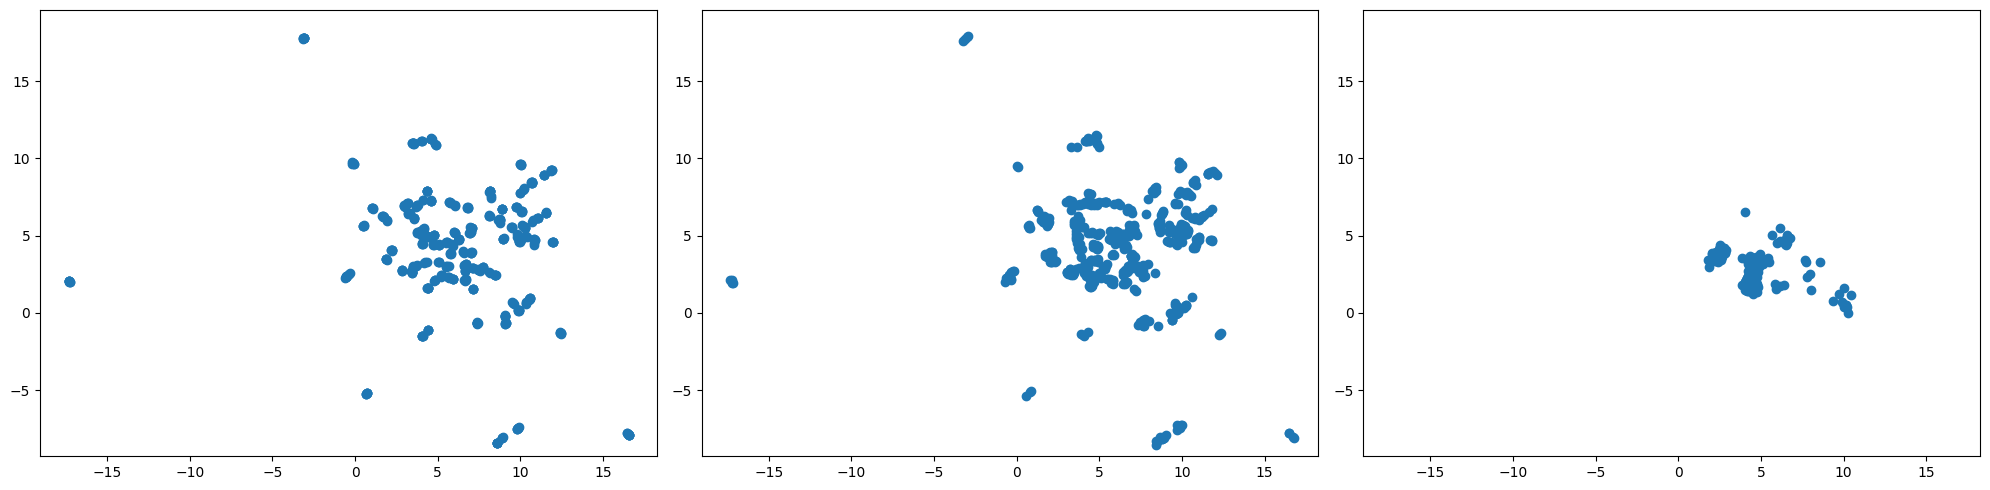

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


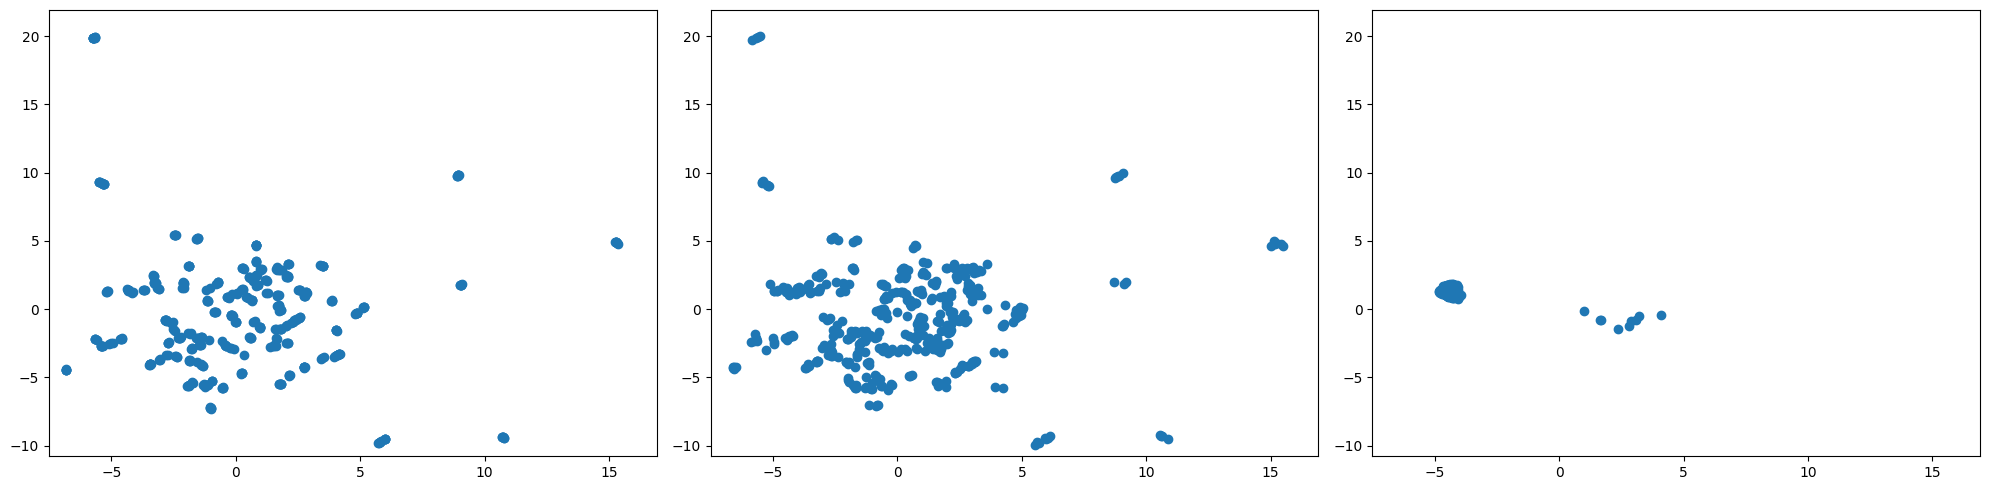

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


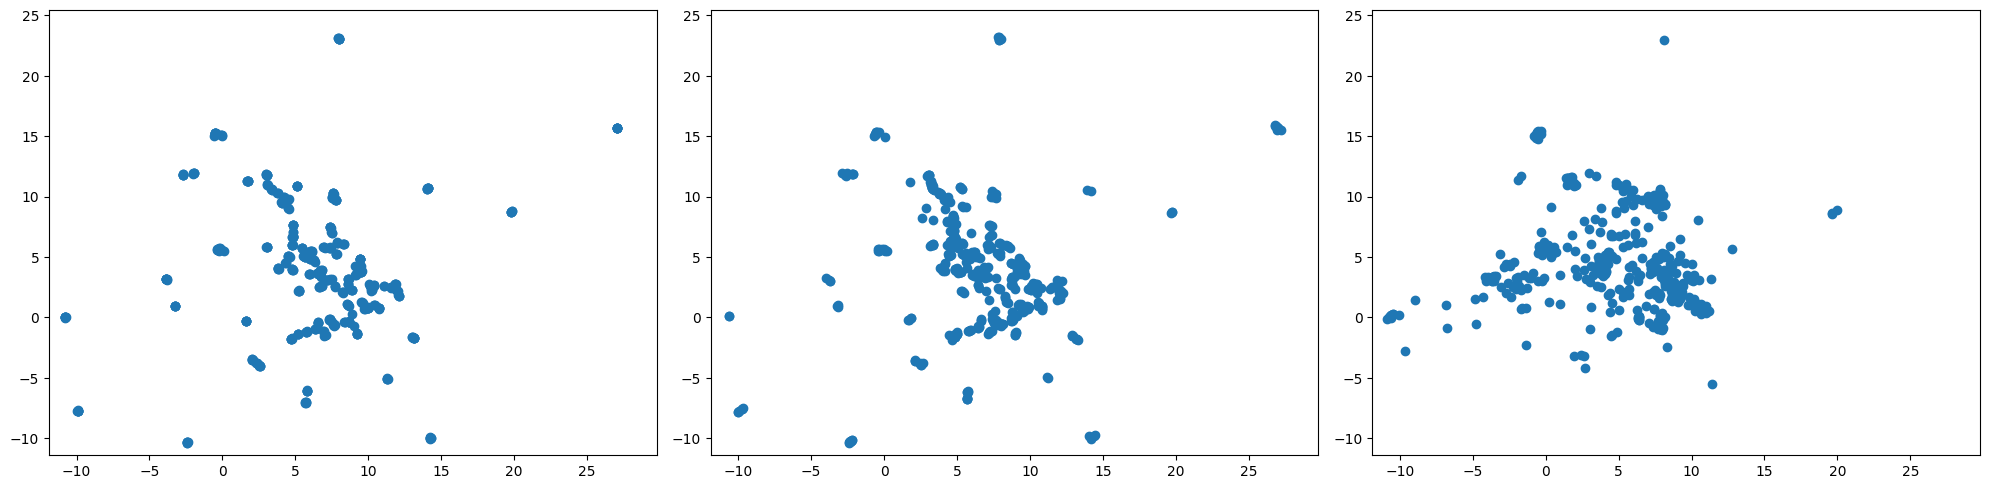

save/results_8000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


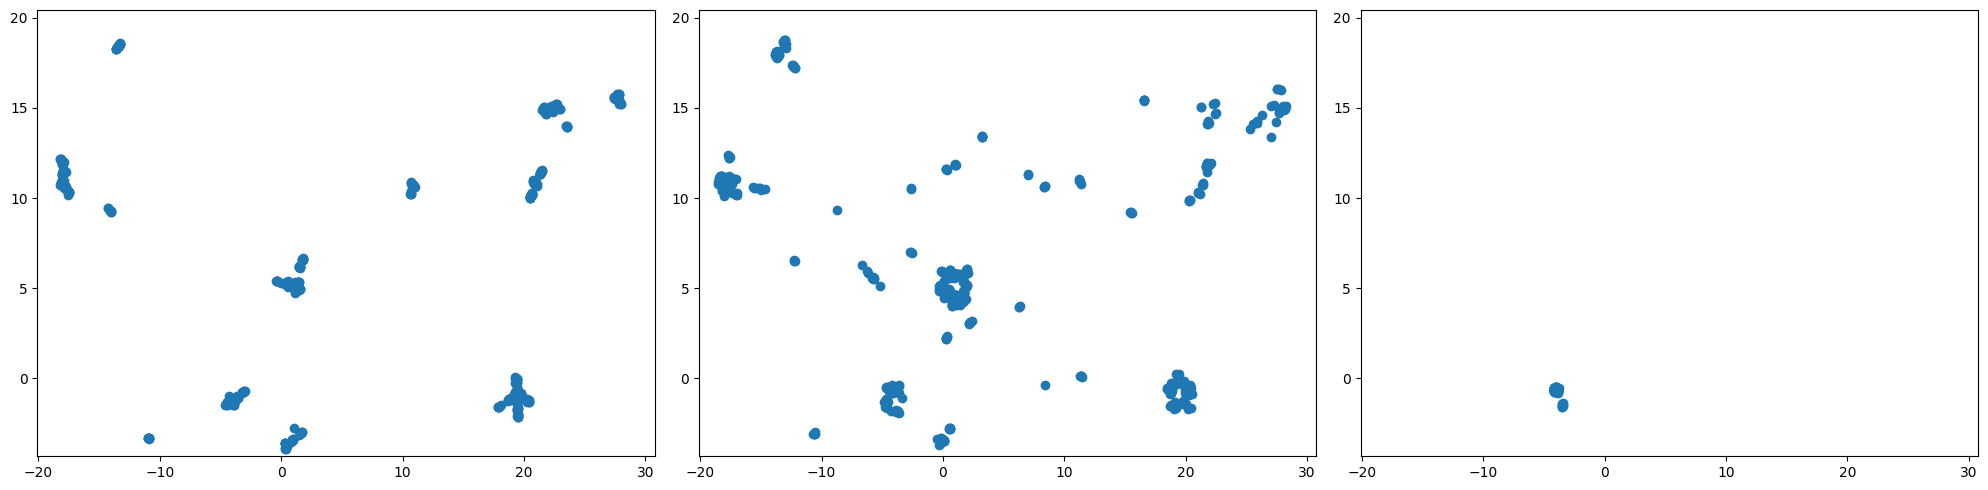

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


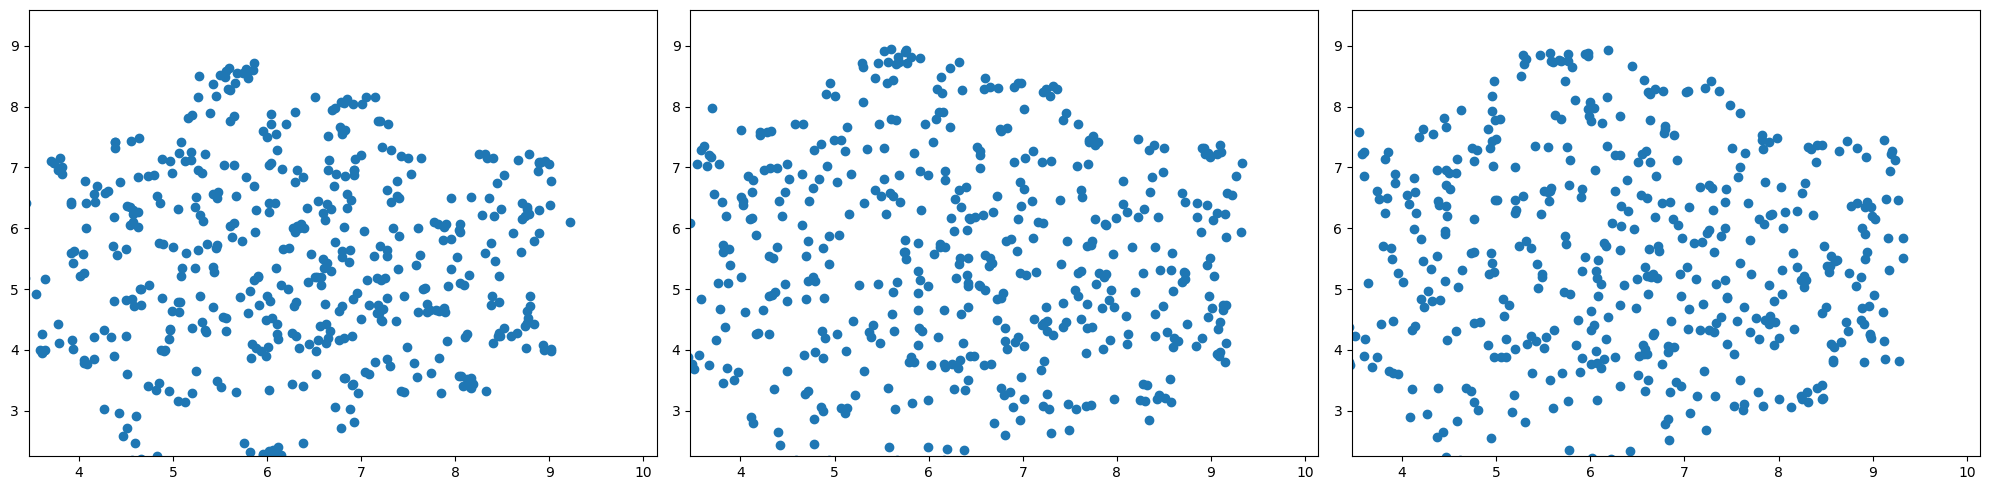

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


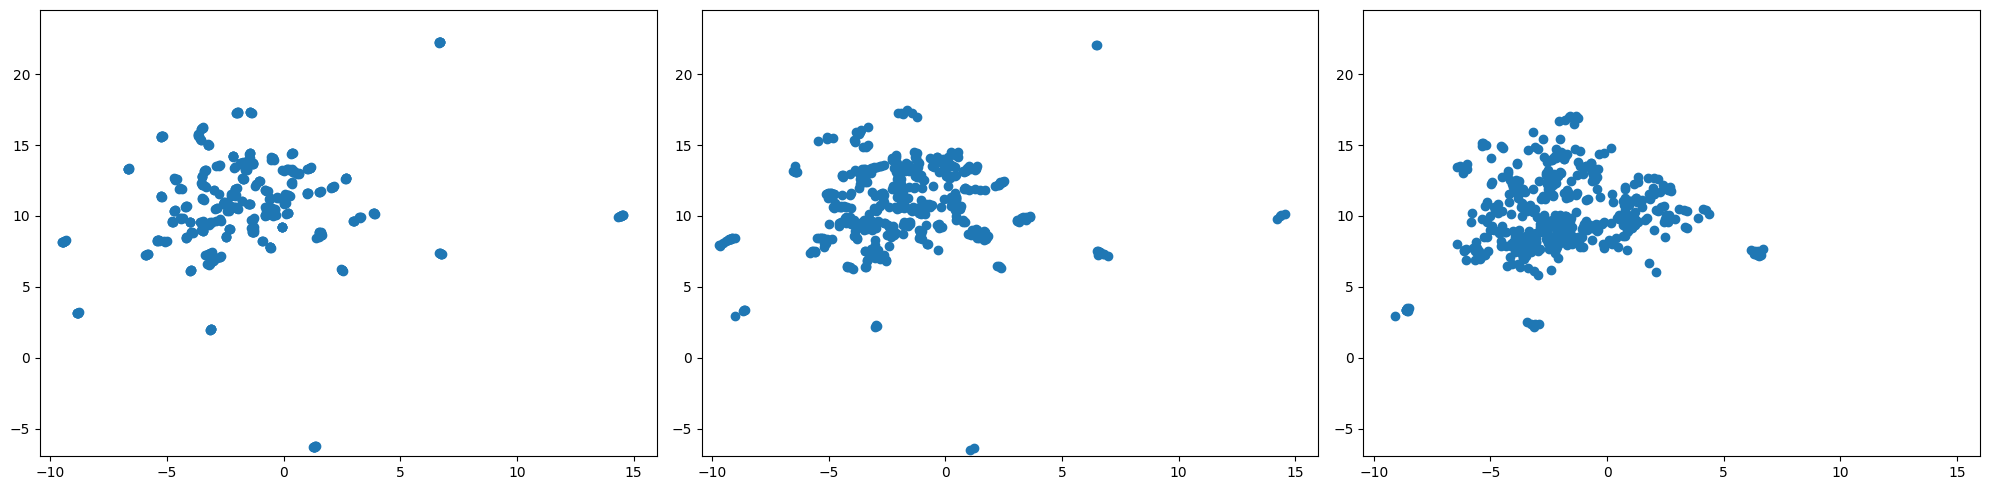

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


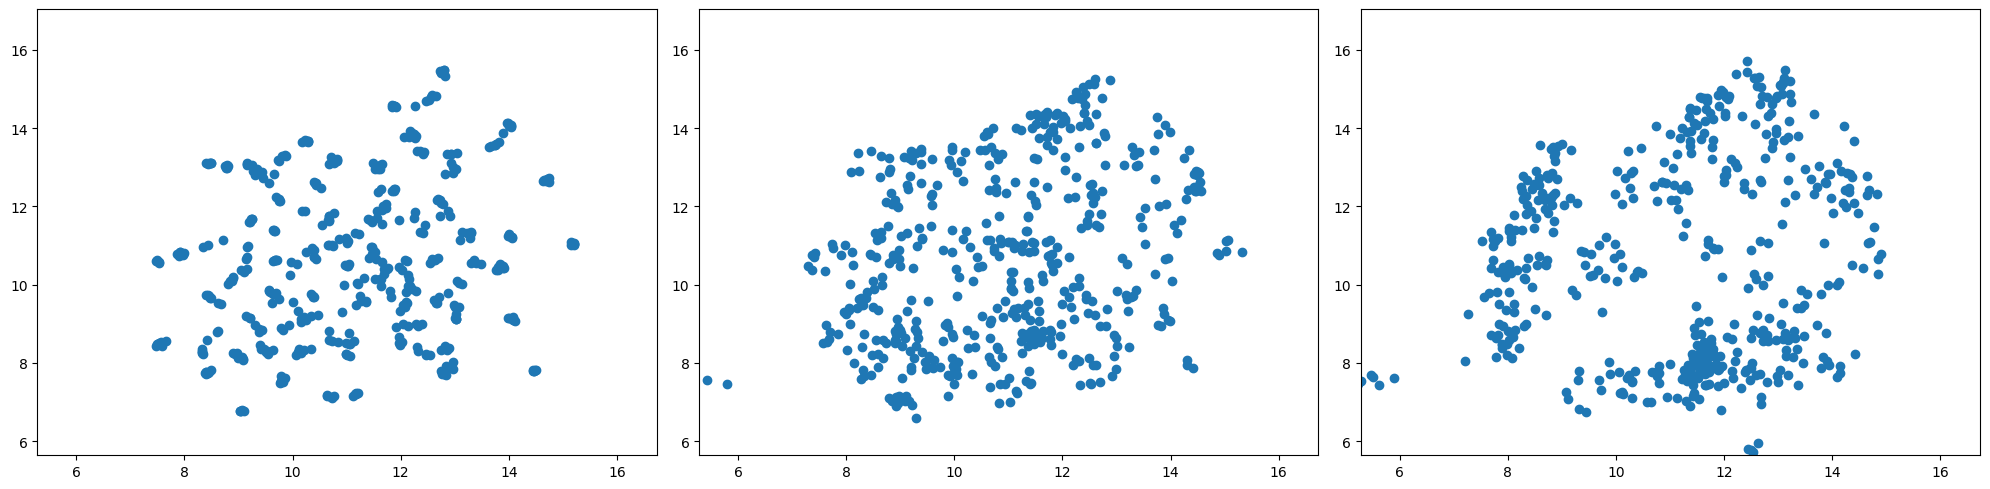

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


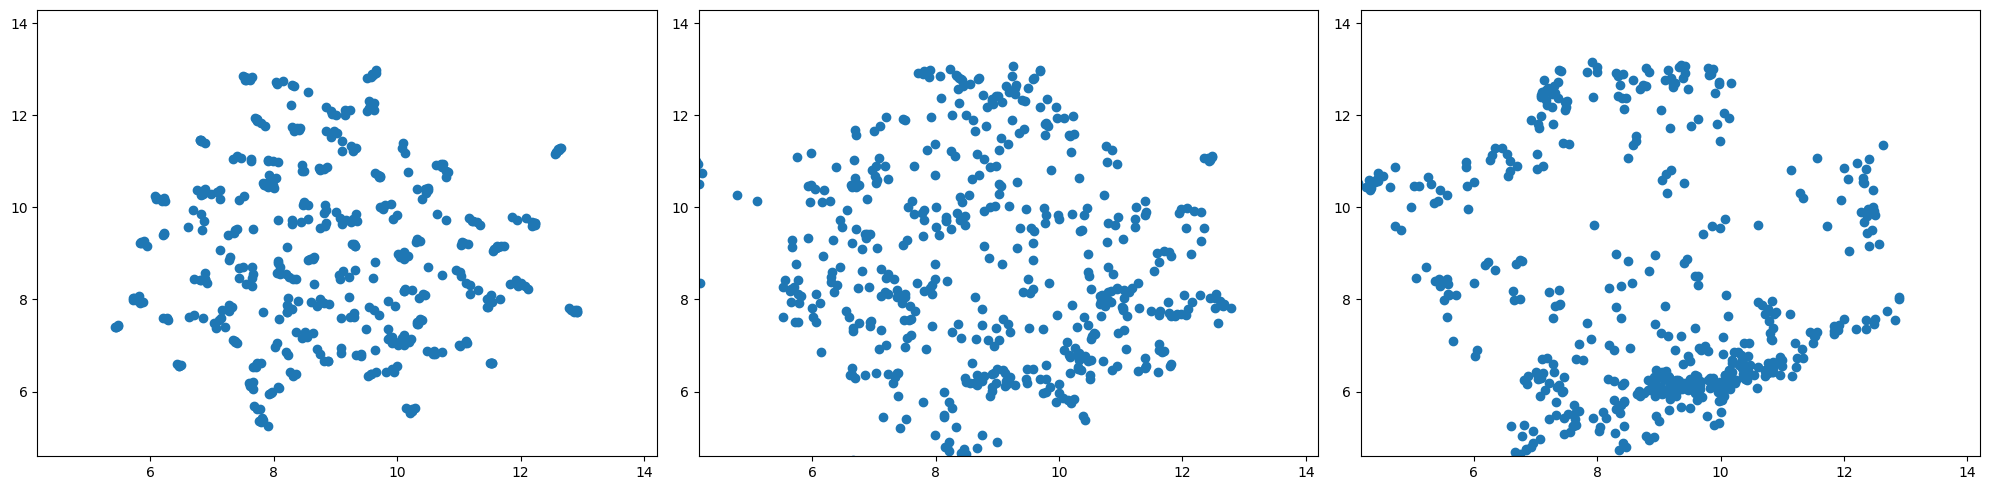

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


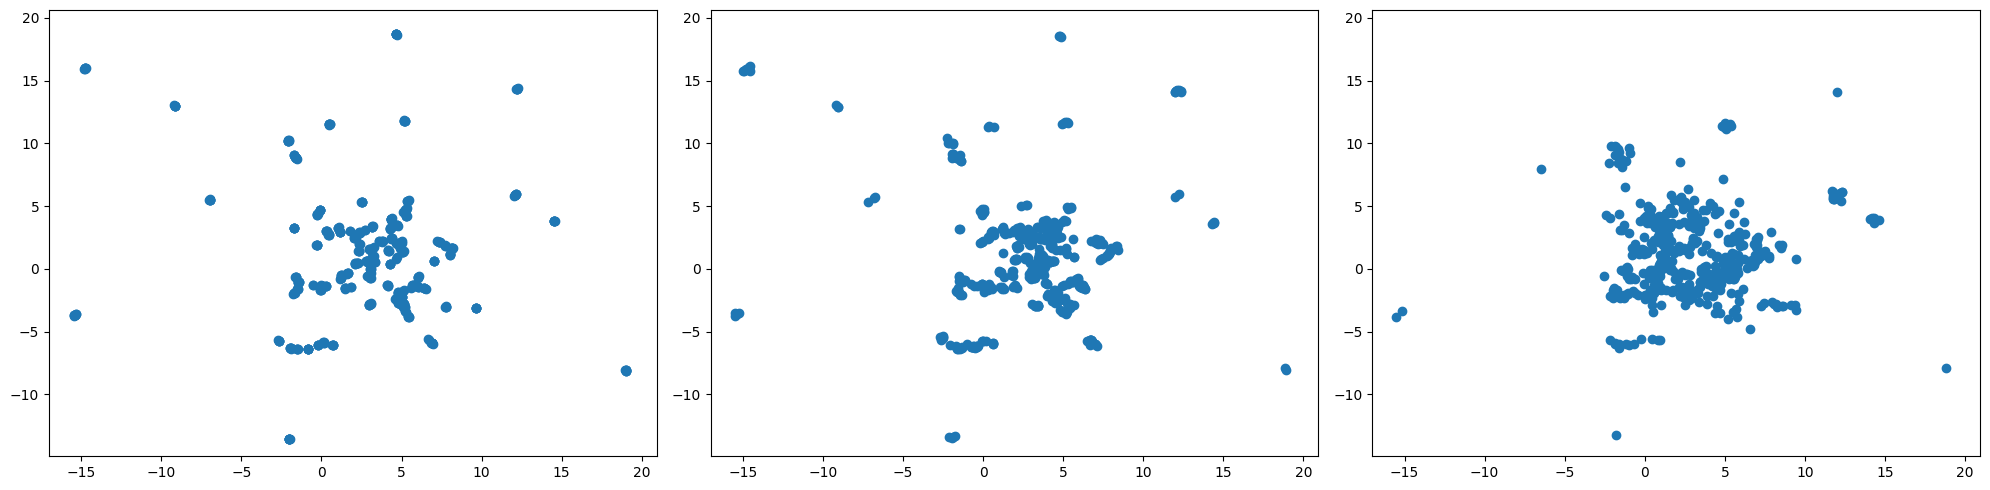

save/results_9000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


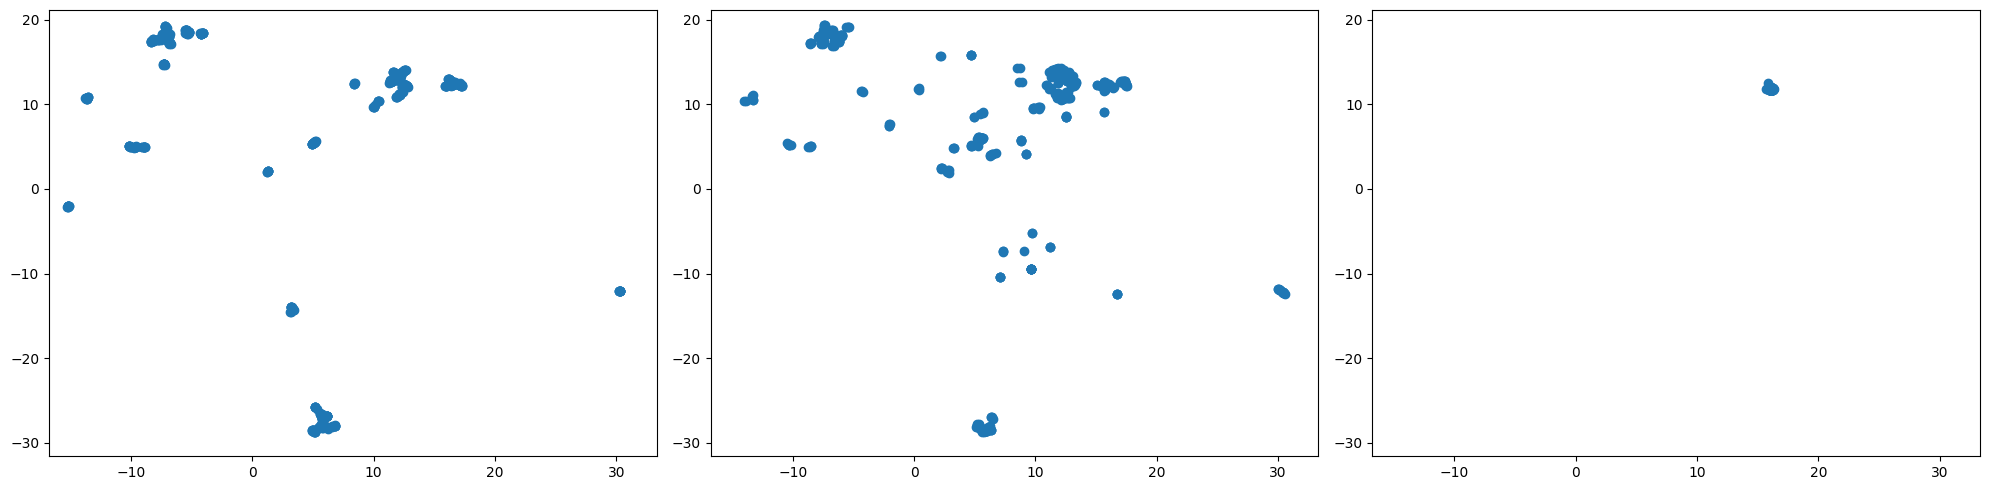

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


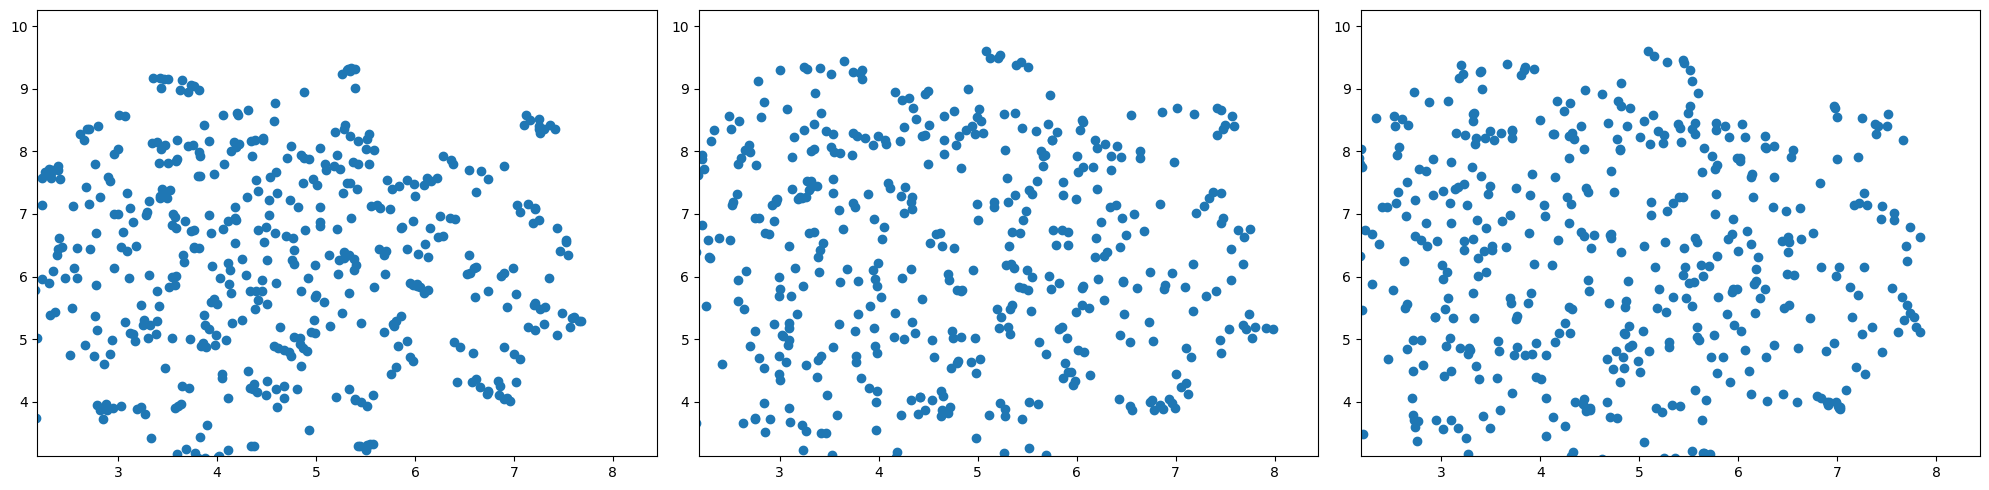

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


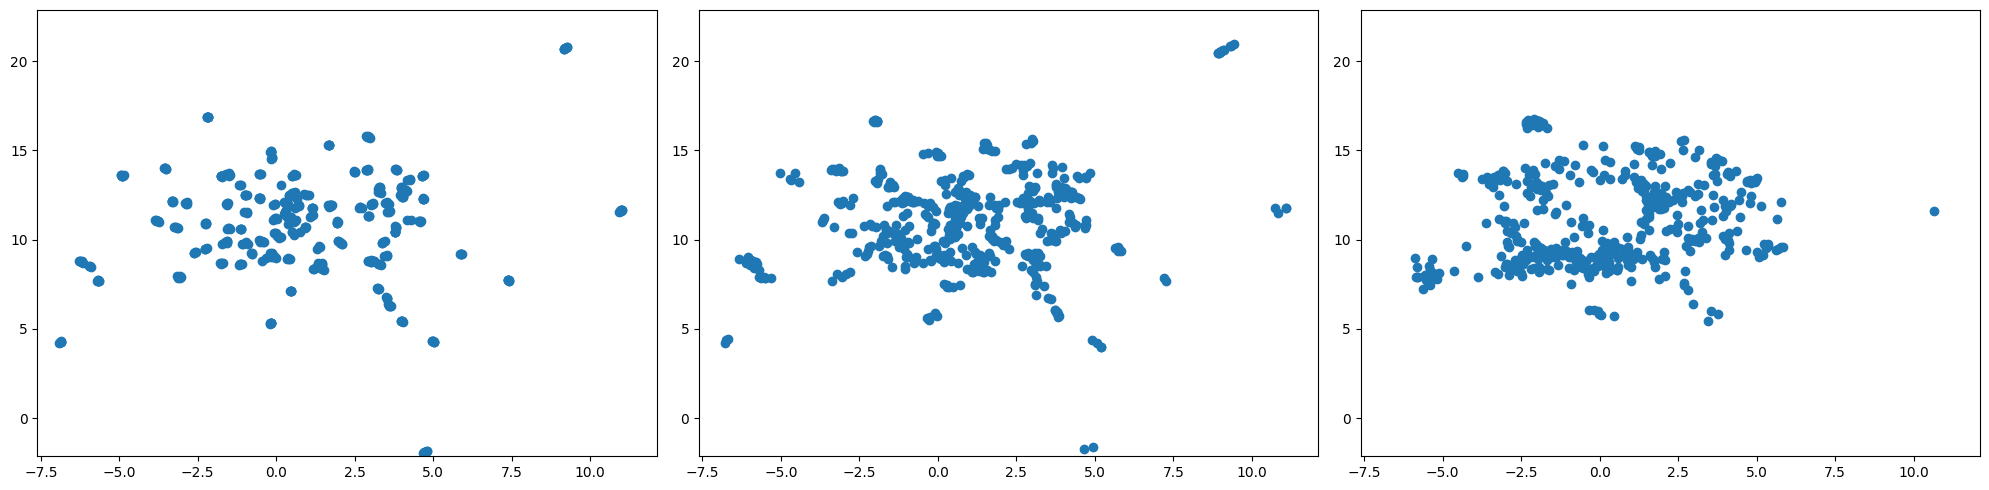

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


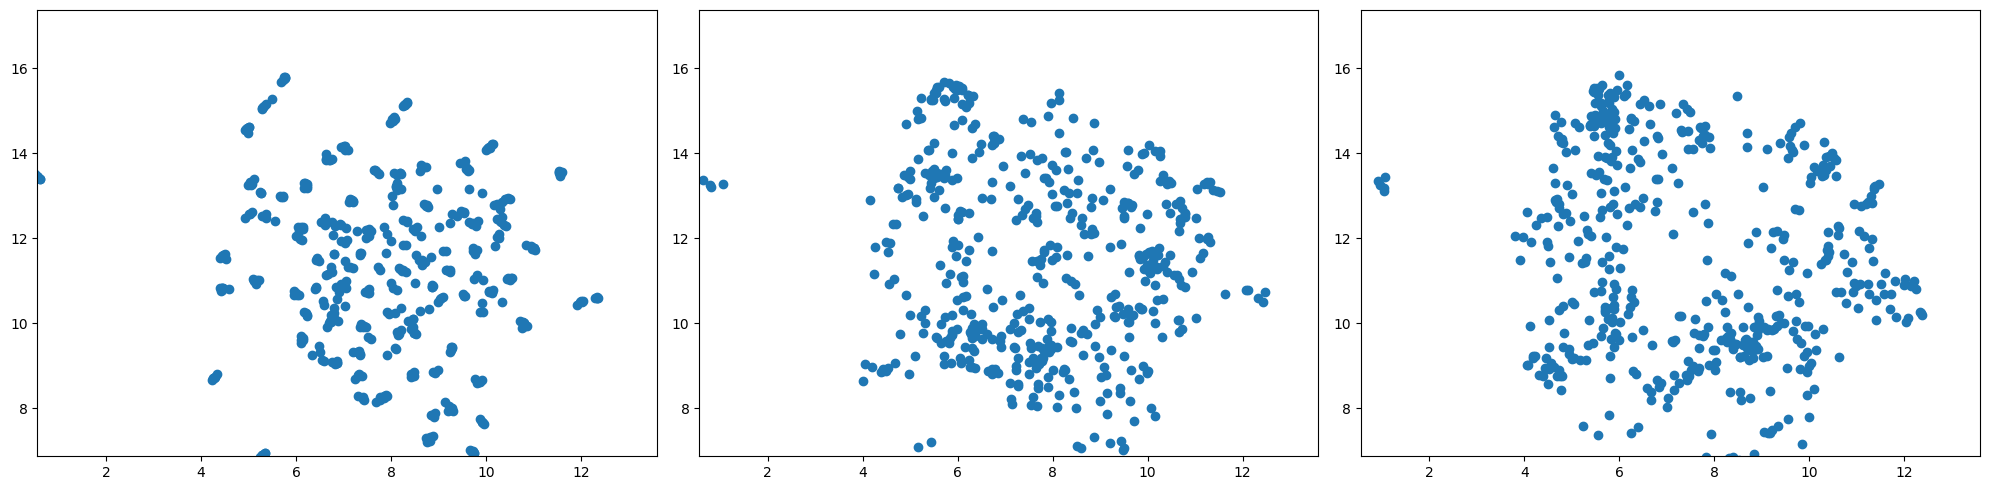

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


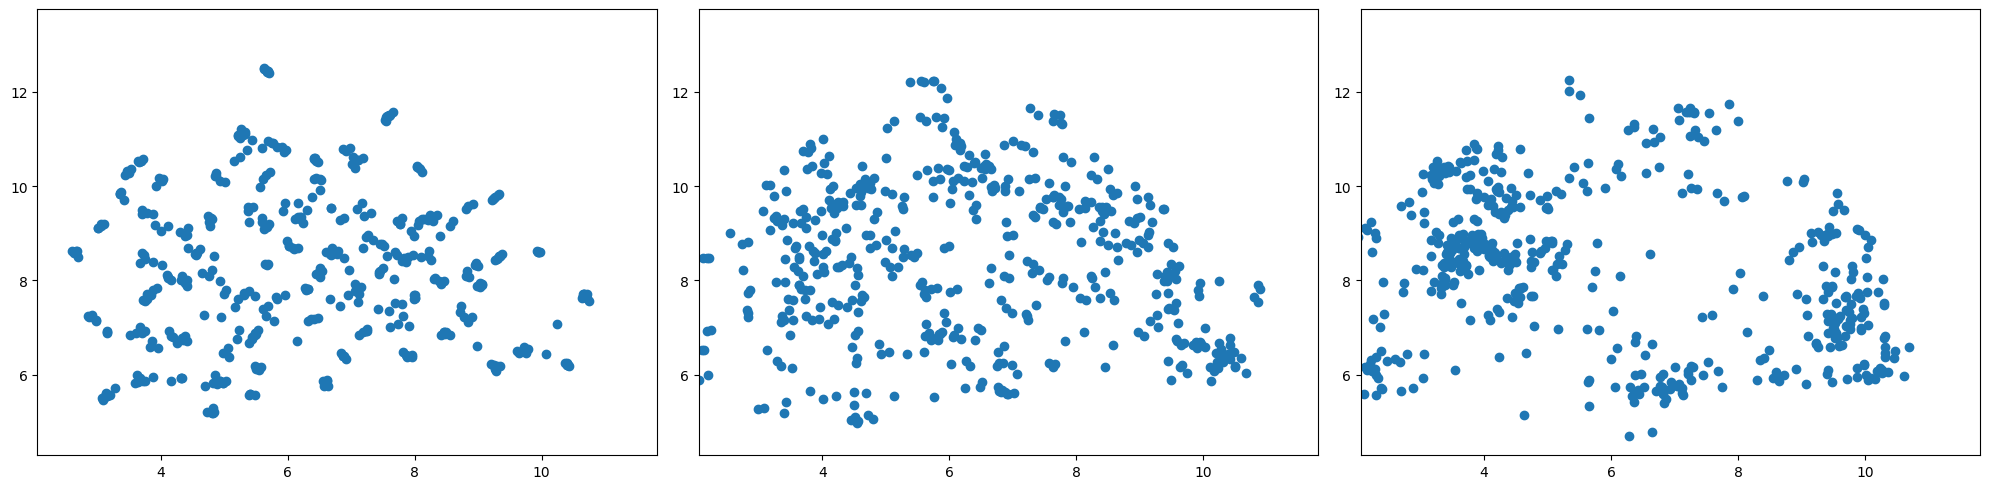

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


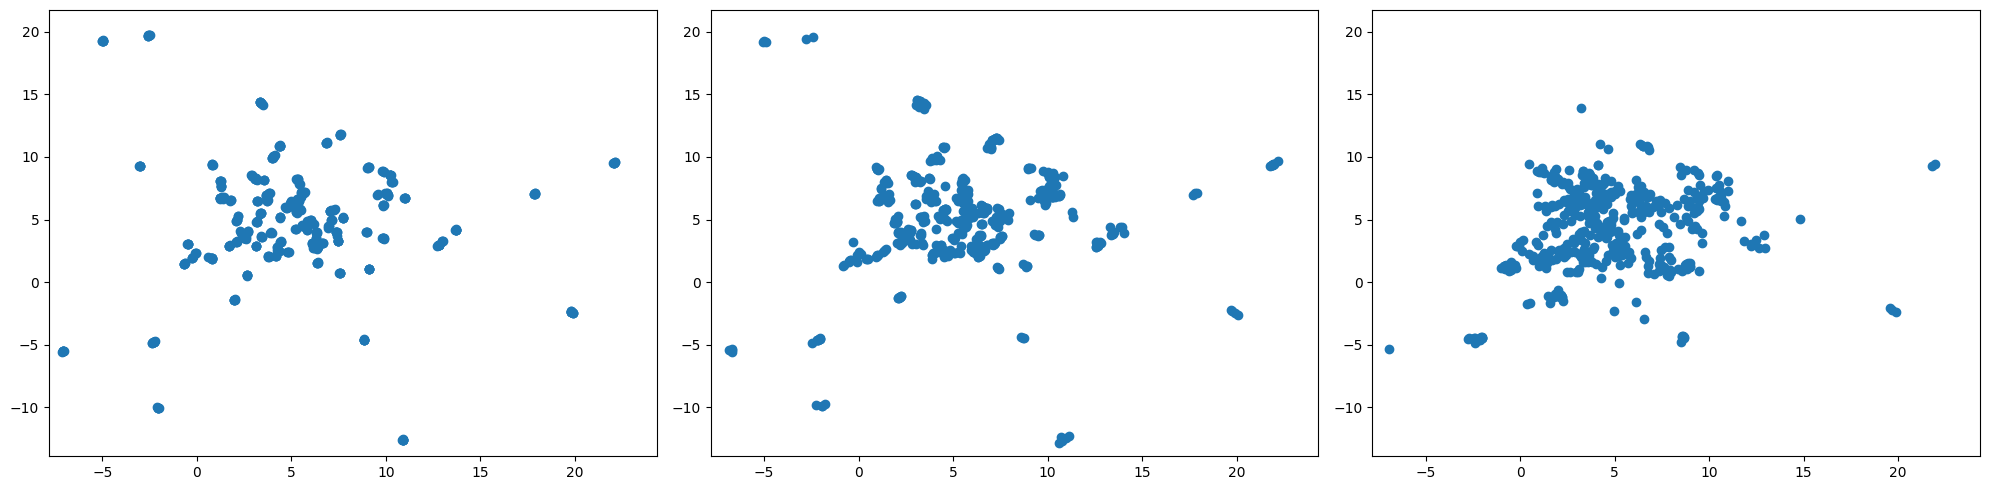

save/results_10000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


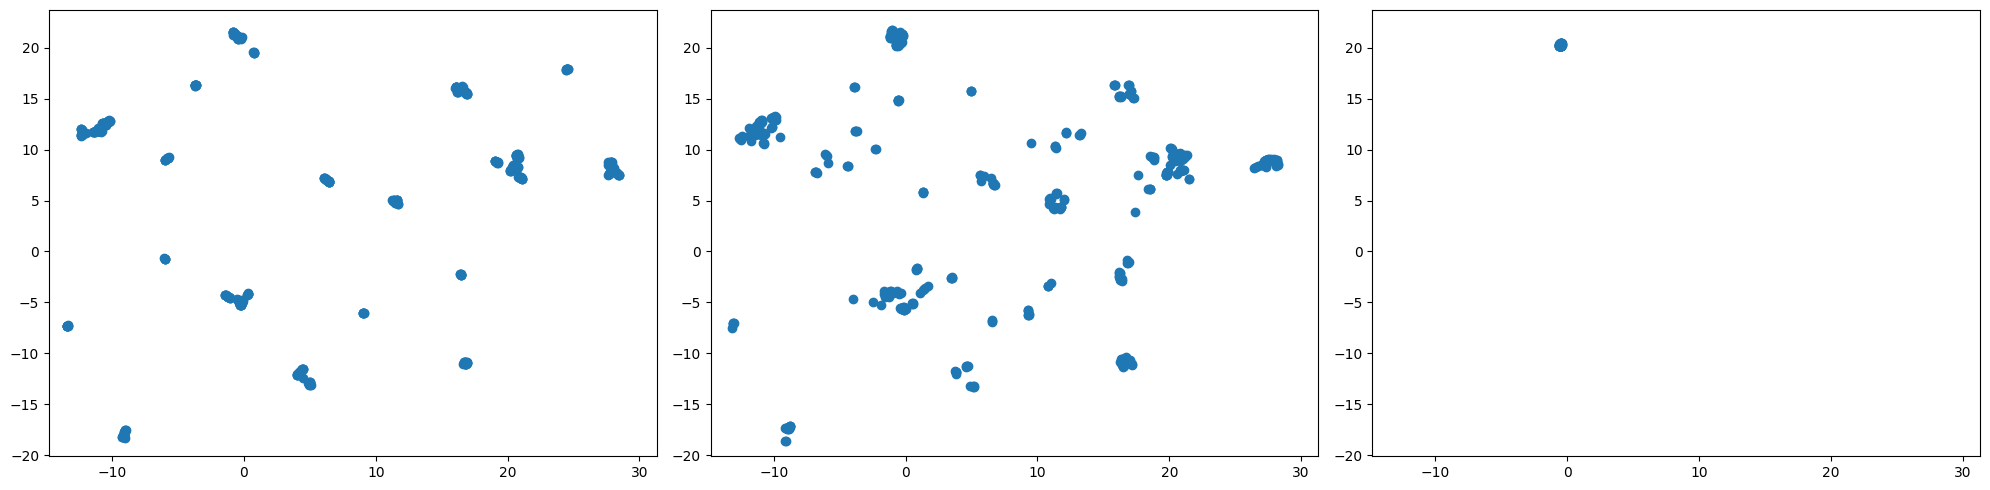

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


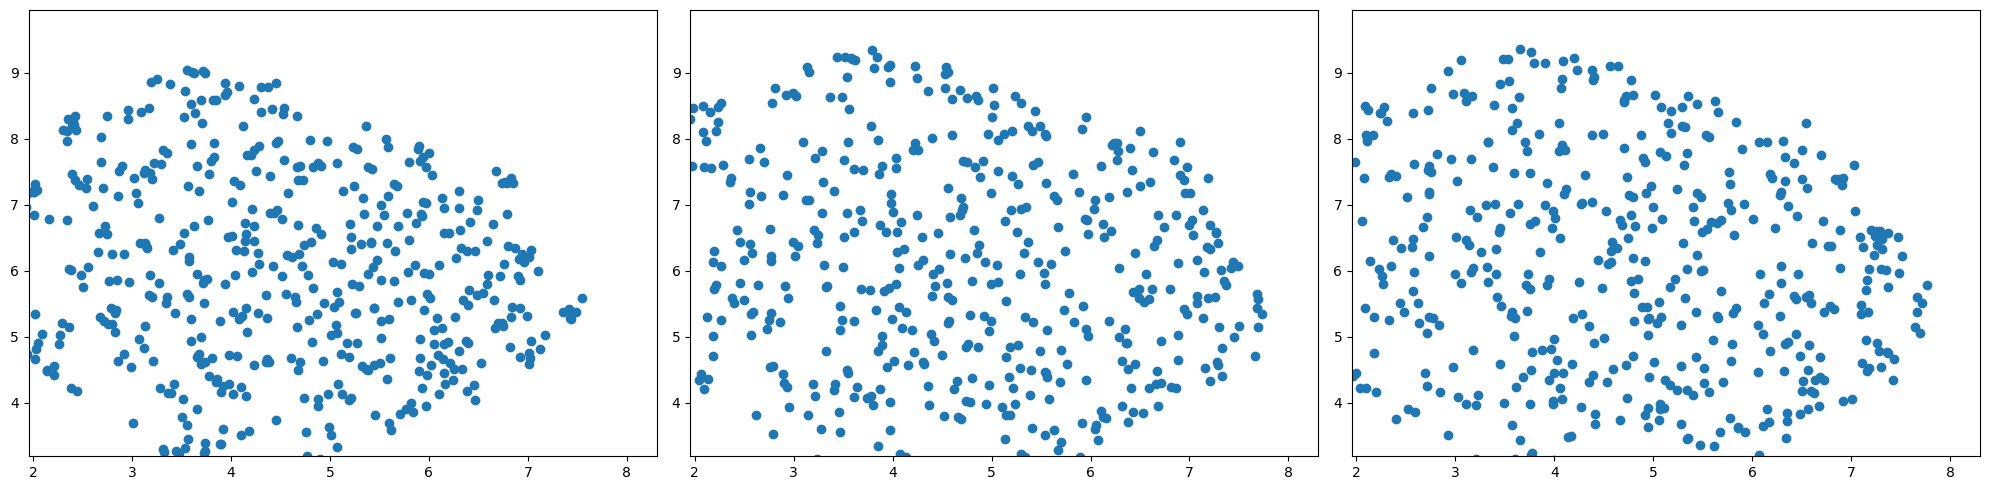

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


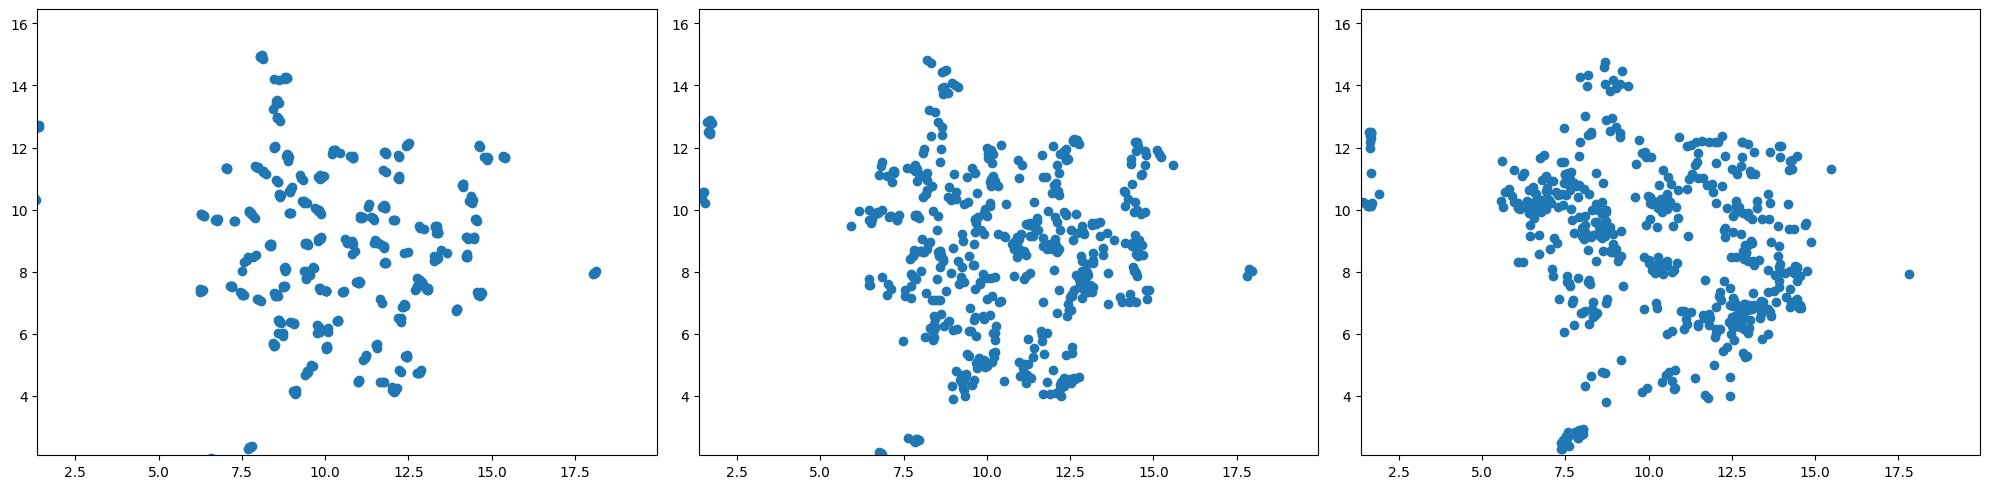

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


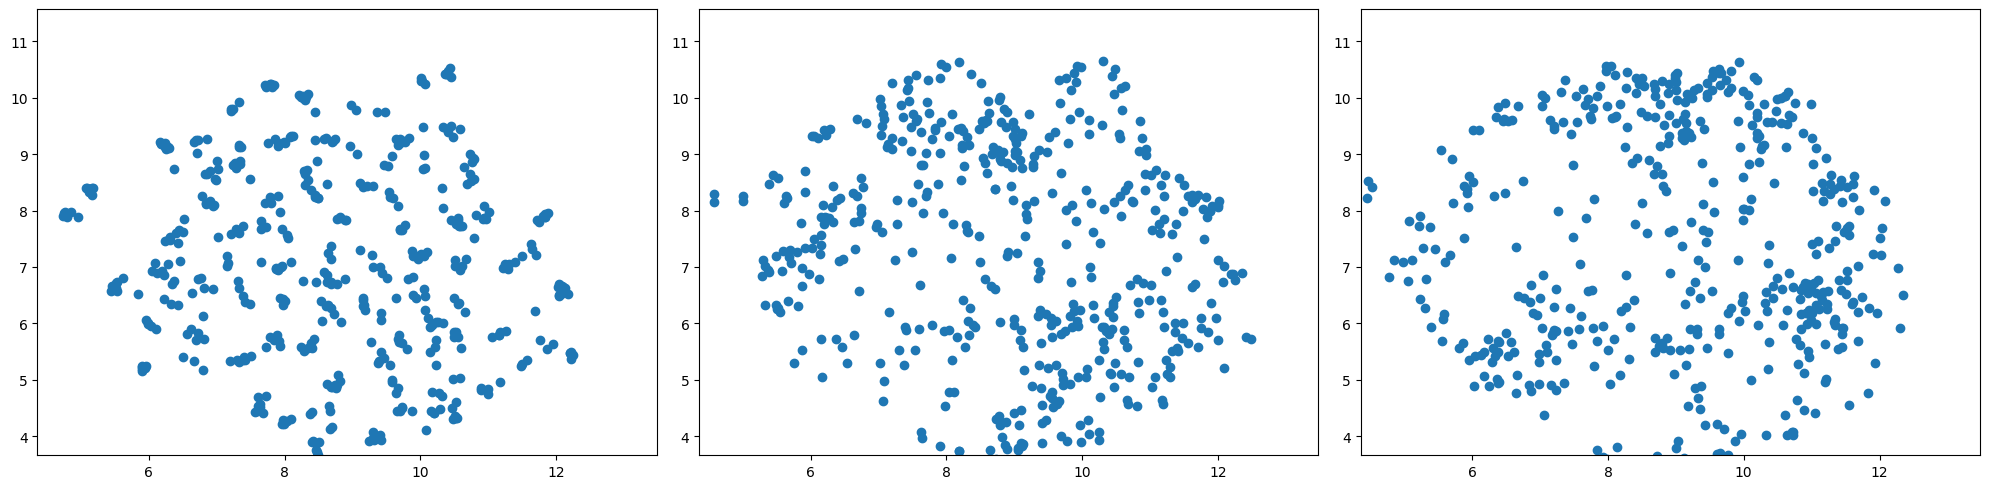

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


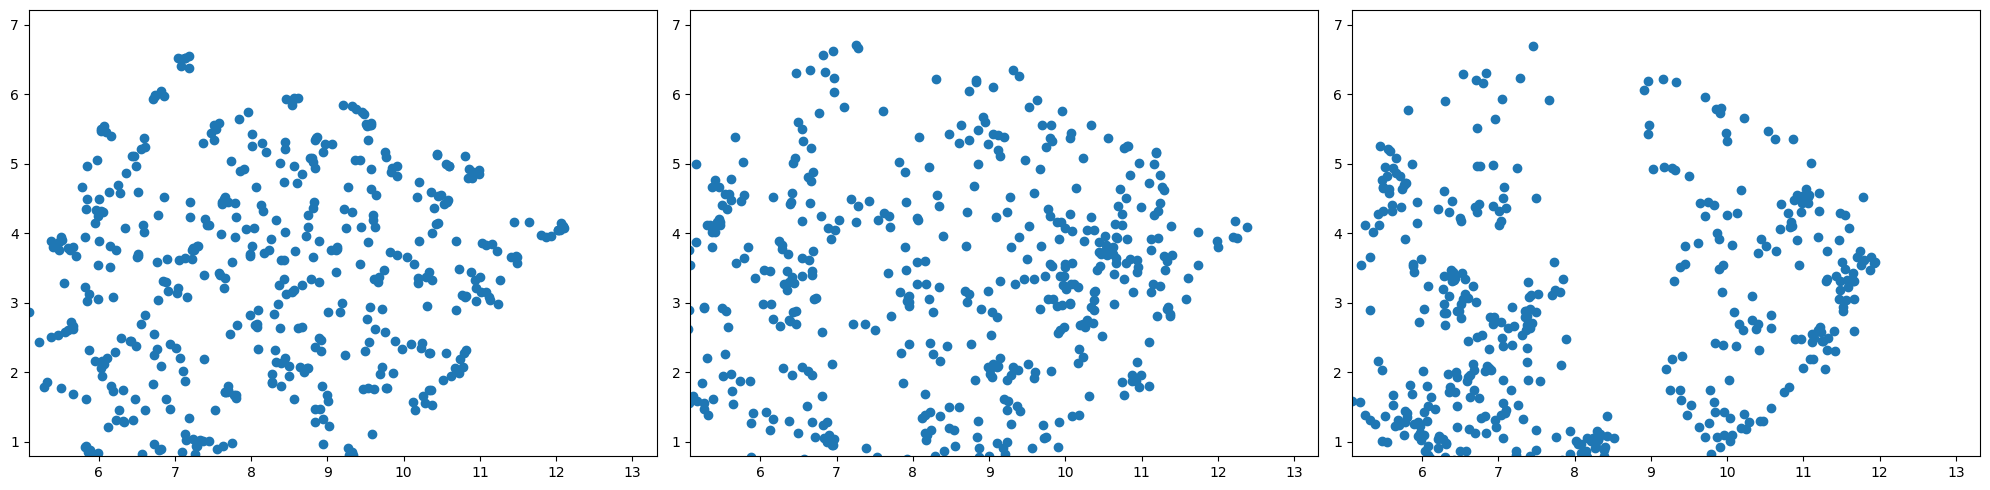

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


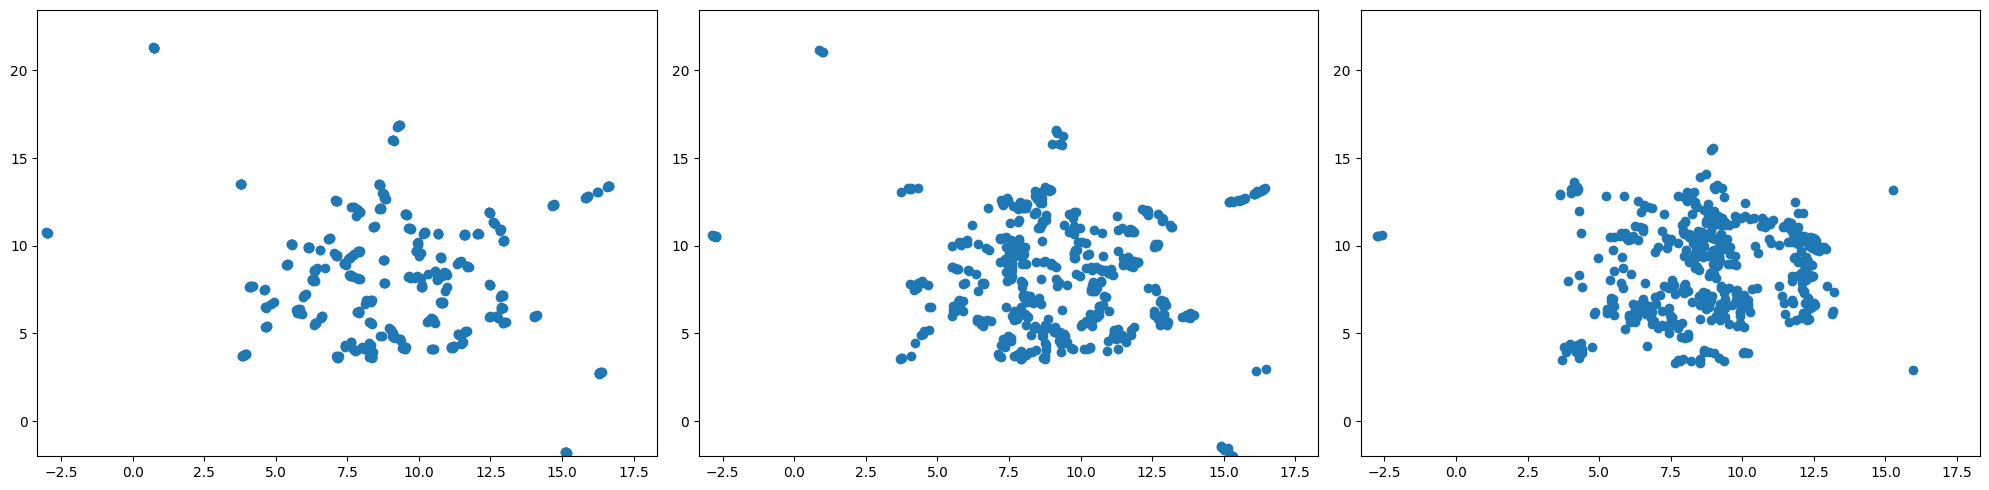

save/results_11000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


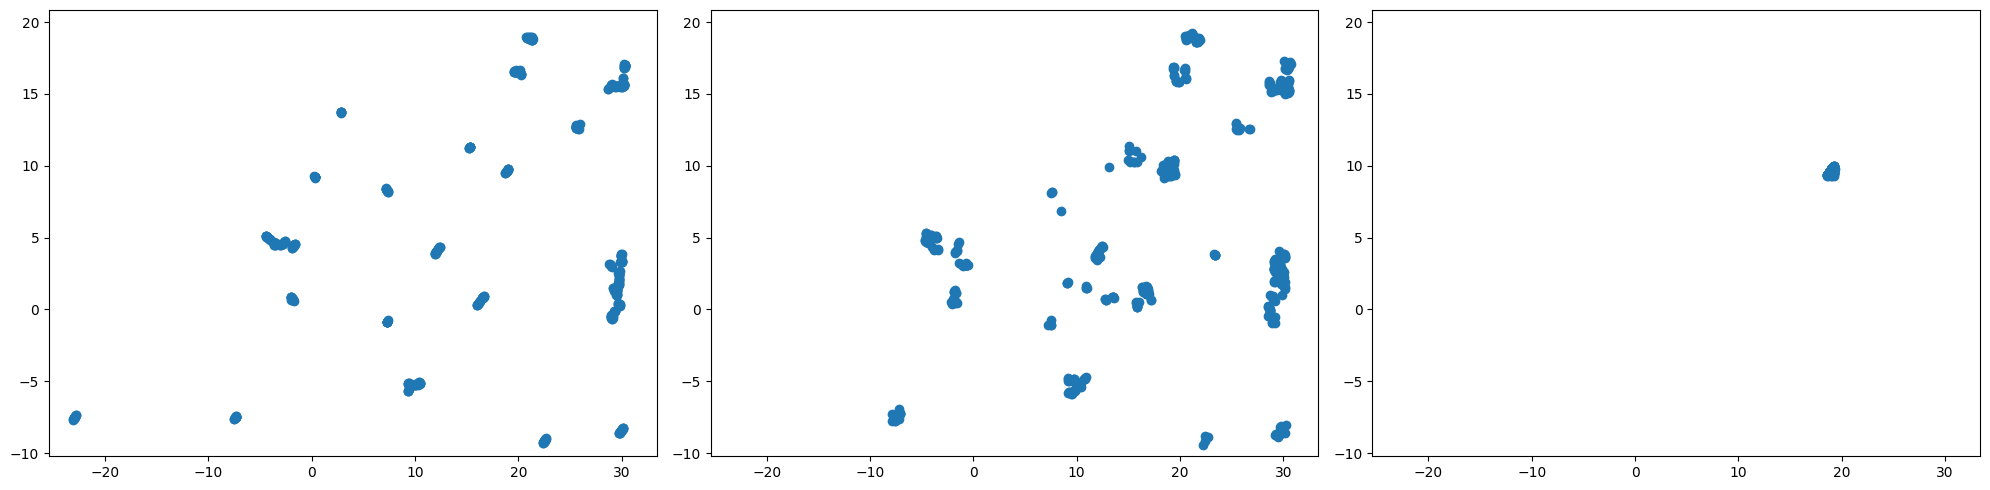

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


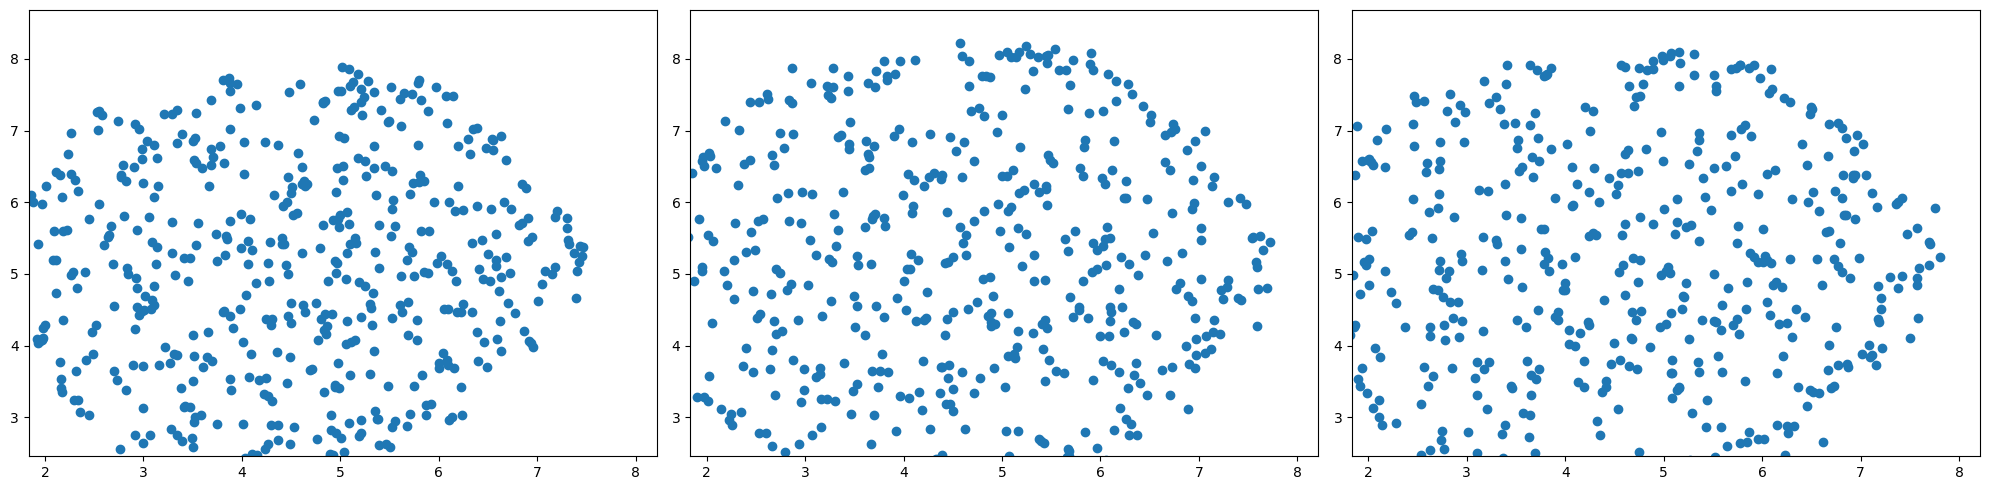

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


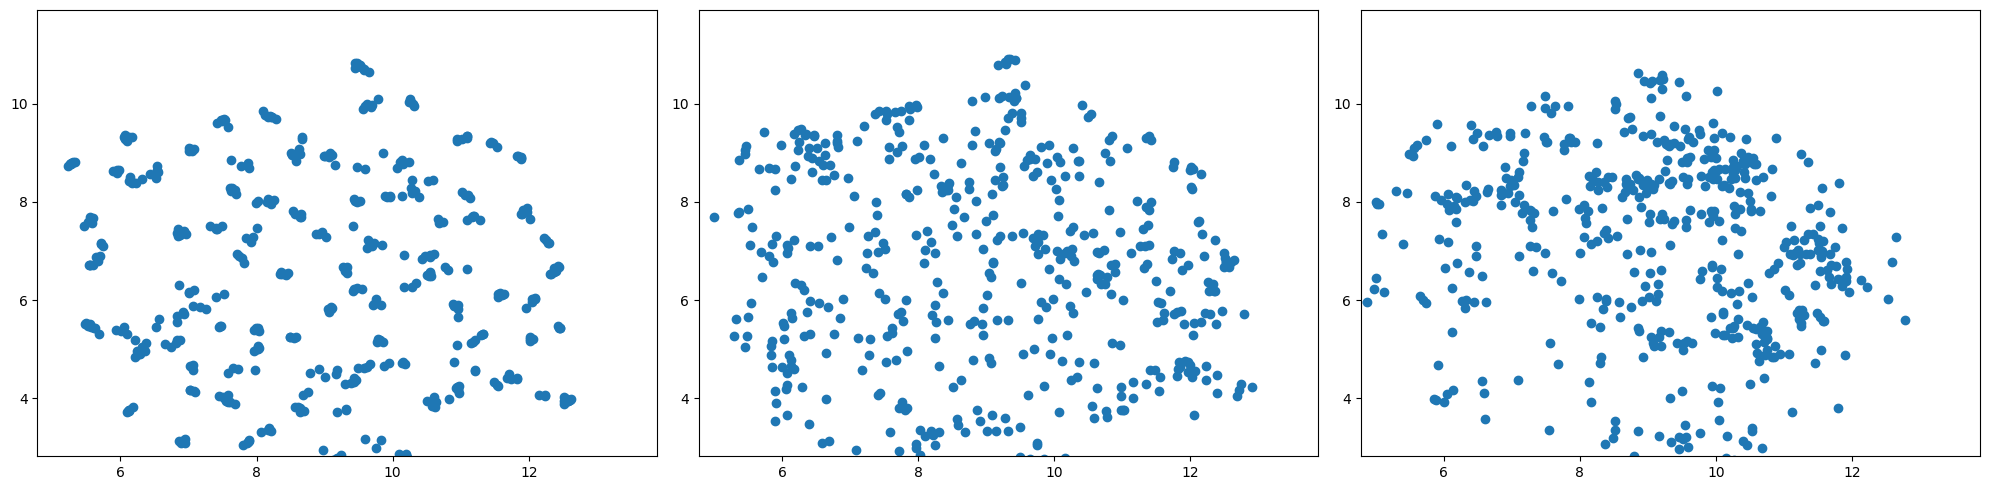

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


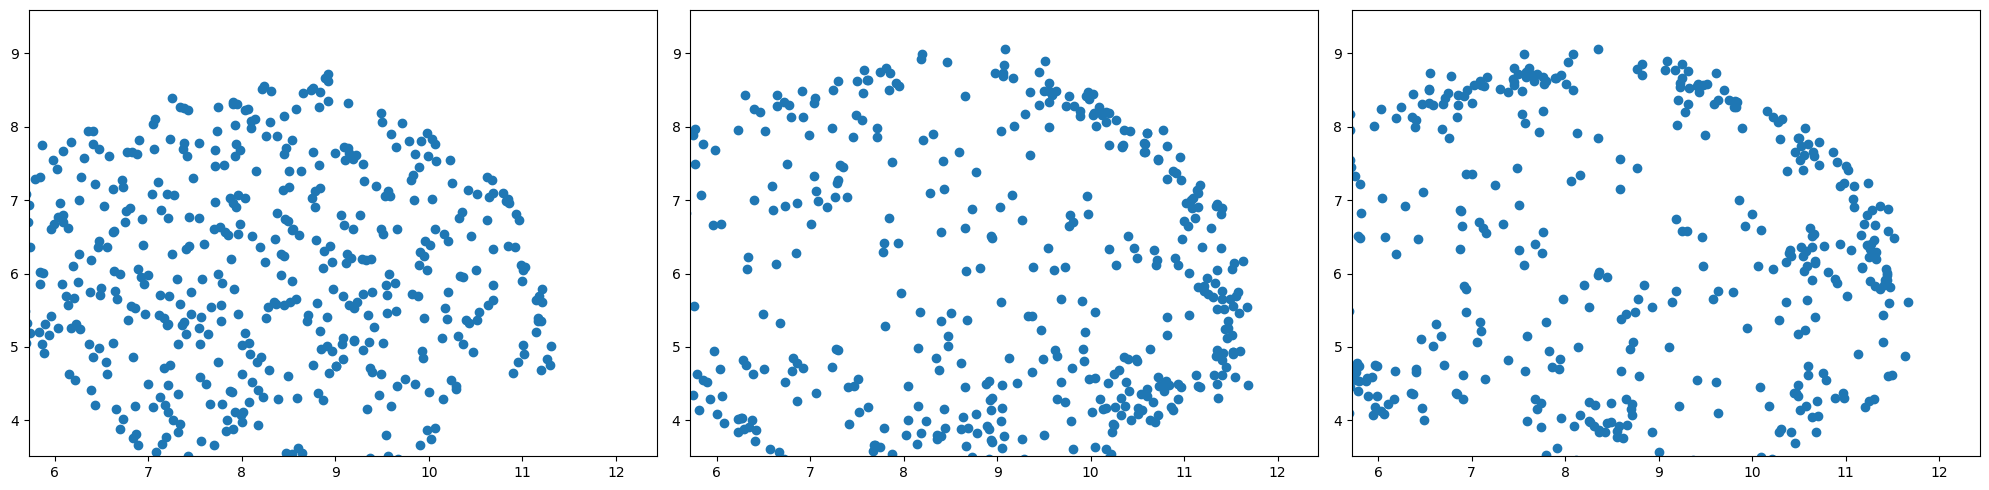

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


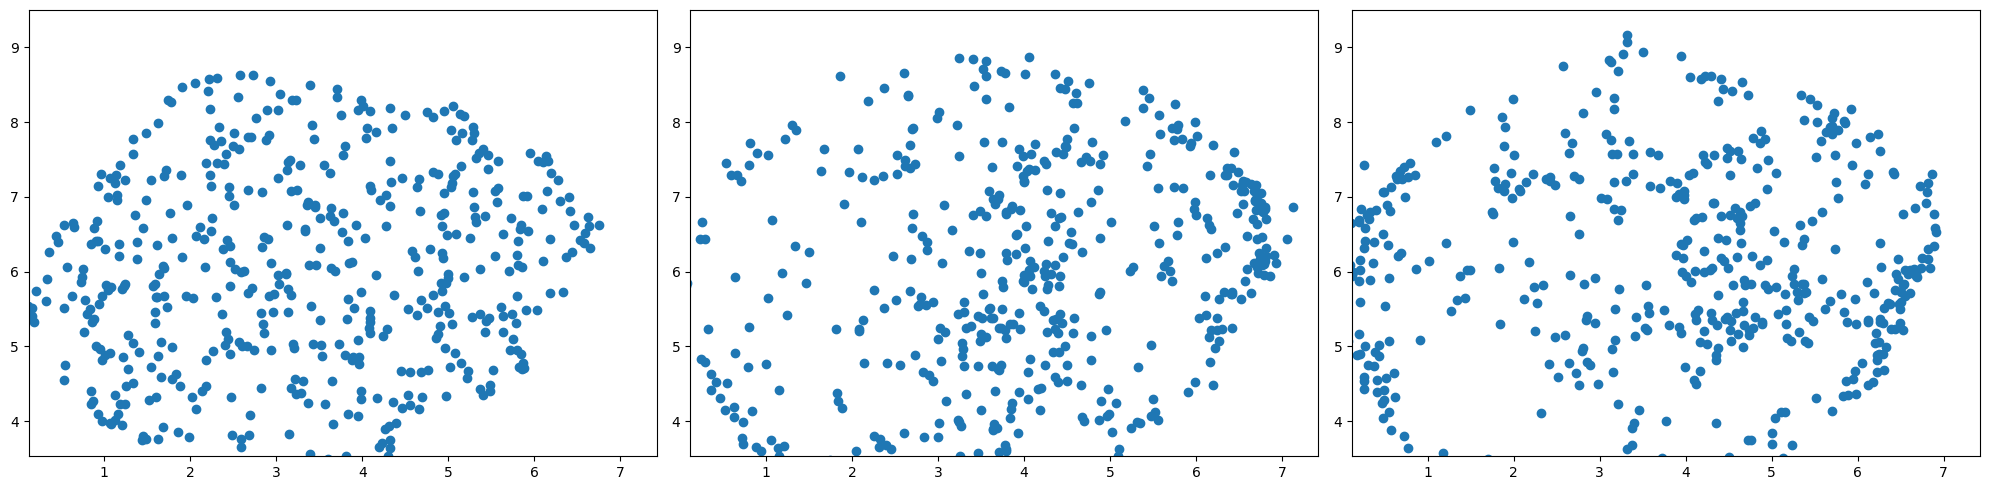

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


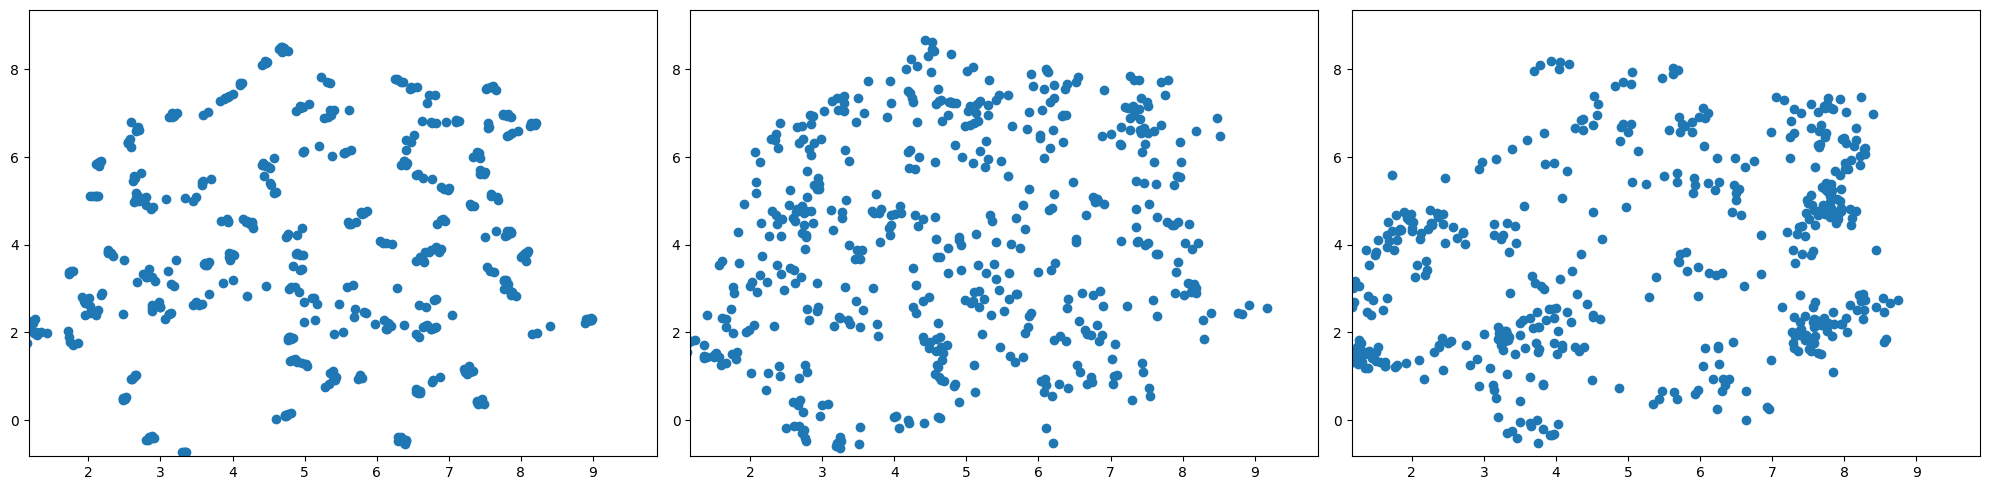

save/results_12000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


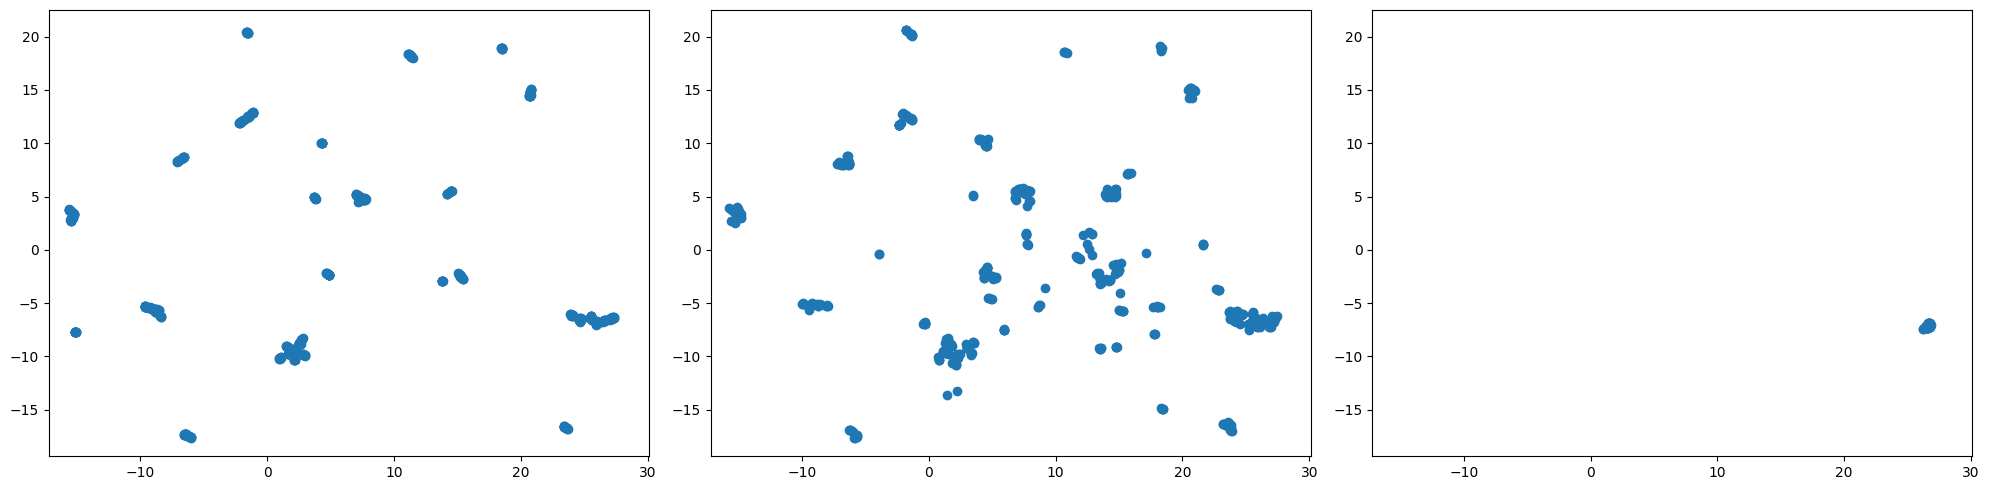

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


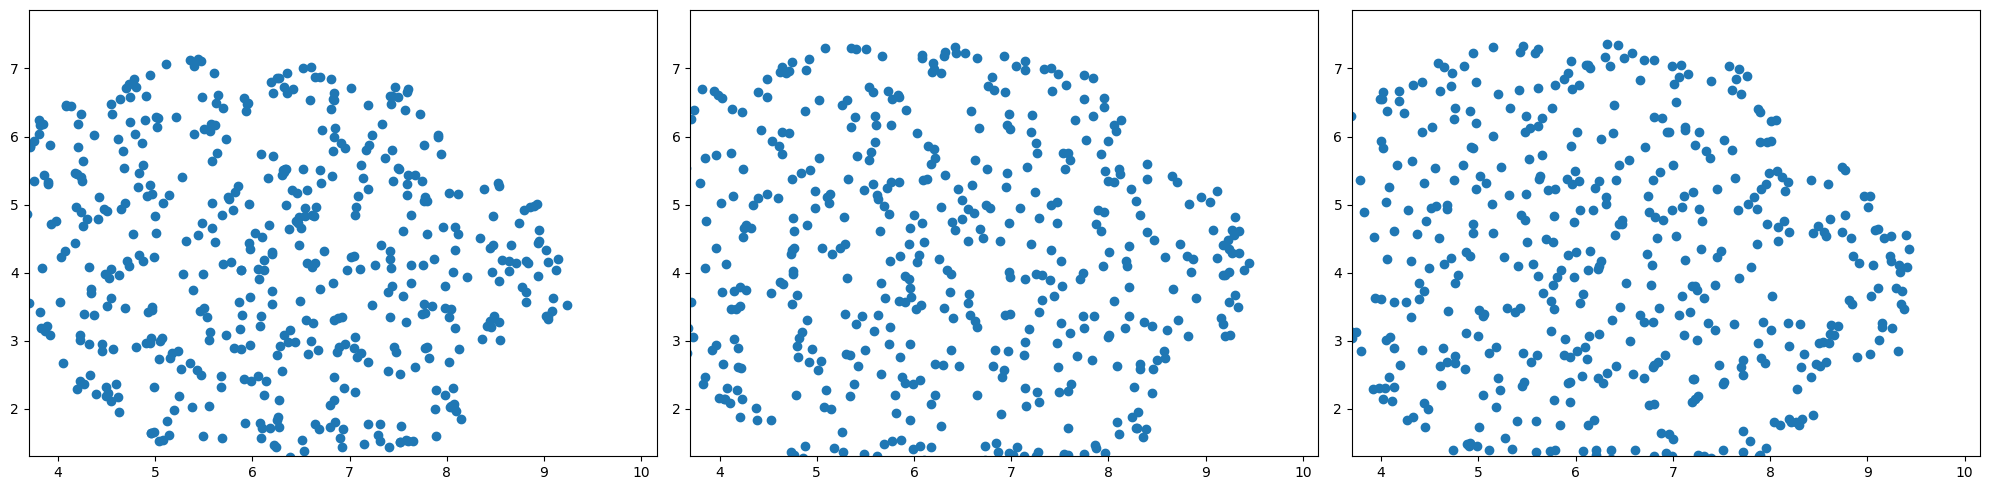

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


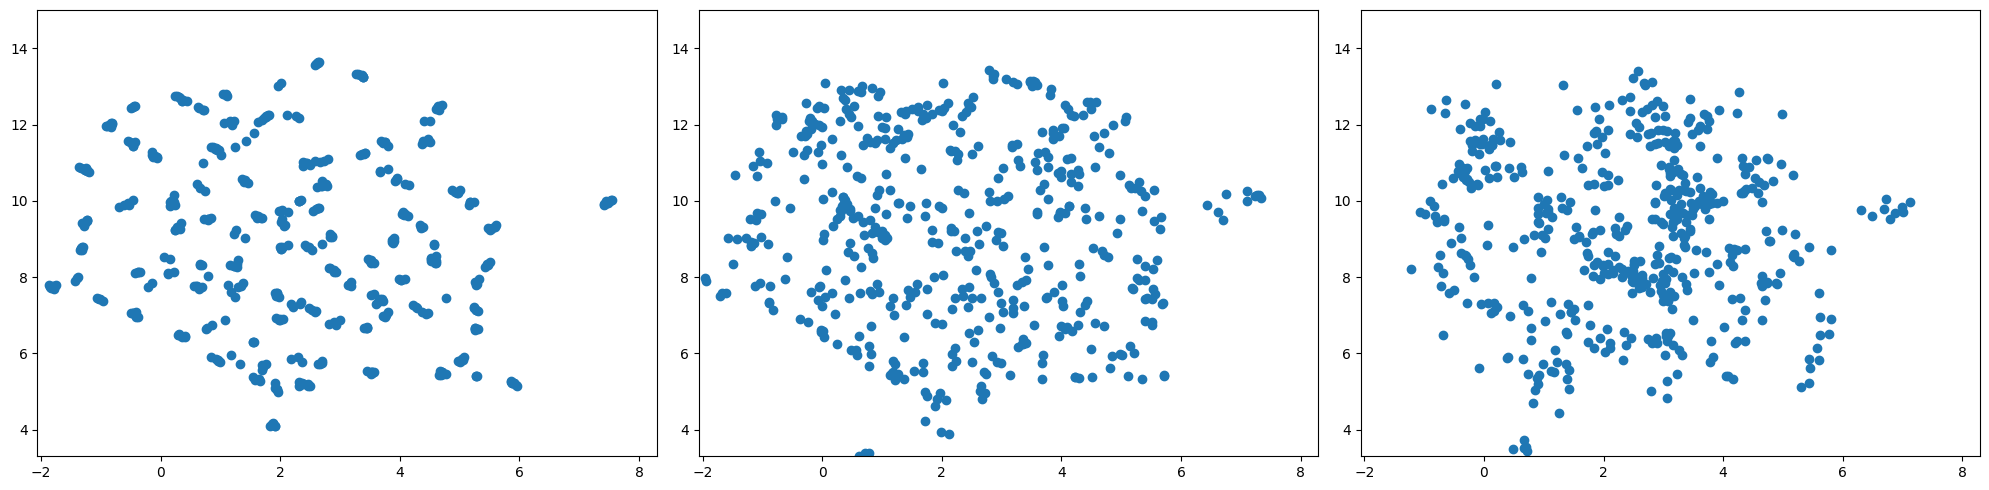

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


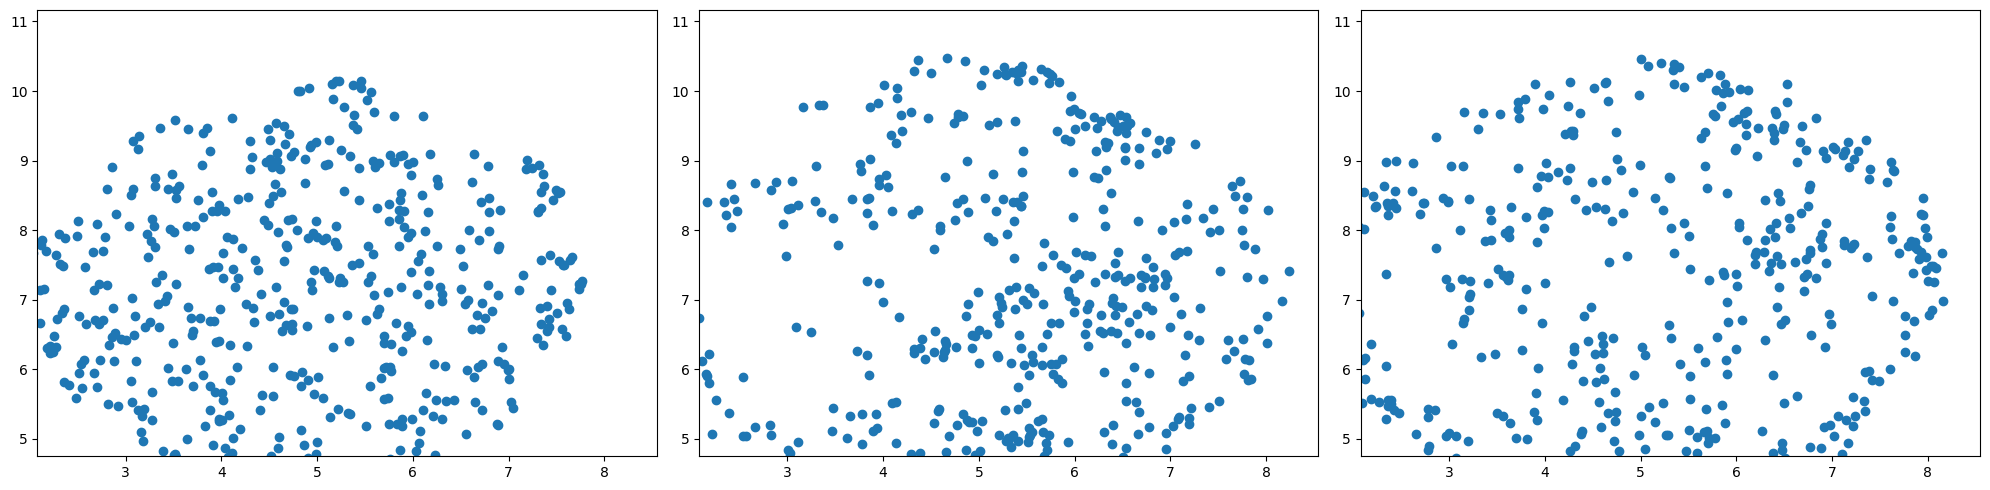

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


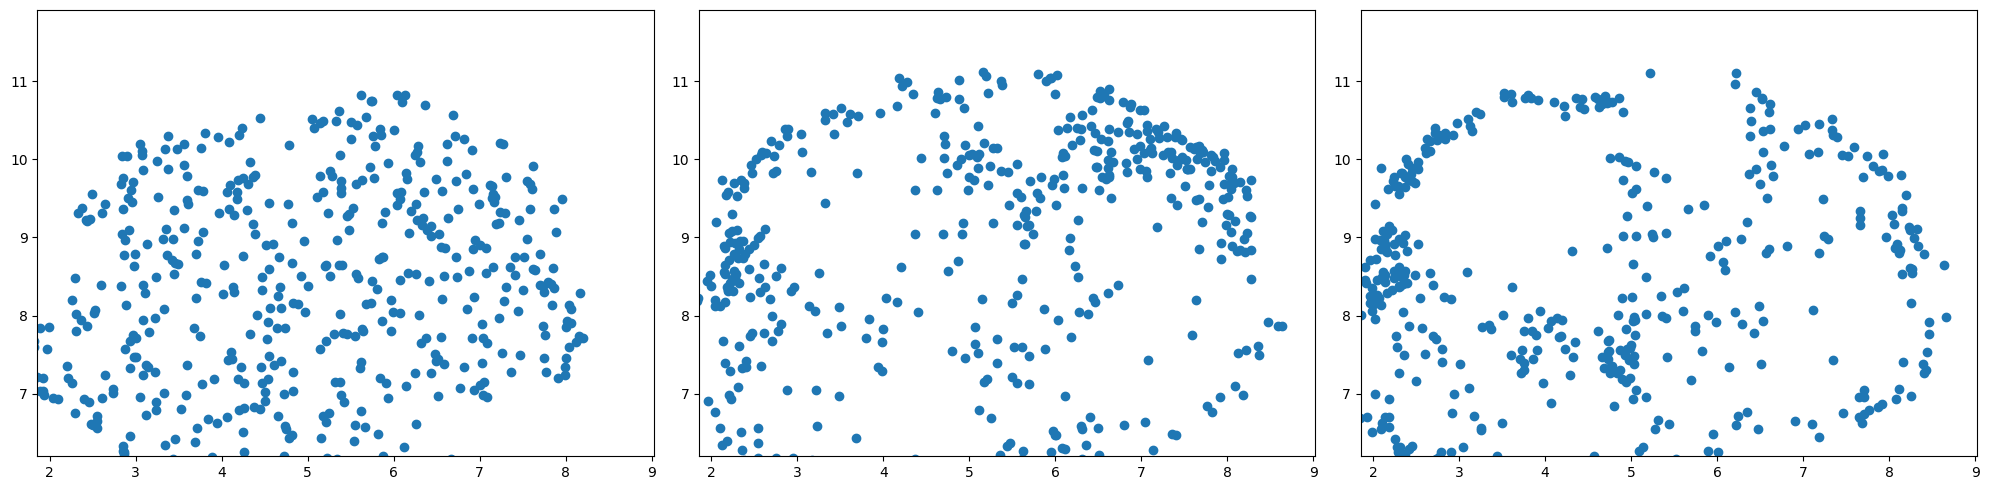

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


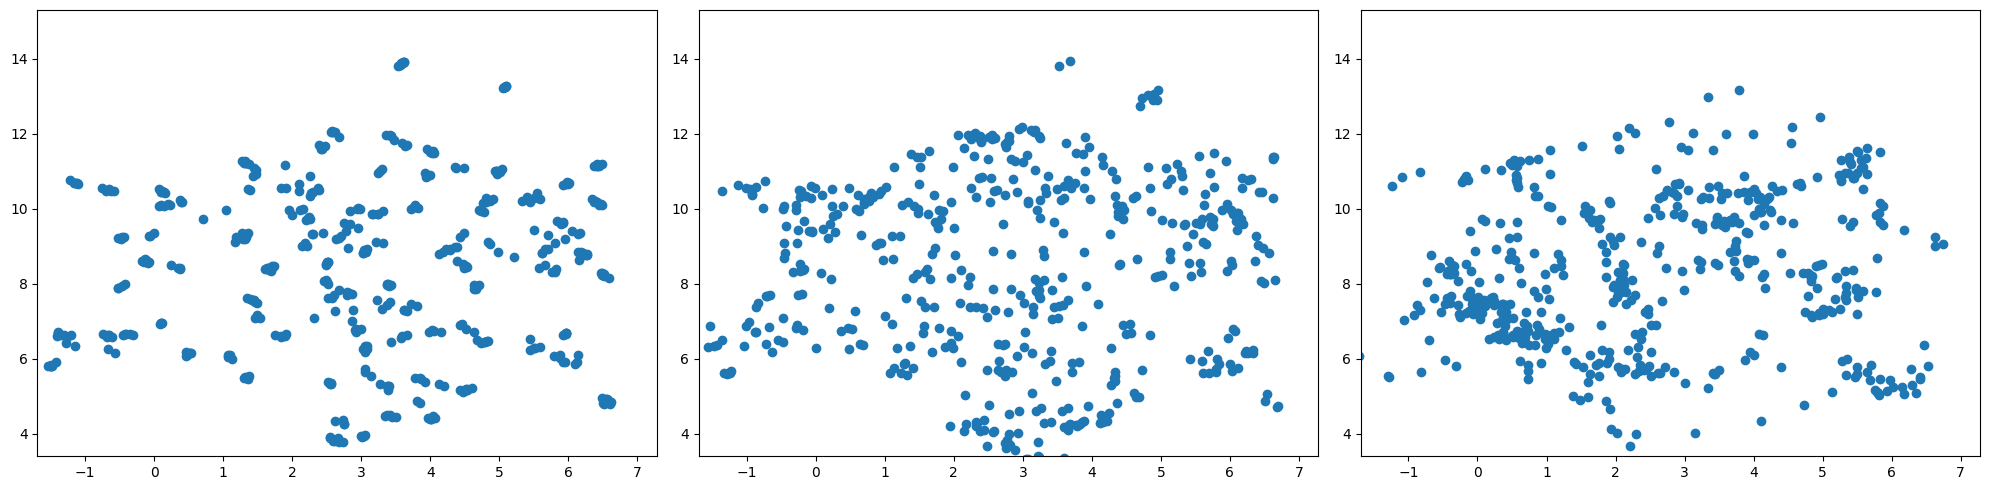

save/results_13000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


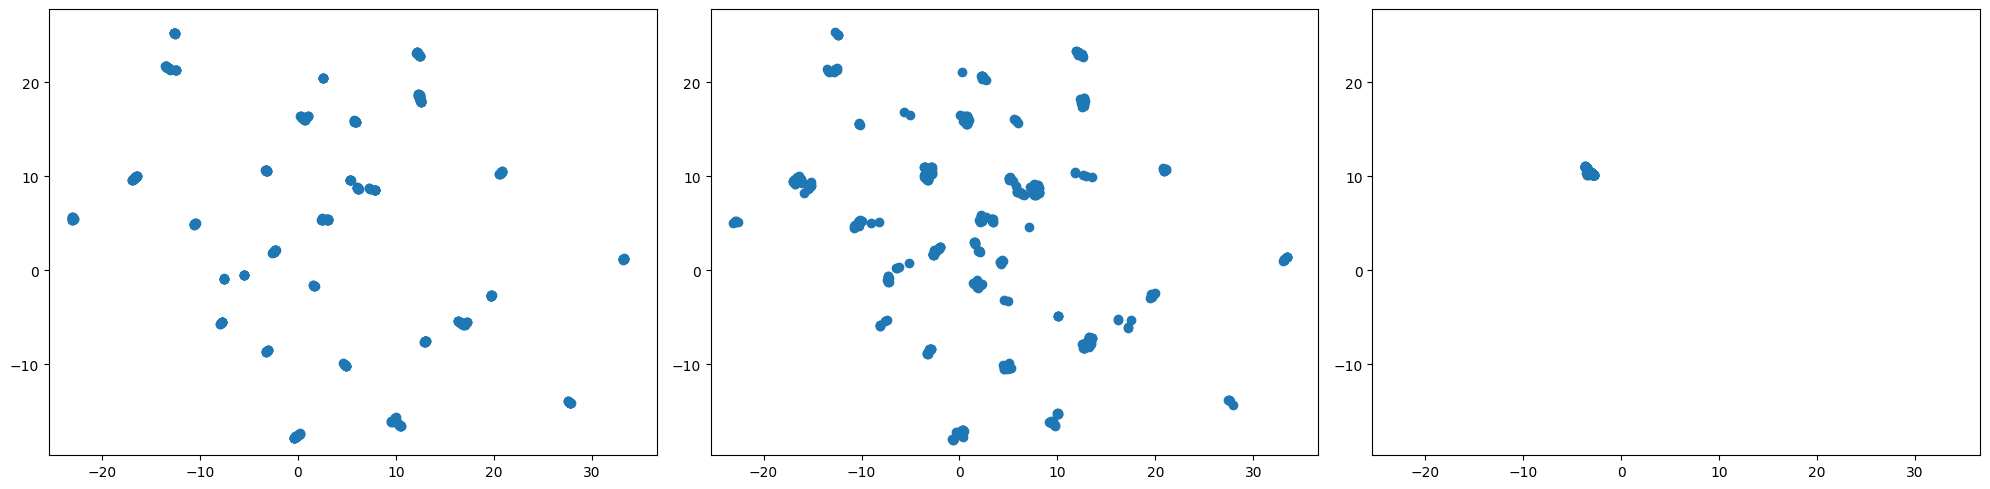

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


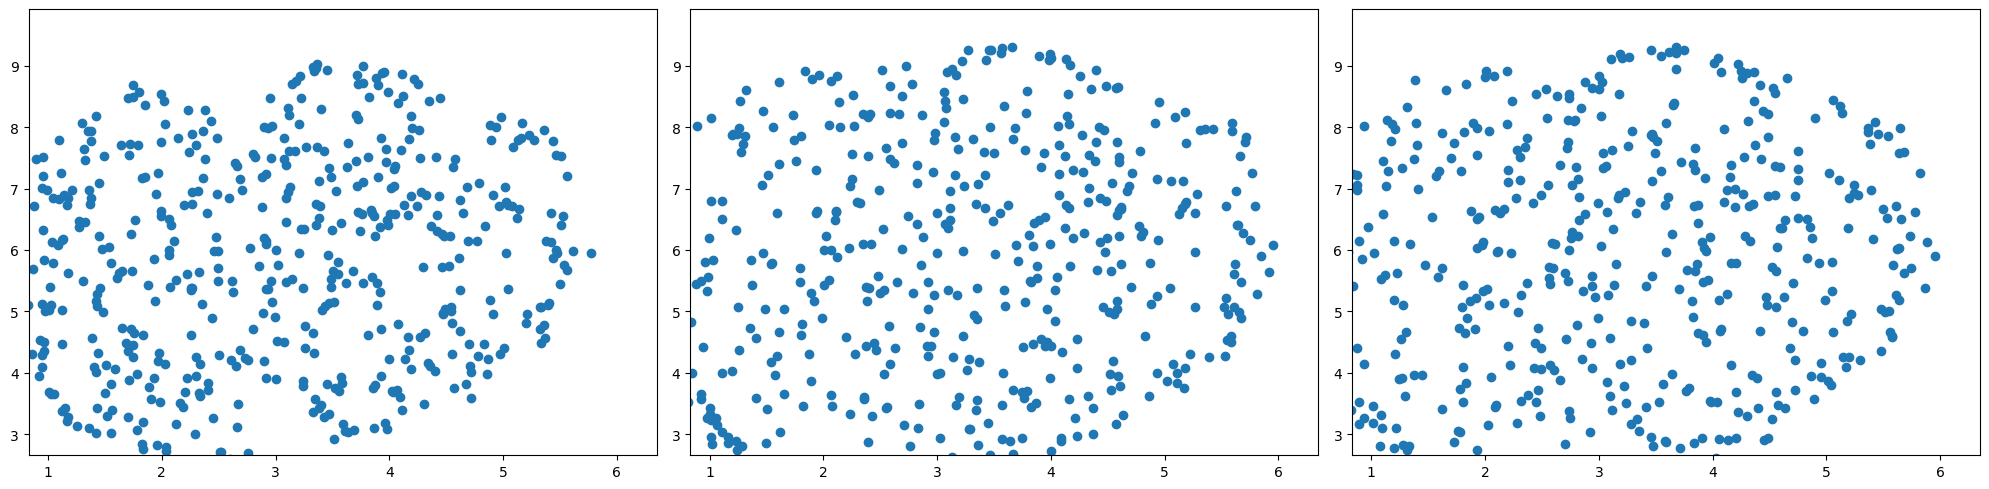

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


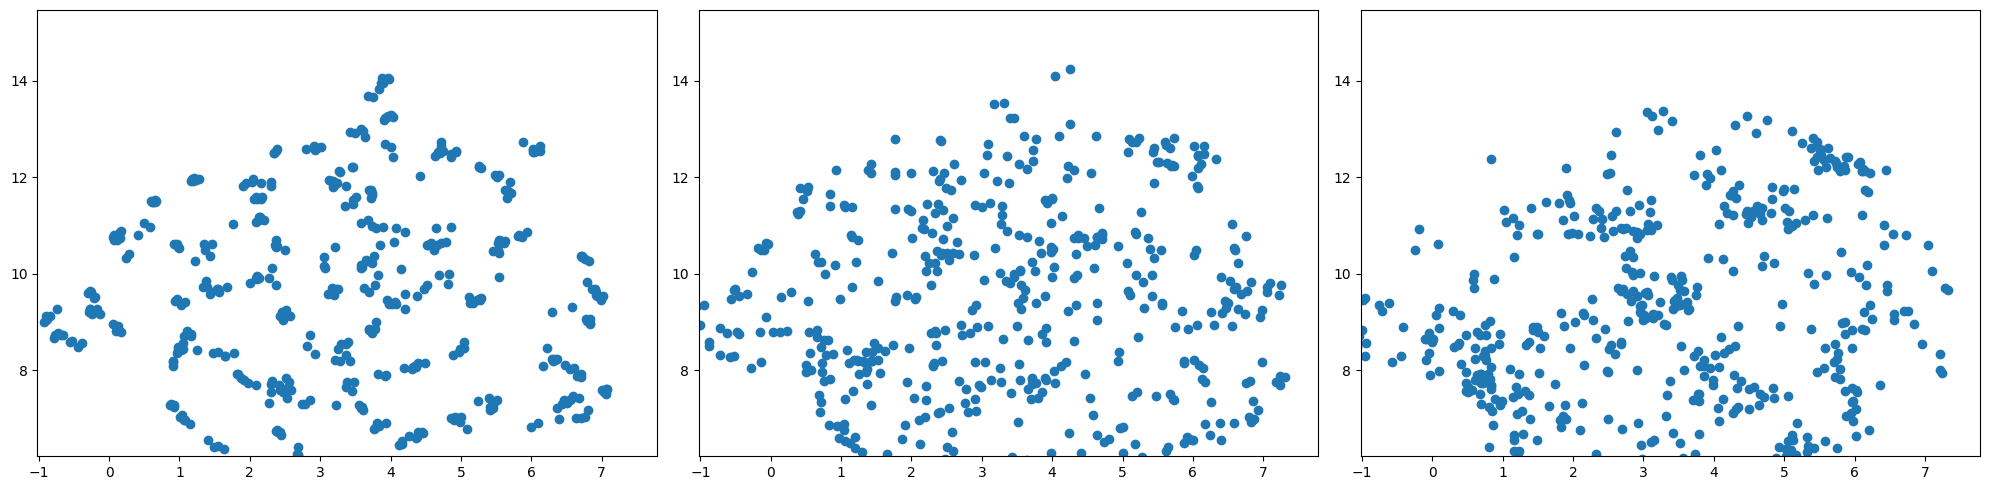

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


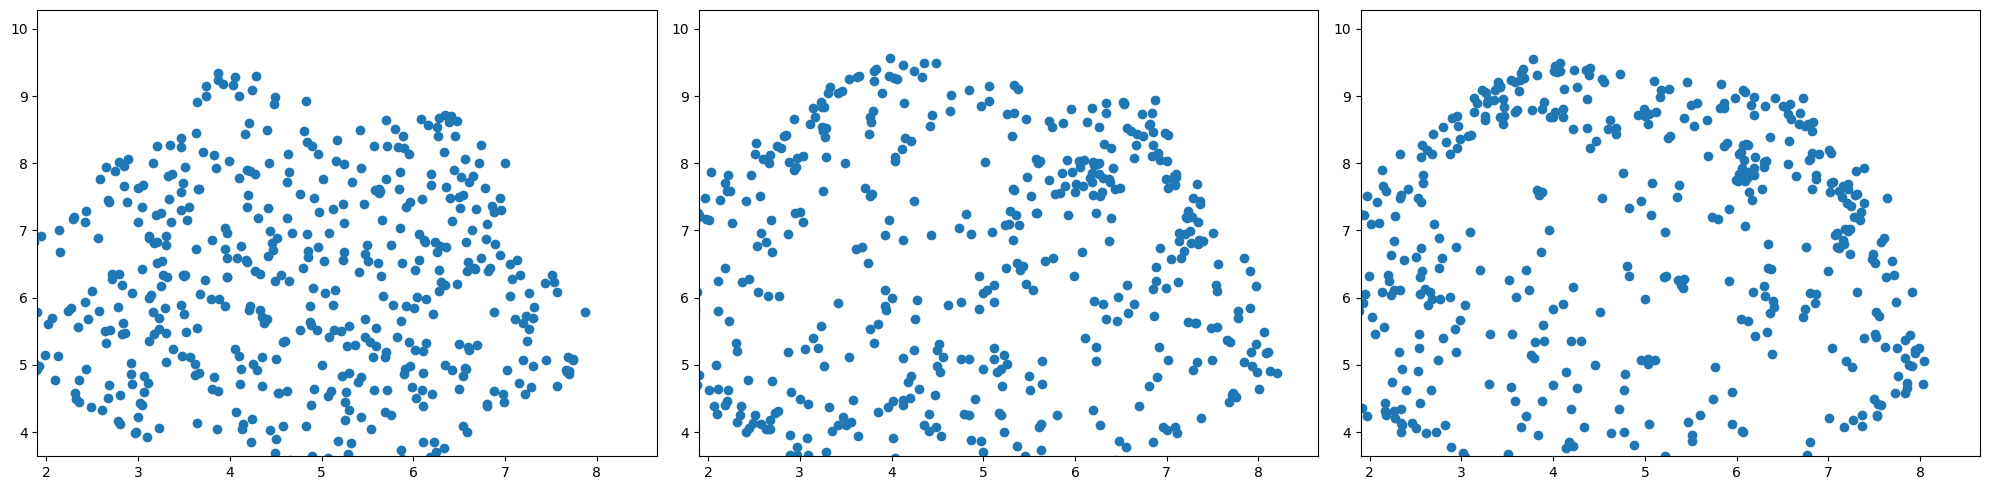

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


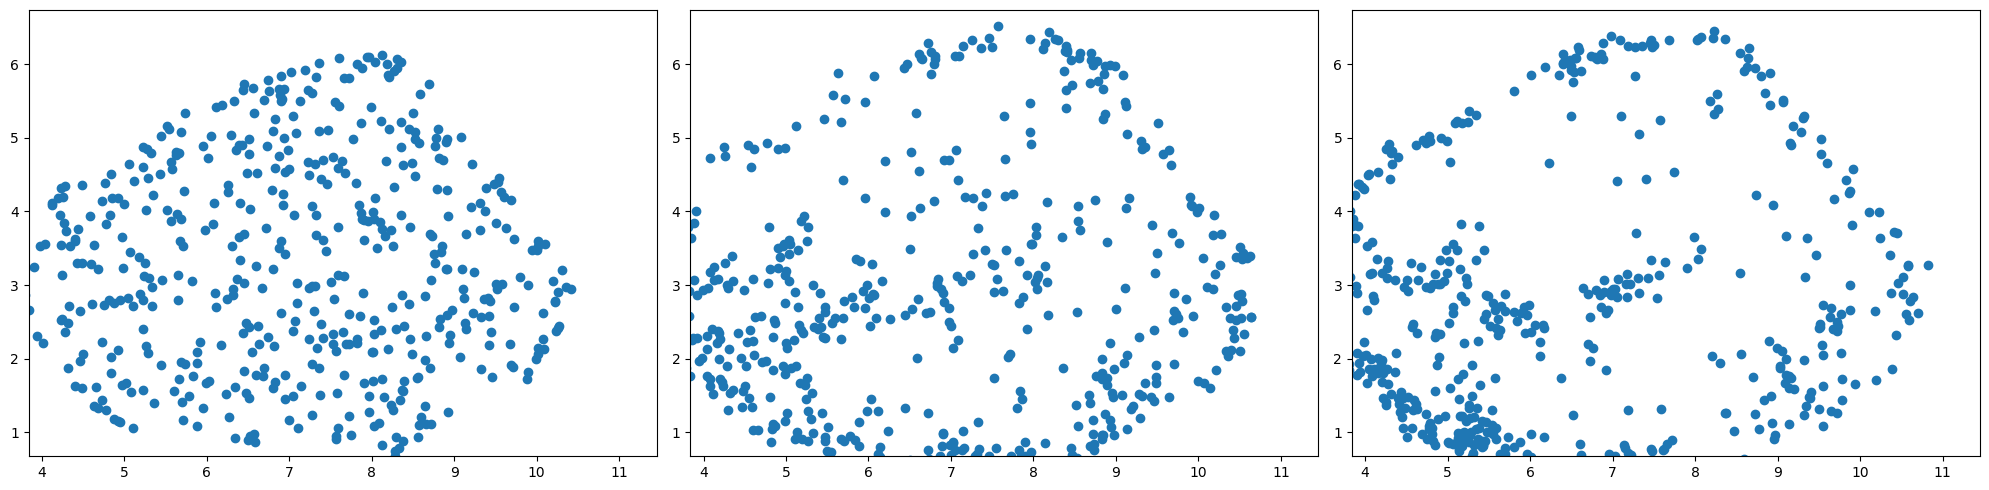

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


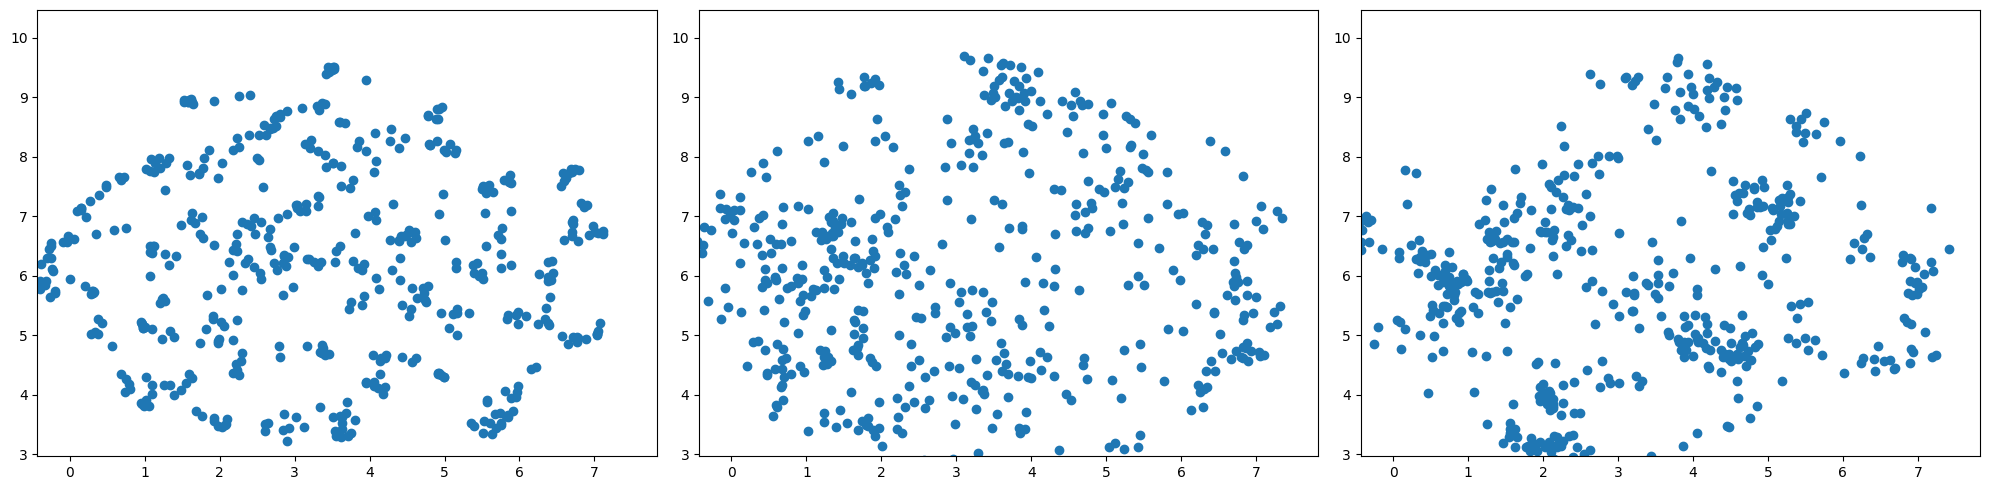

In [101]:
targets = [
           'save/results_0.pth',
           'save/results_1000.pth',
           'save/results_2000.pth',
           'save/results_8000.pth',
           'save/results_9000.pth',
           'save/results_10000.pth',
           'save/results_11000.pth',
           'save/results_12000.pth',
           'save/results_13000.pth']
for model_path in targets:
    results = gen_test_result(model_path, sample)
    print(model_path)
    show_results(results)

save/results_3000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


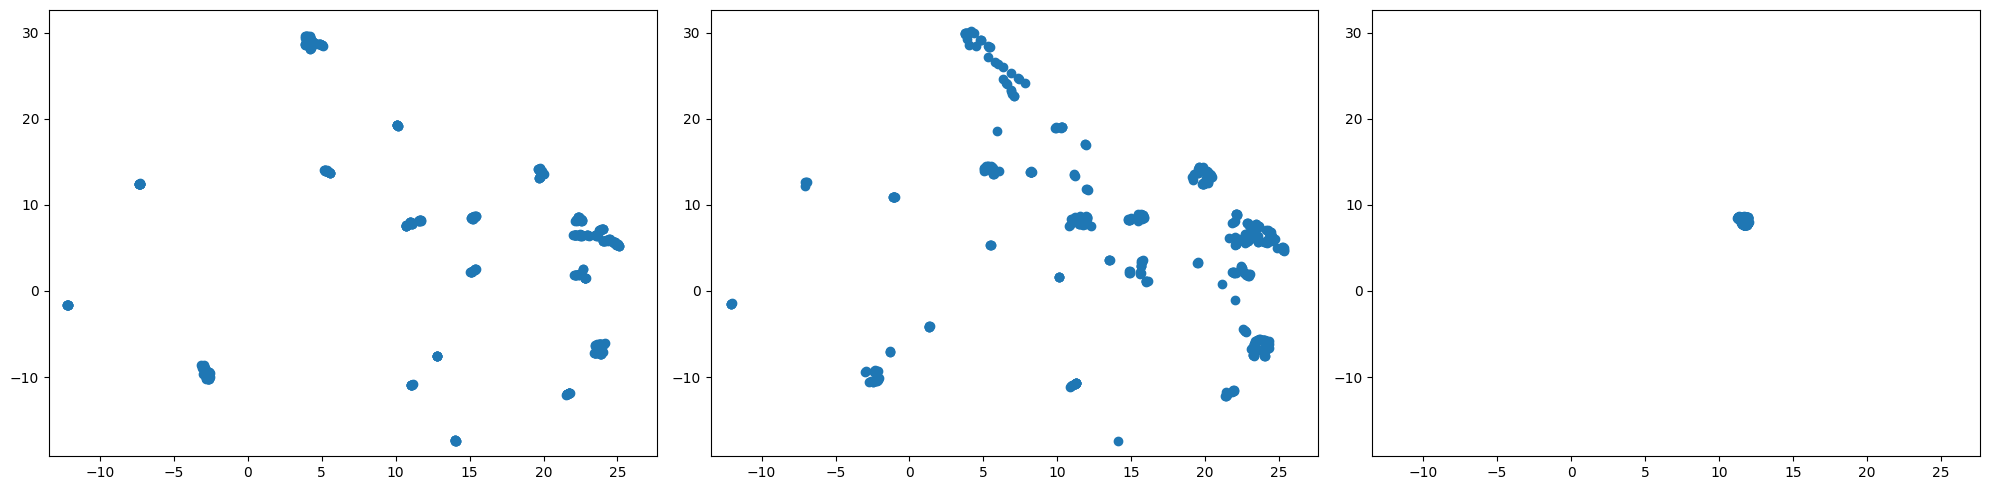

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


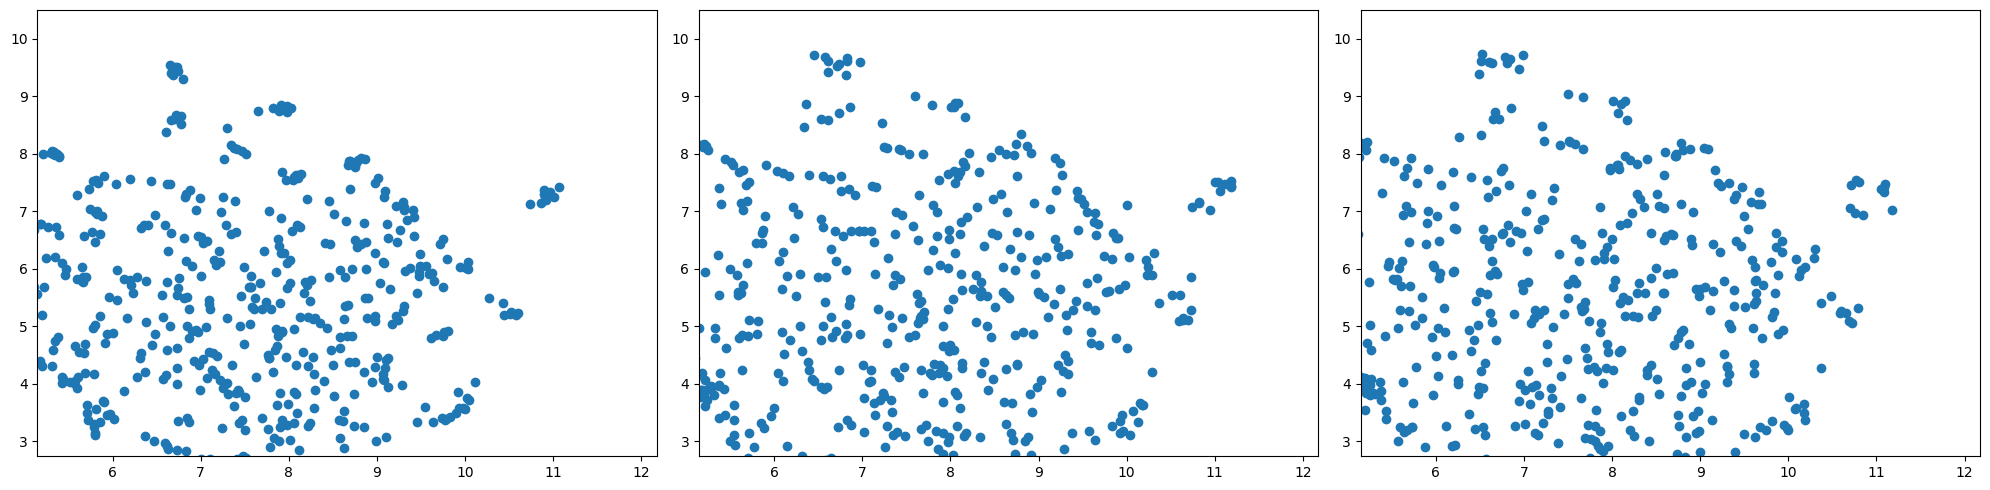

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


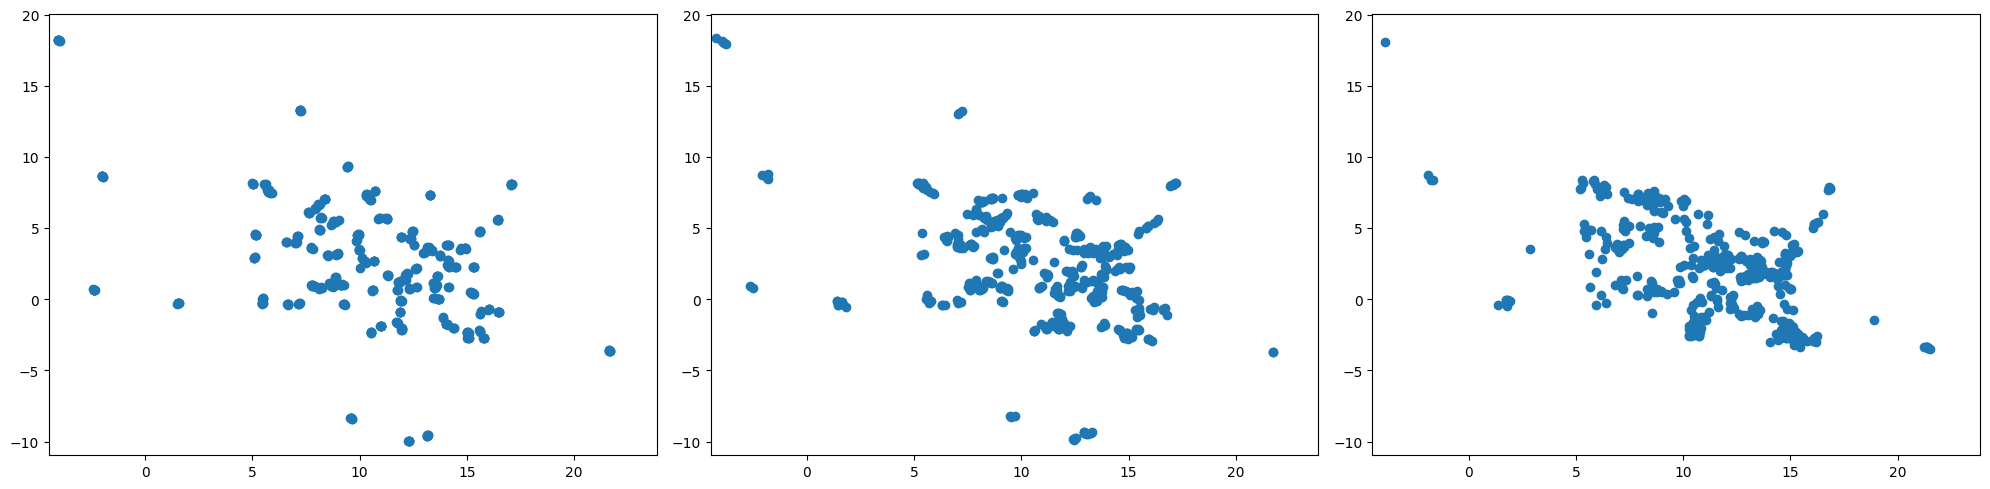

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


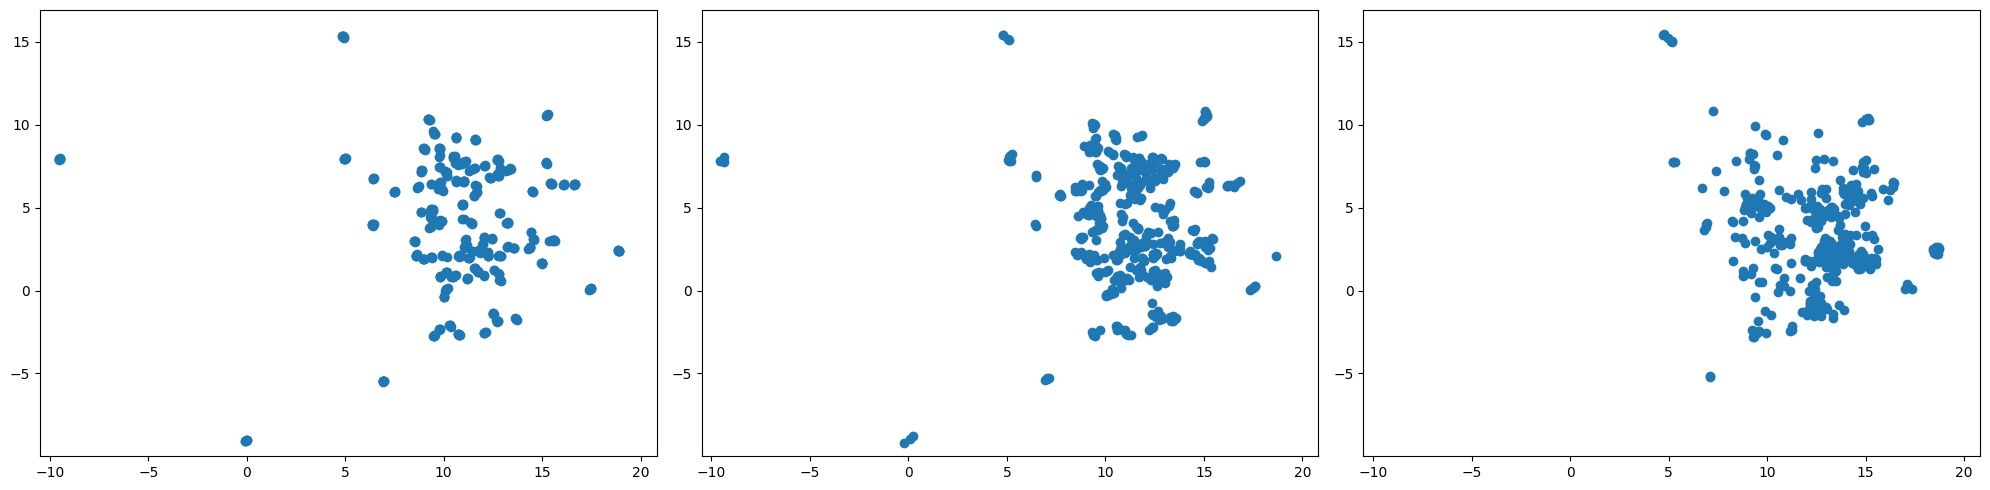

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


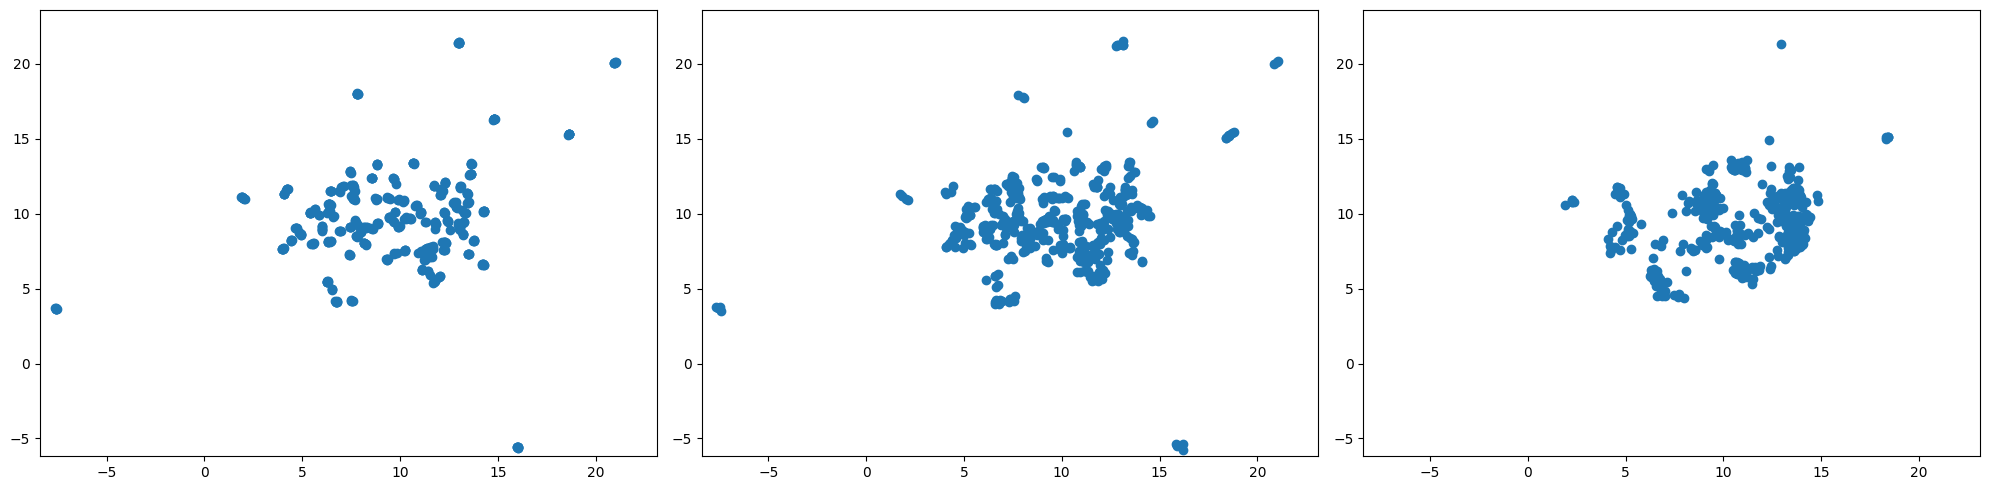

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


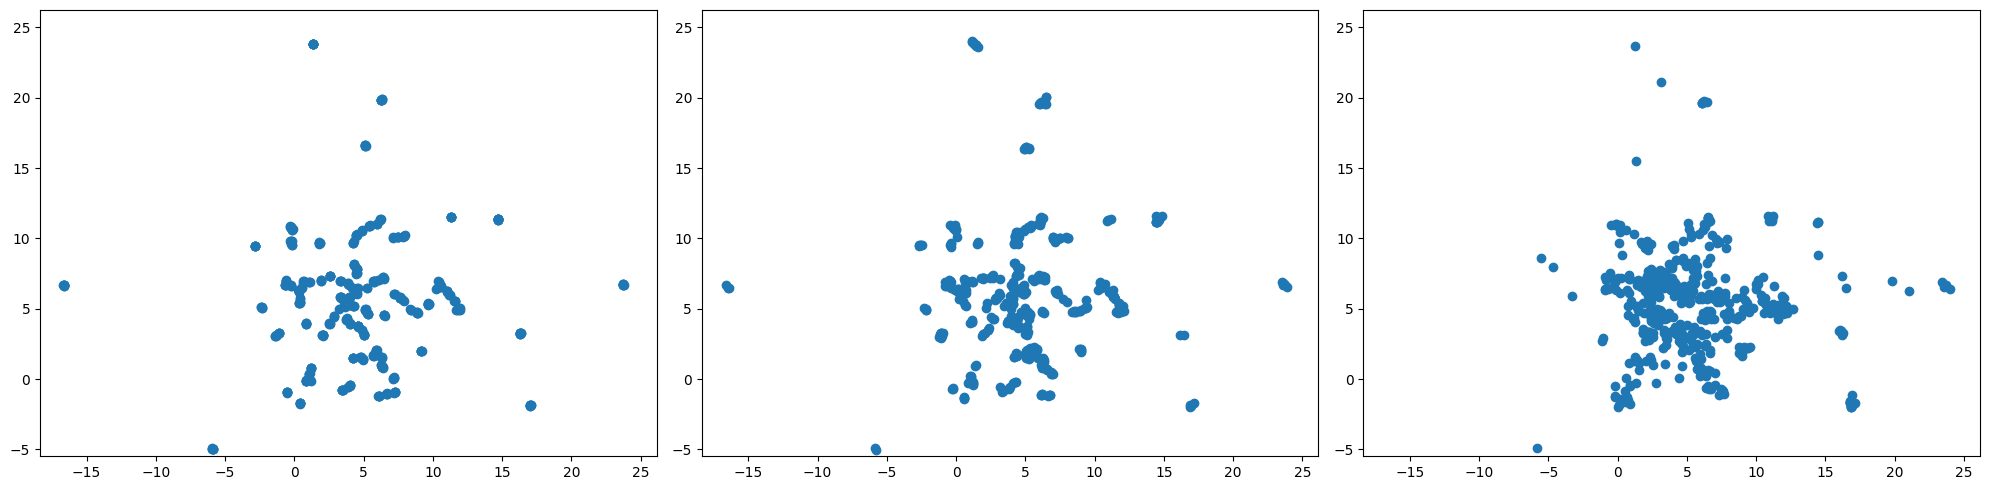

save/results_4000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


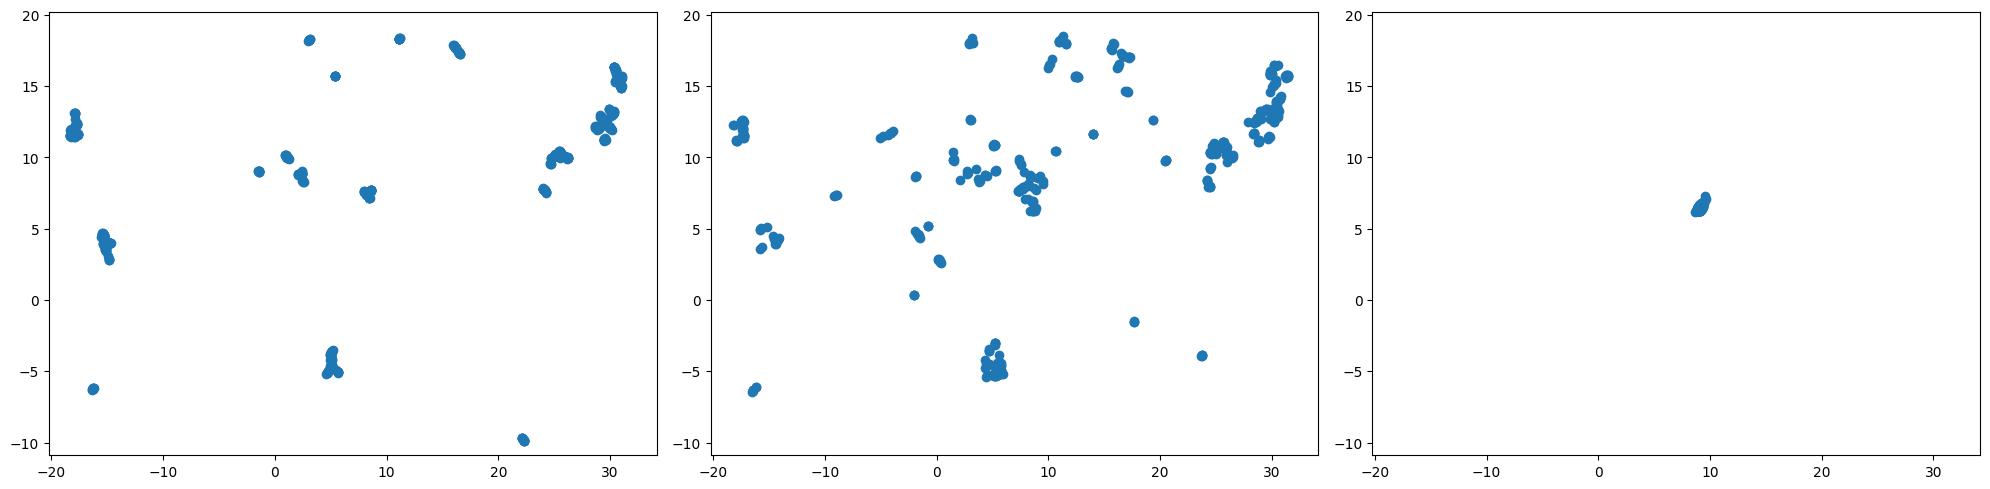

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


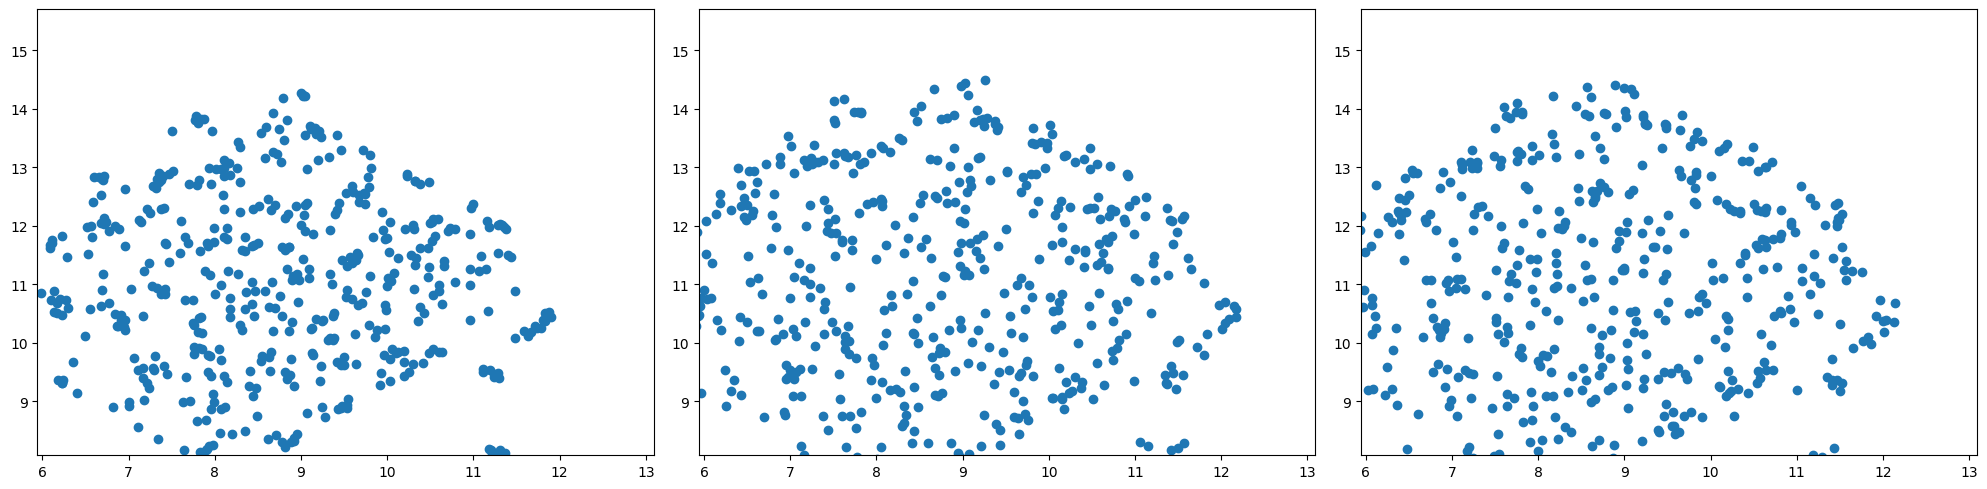

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


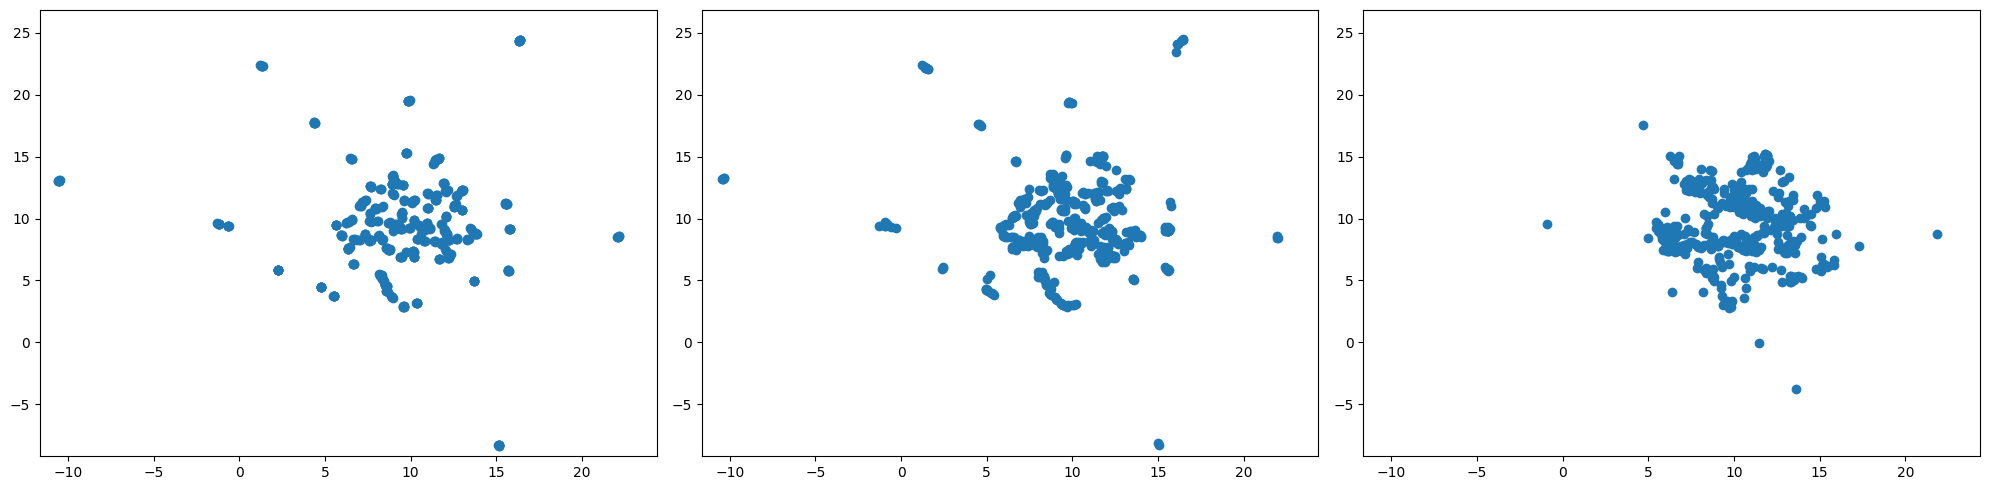

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


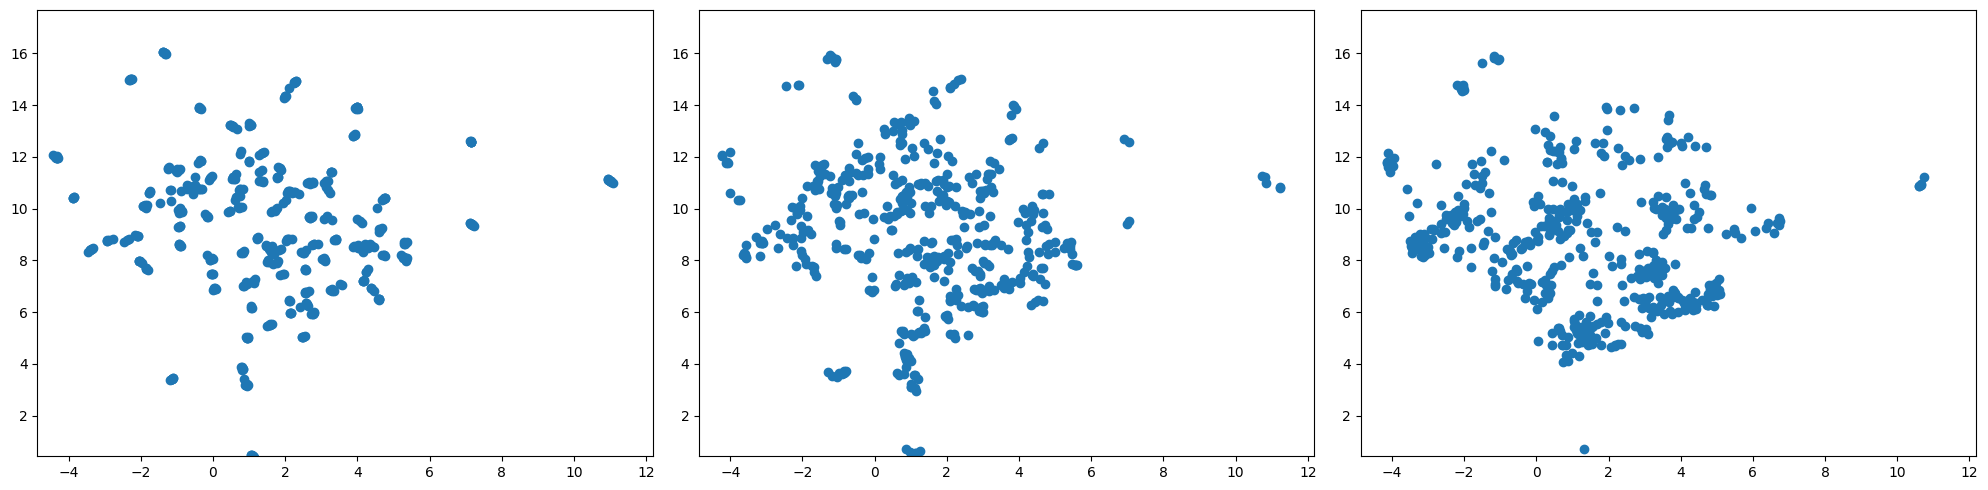

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


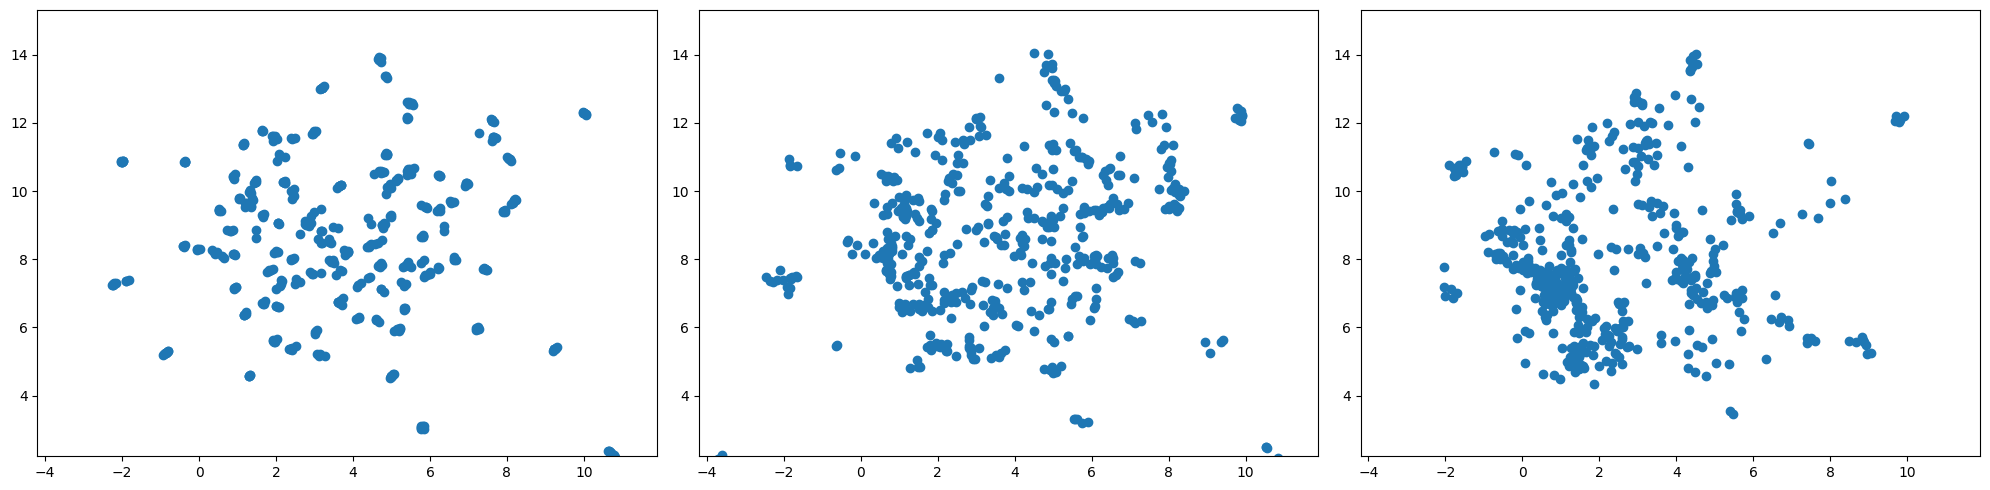

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


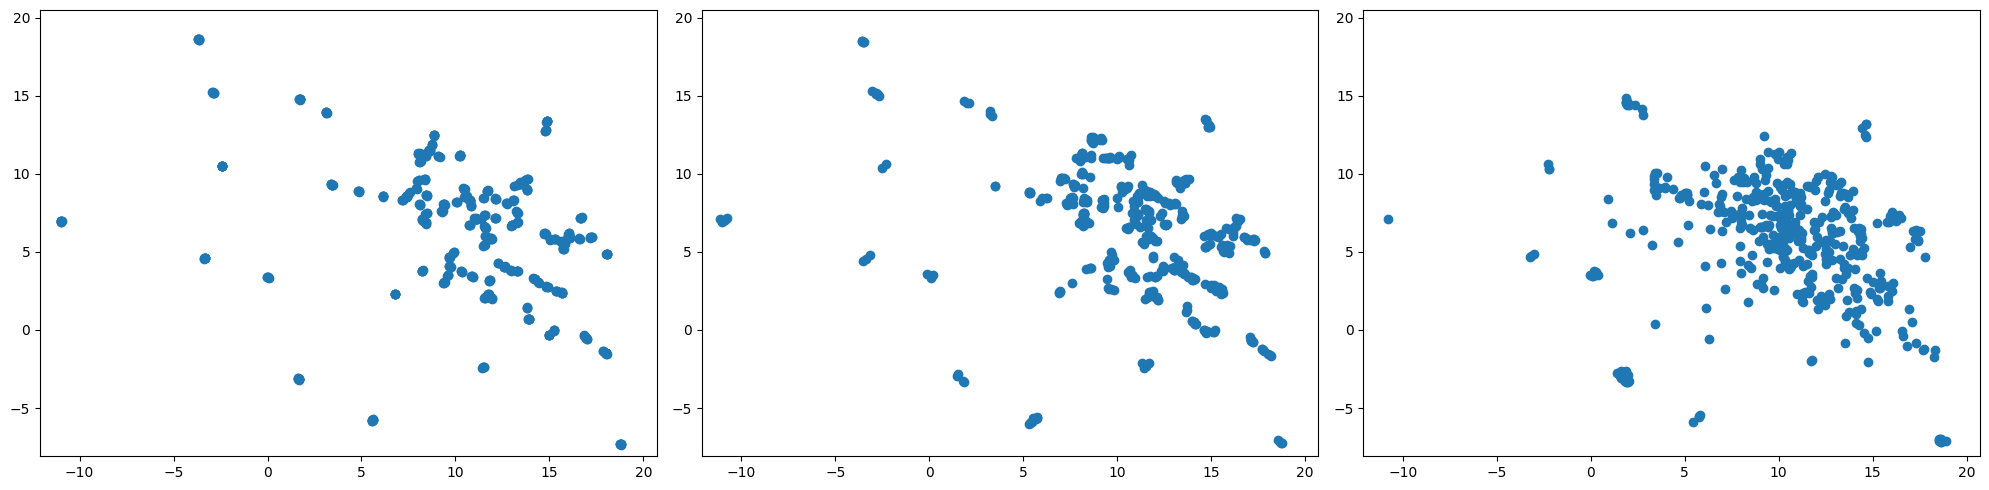

save/results_5000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


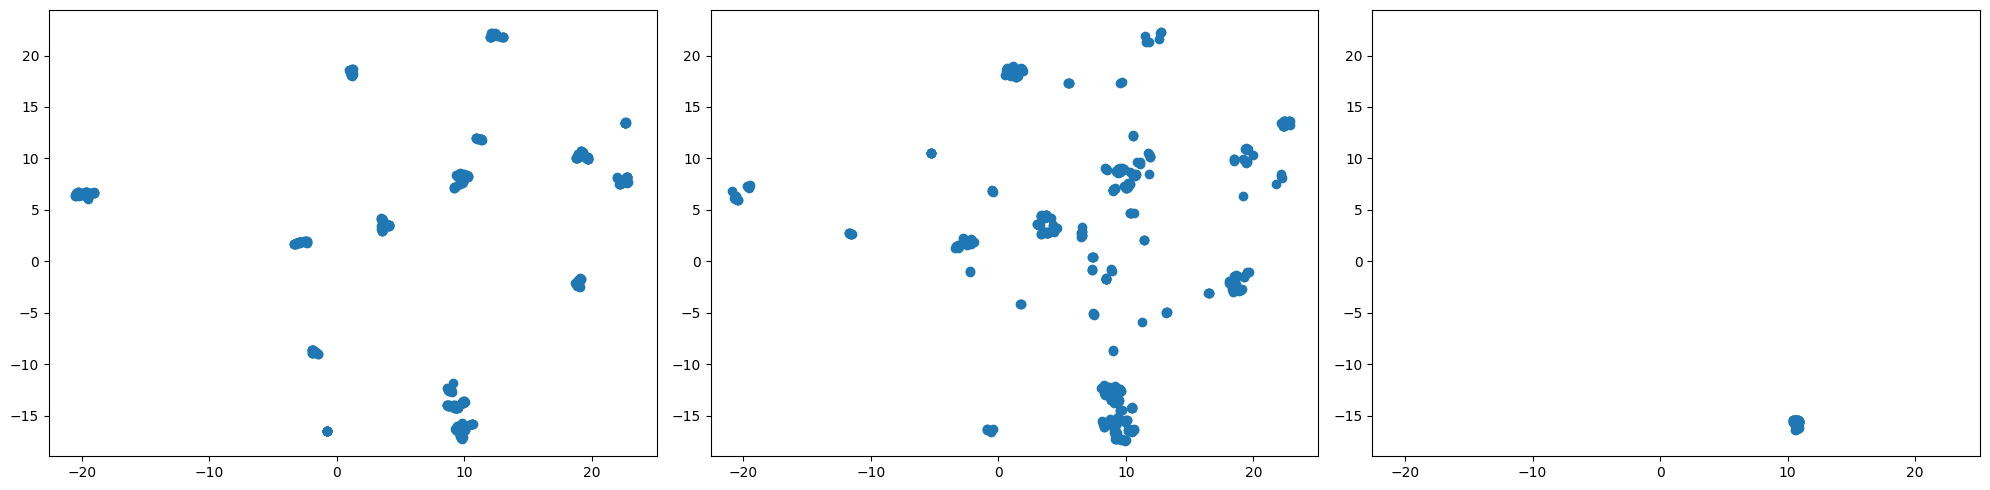

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


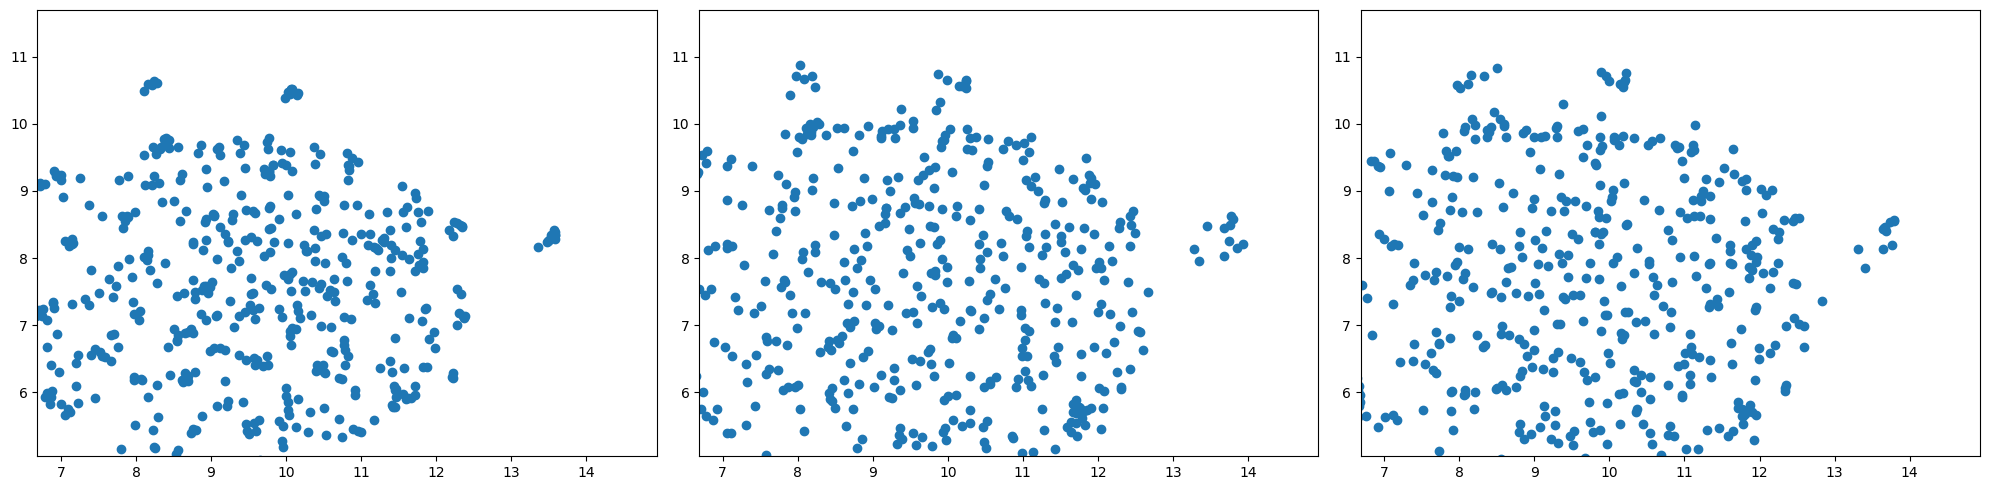

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


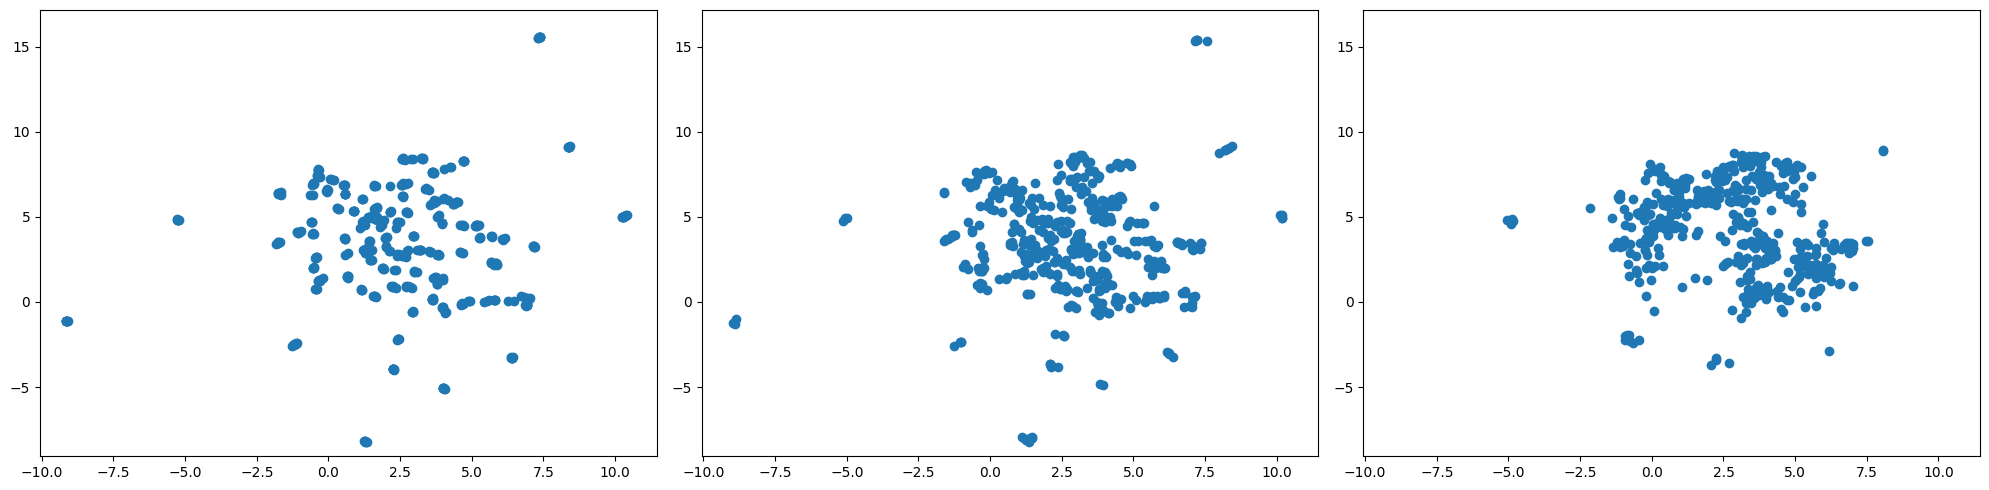

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


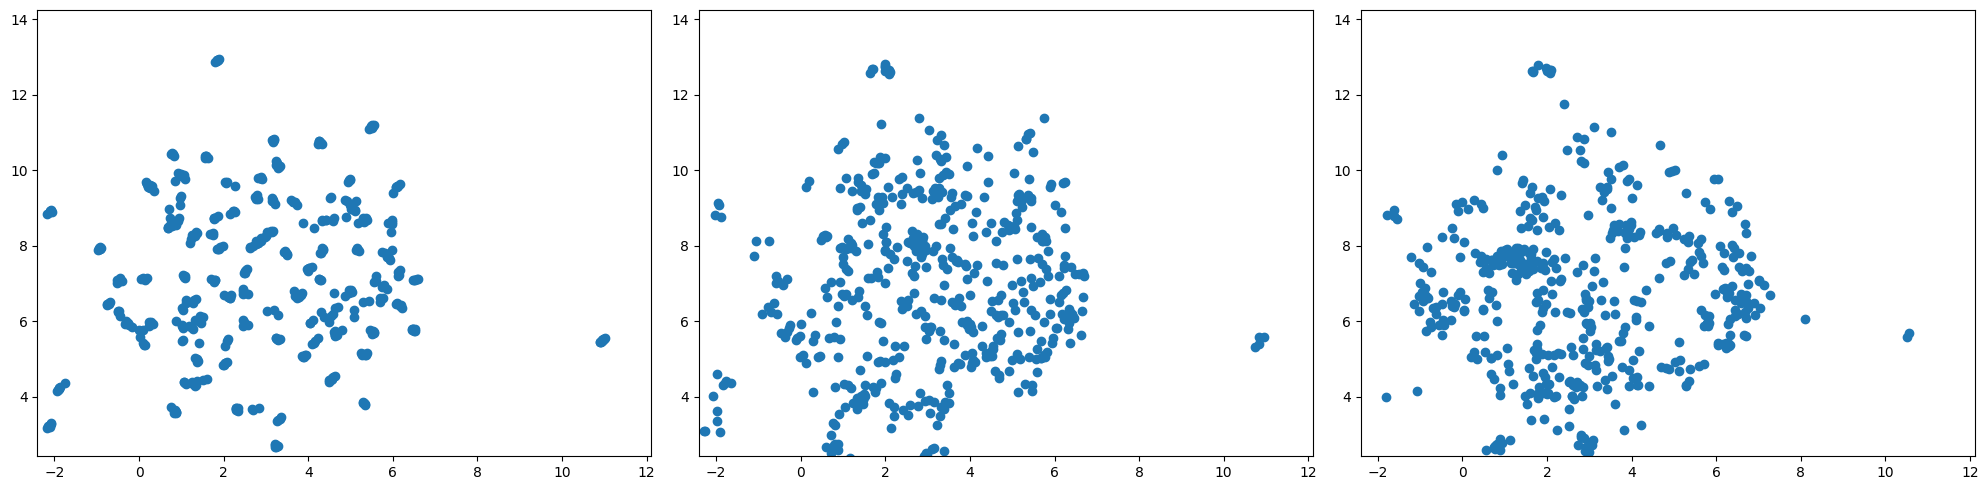

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


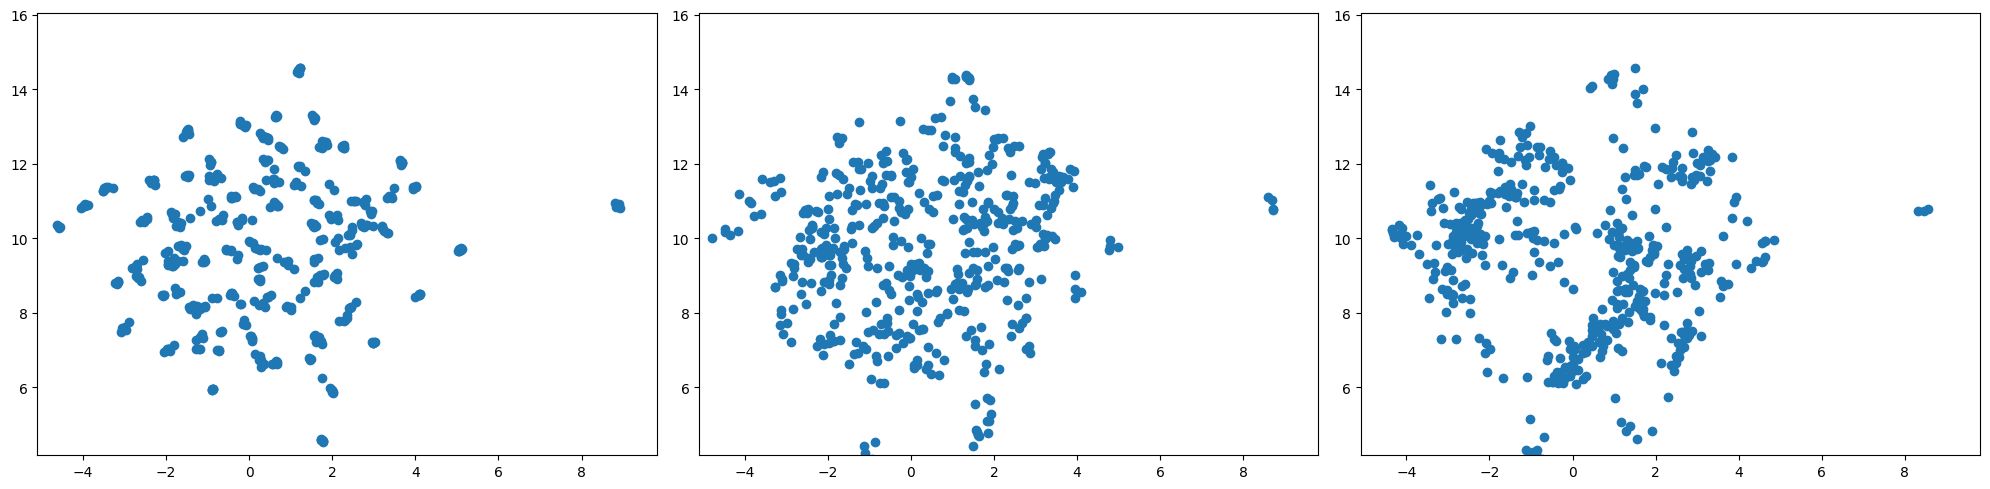

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


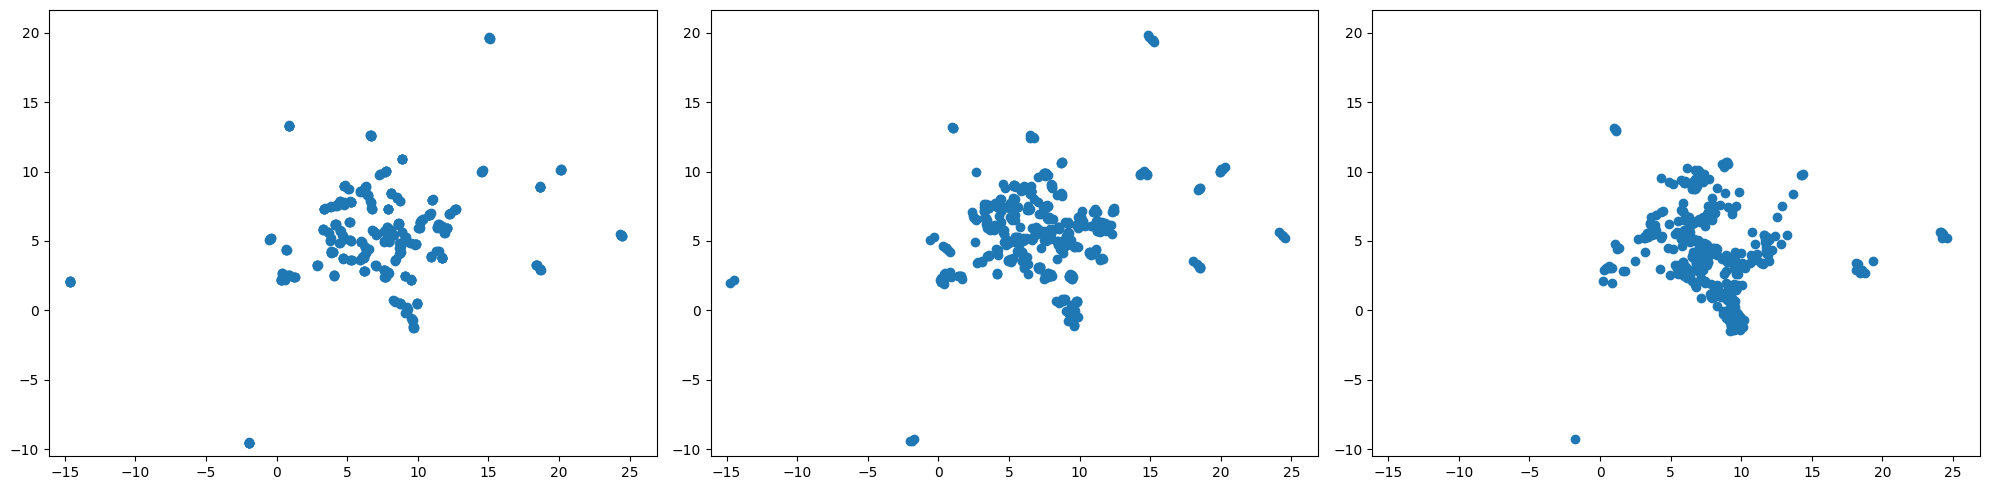

save/results_6000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


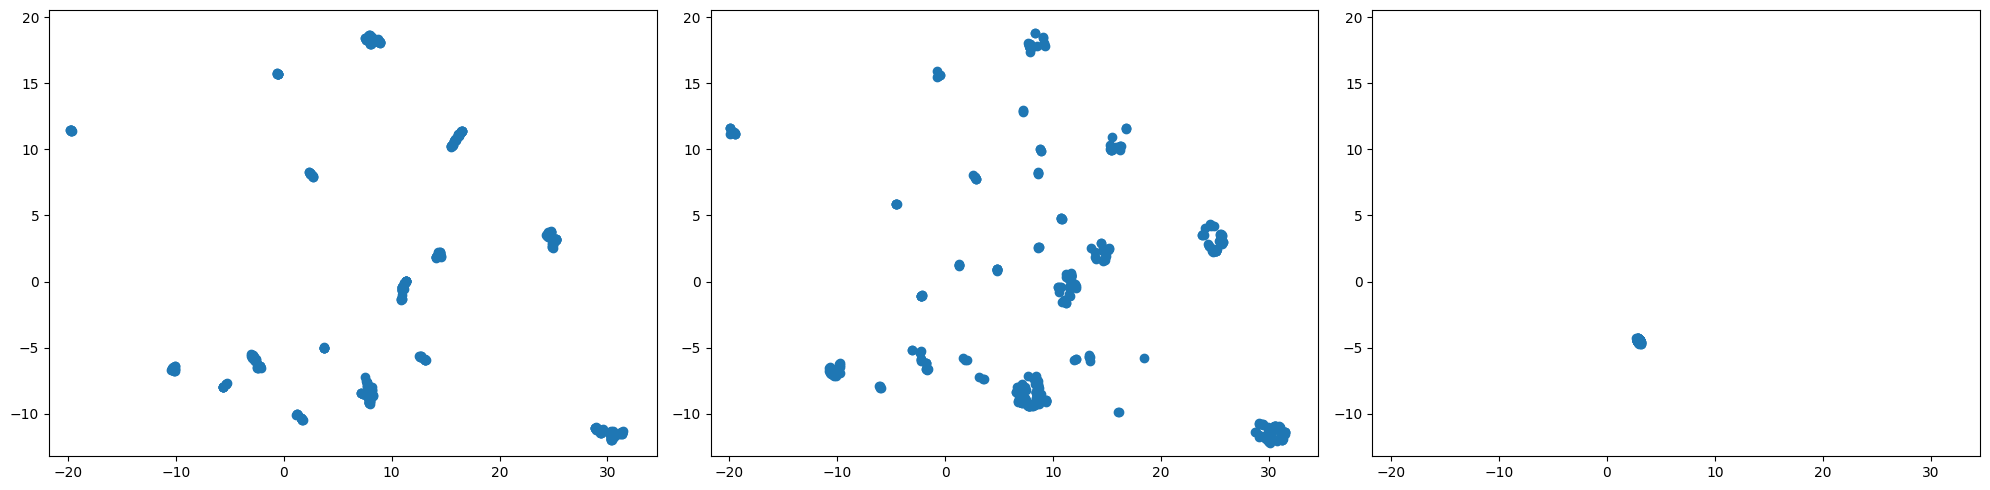

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


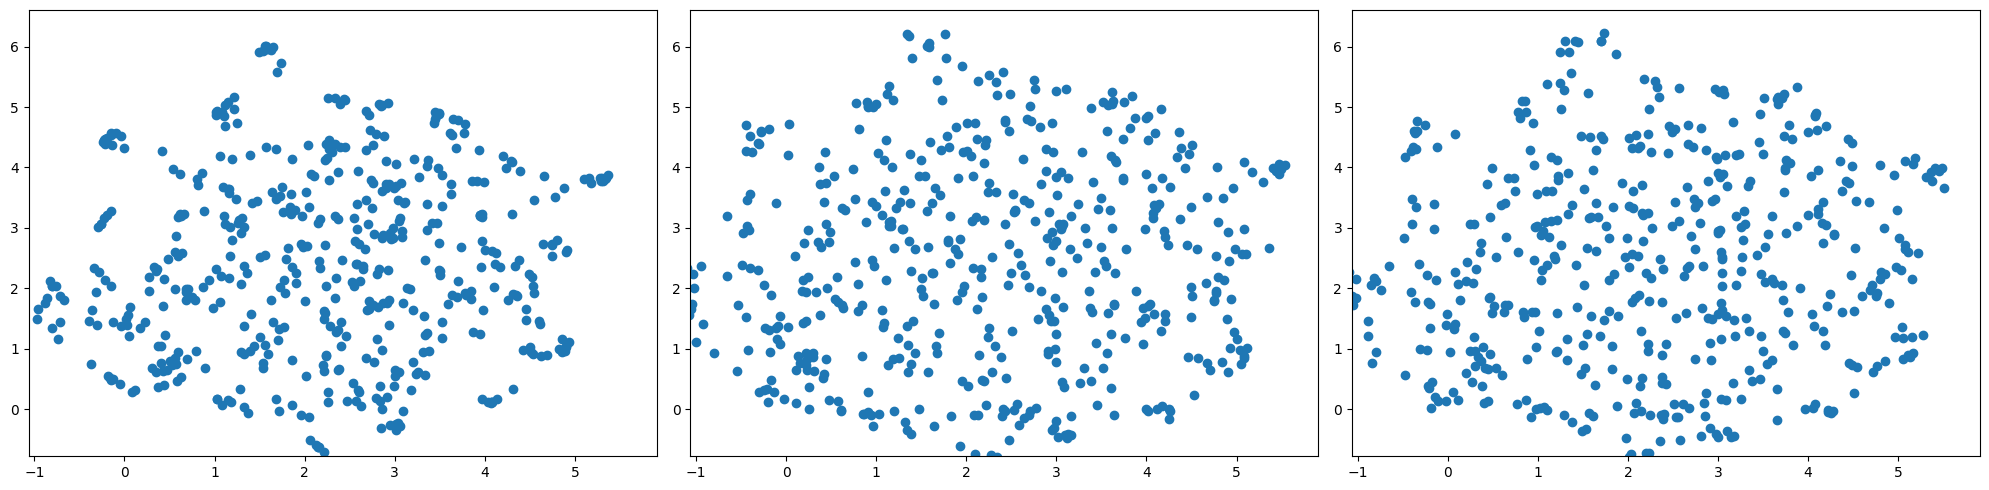

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


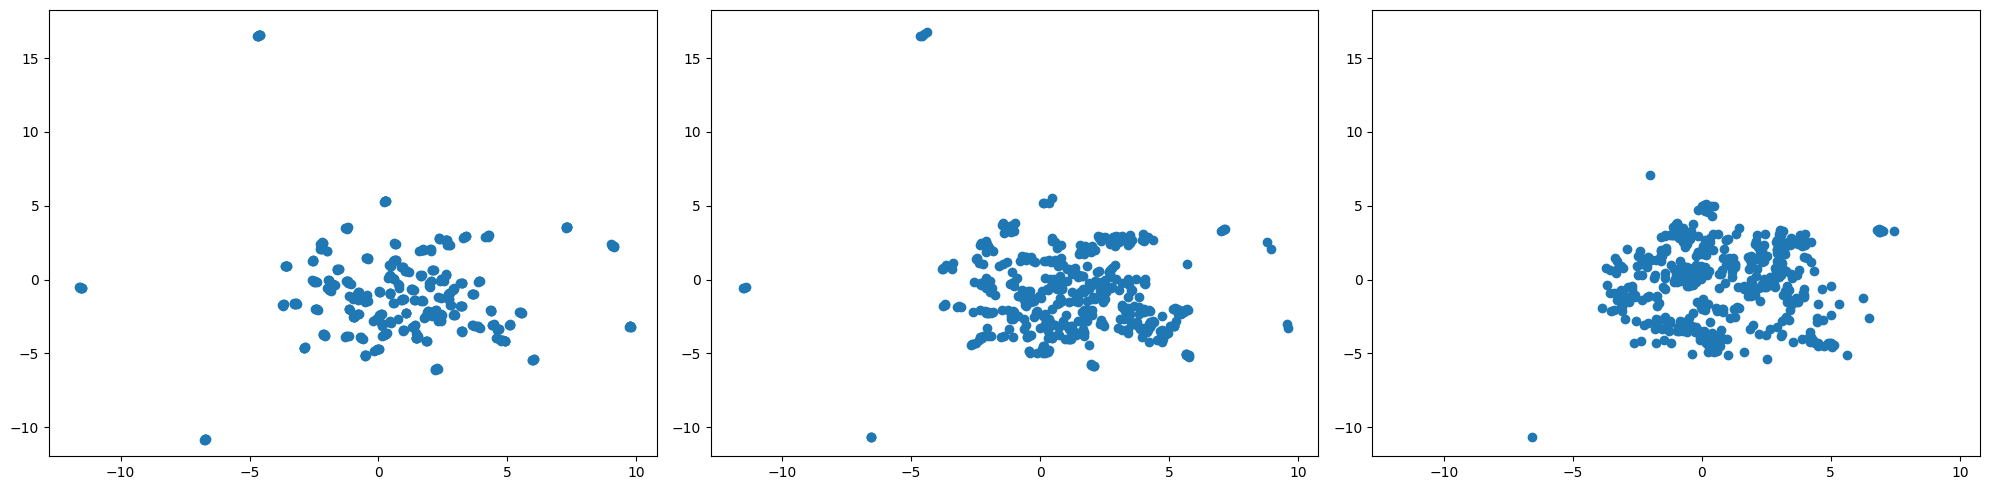

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


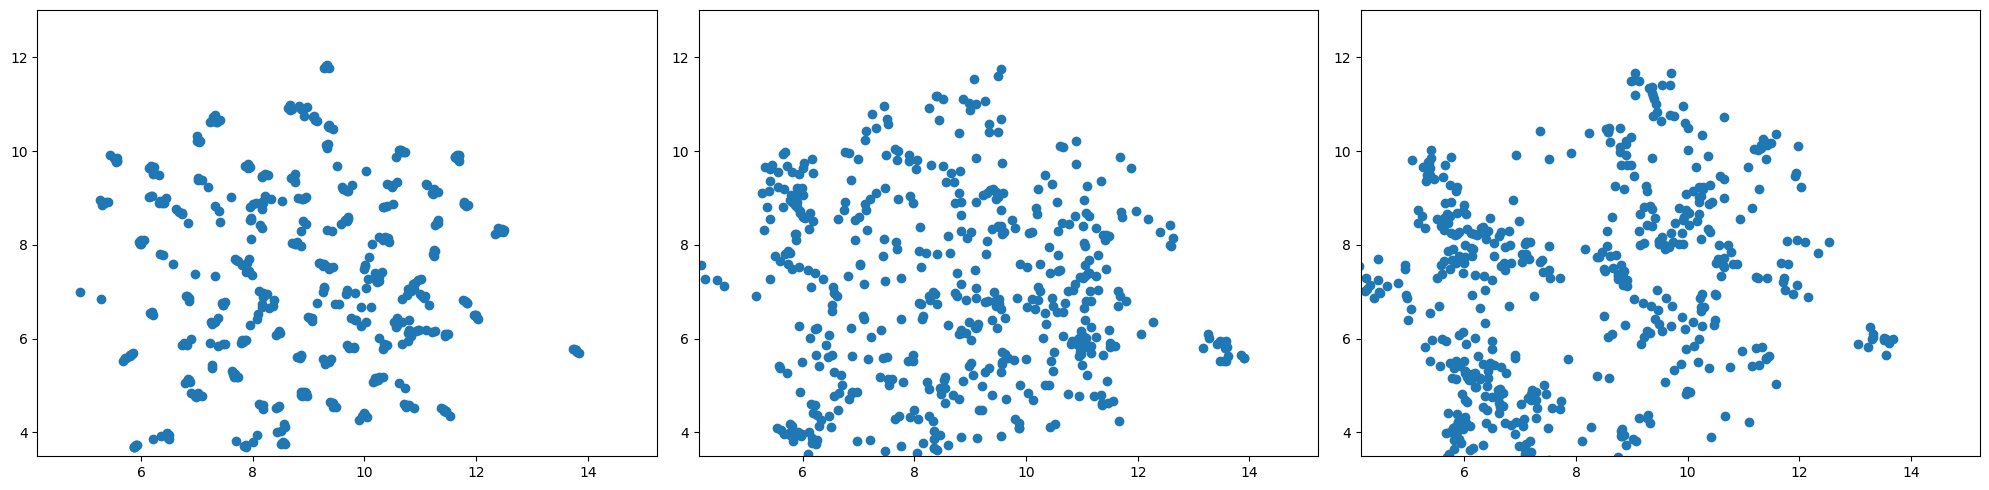

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


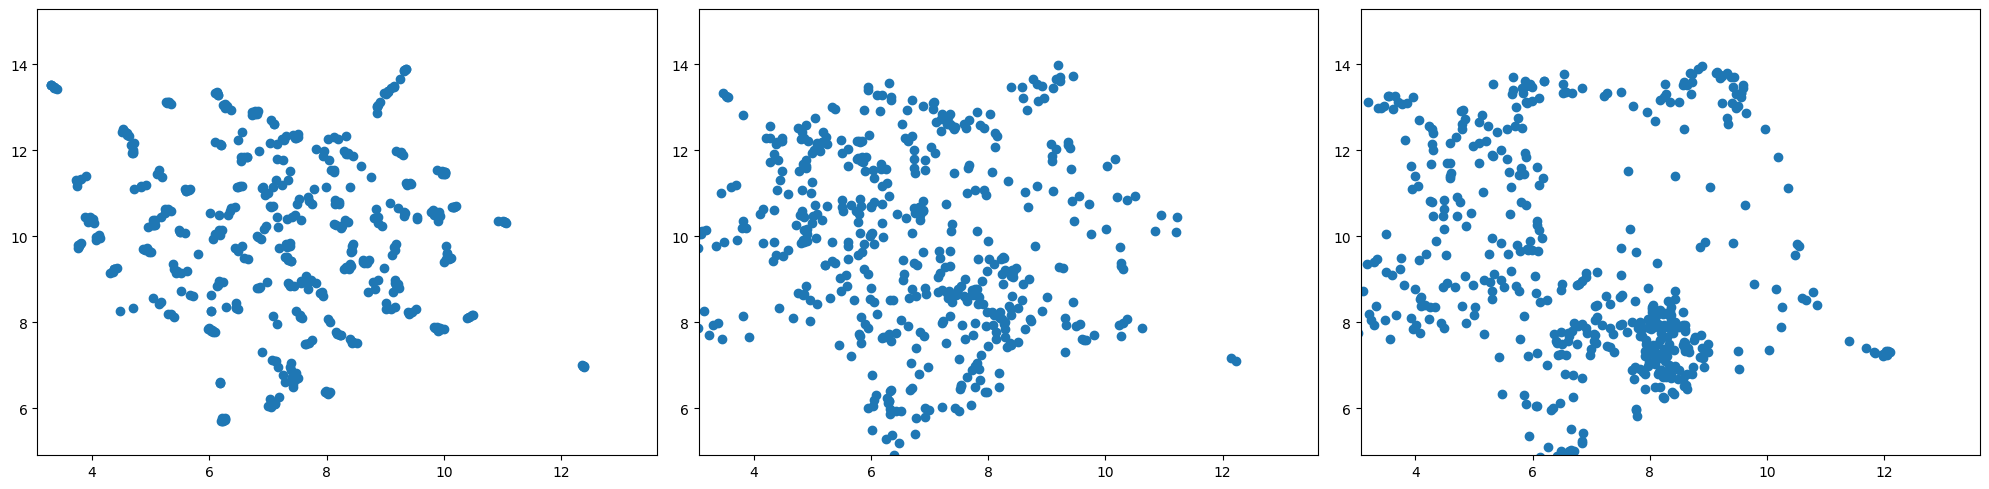

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


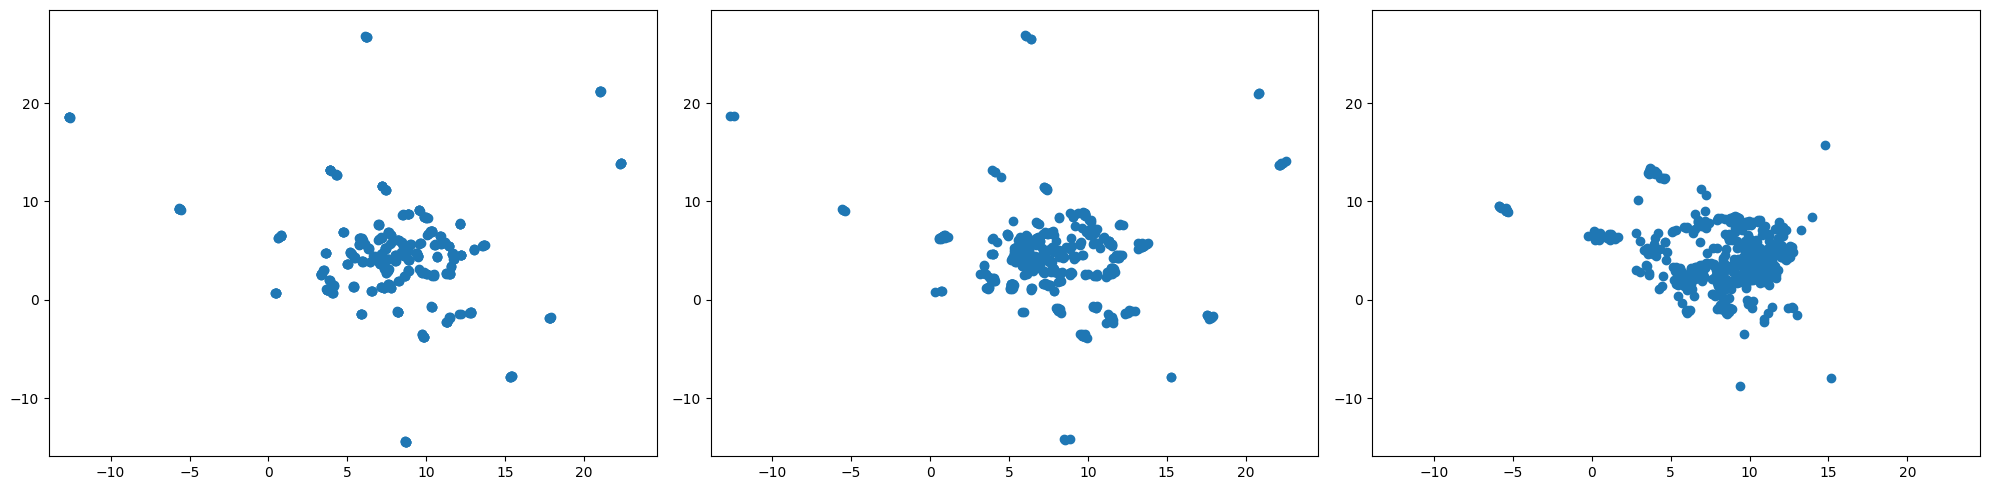

save/results_7000.pth
pos_encoder


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


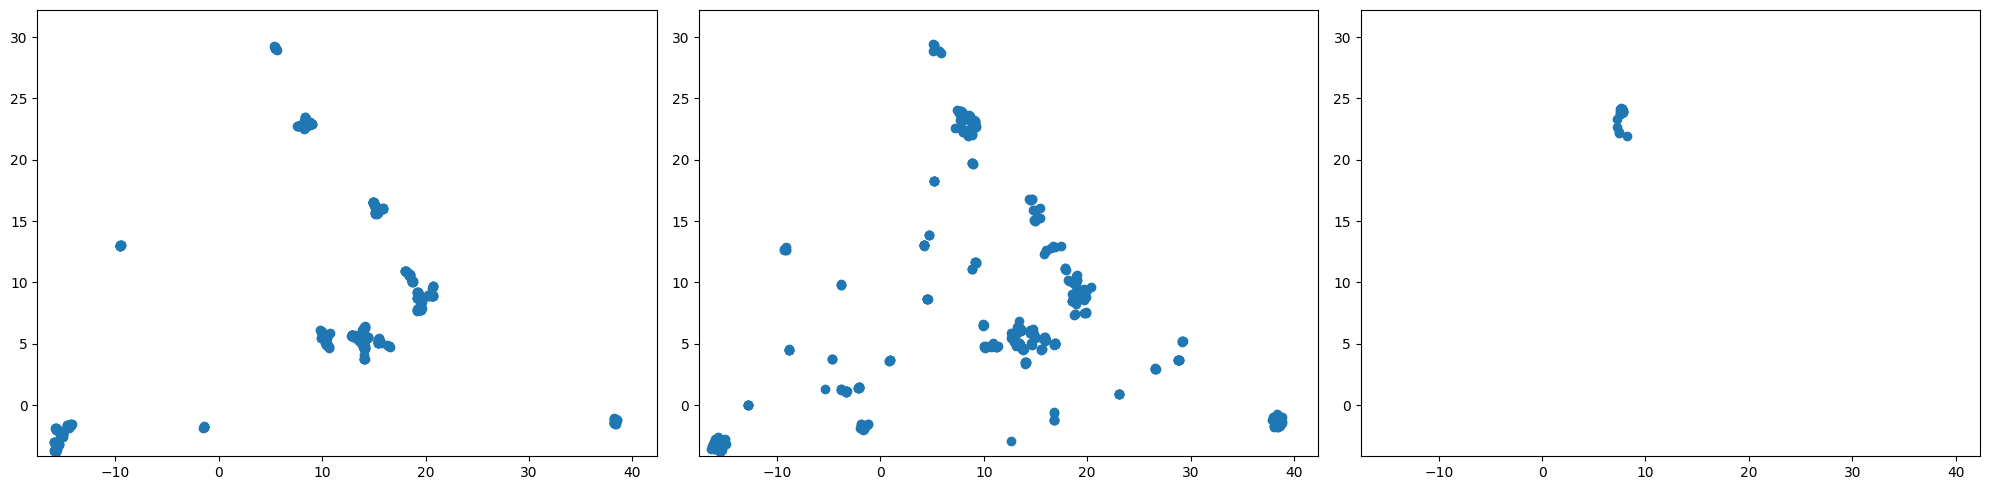

self_attn


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


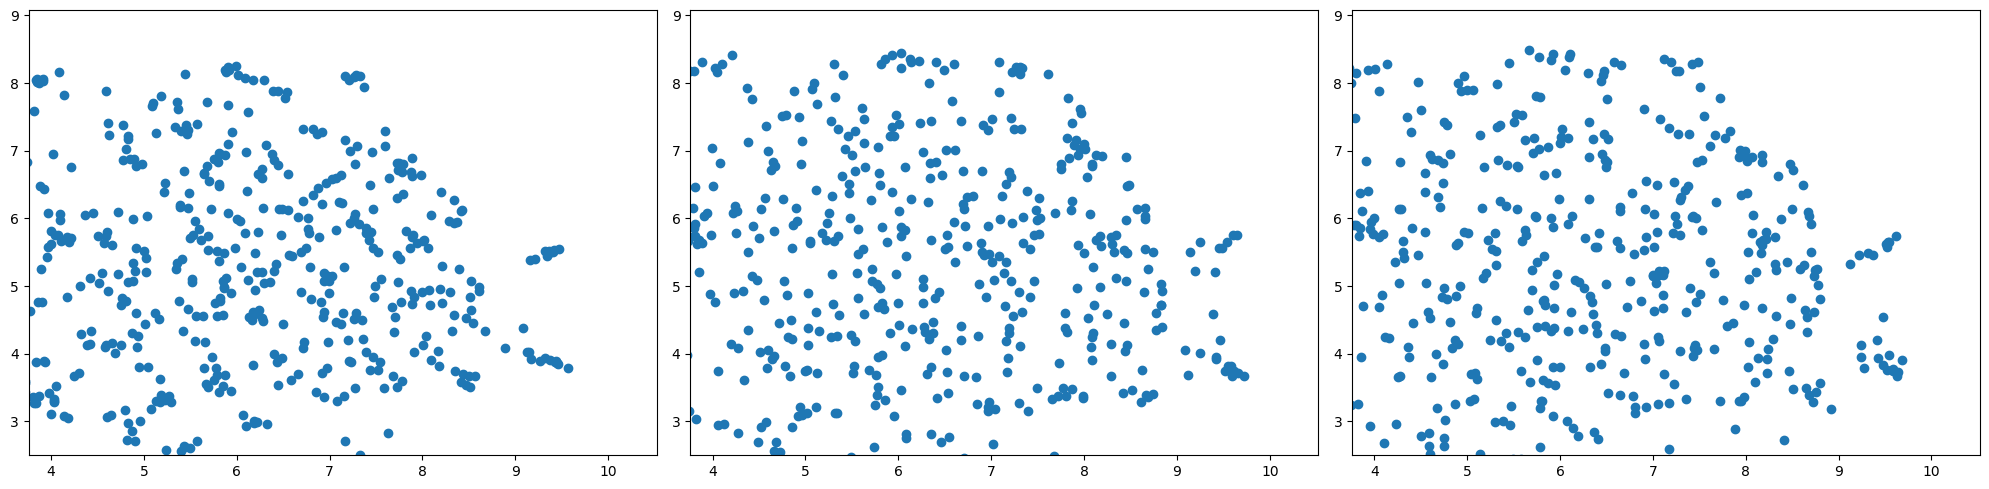

norm1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


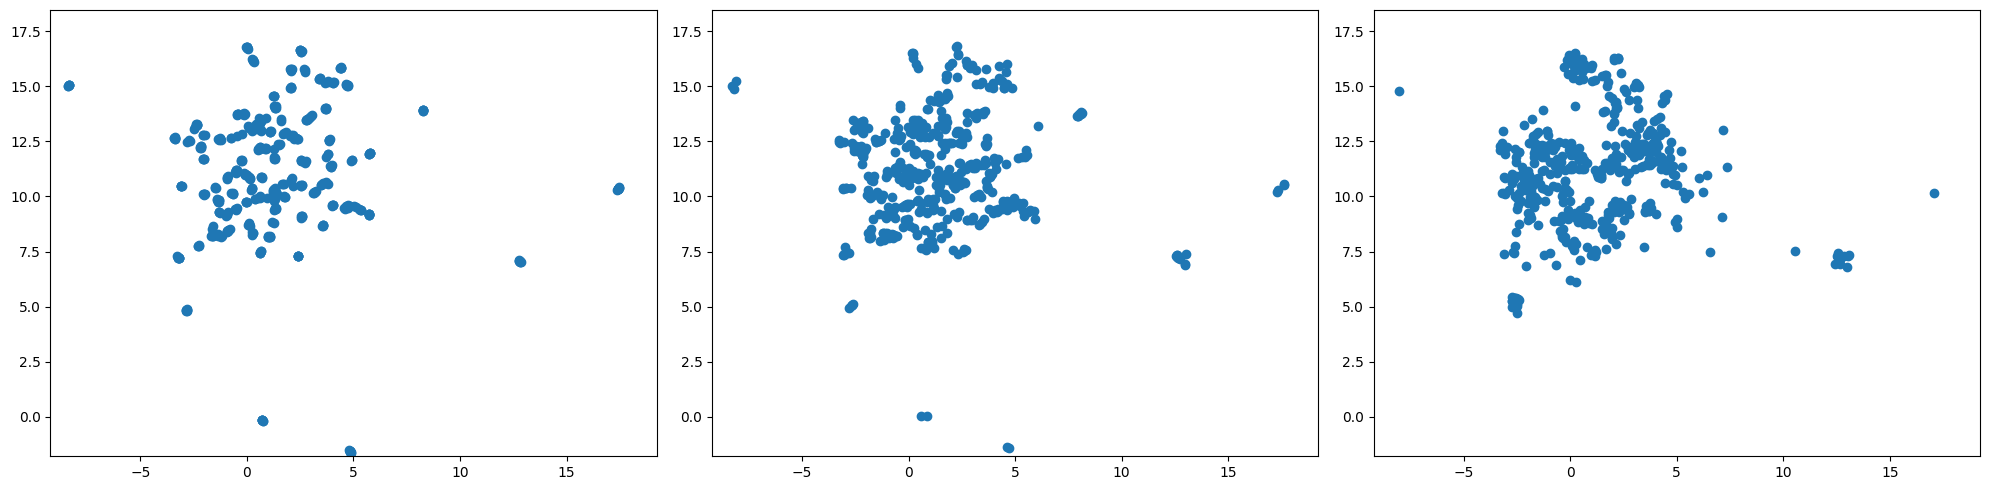

linear1


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


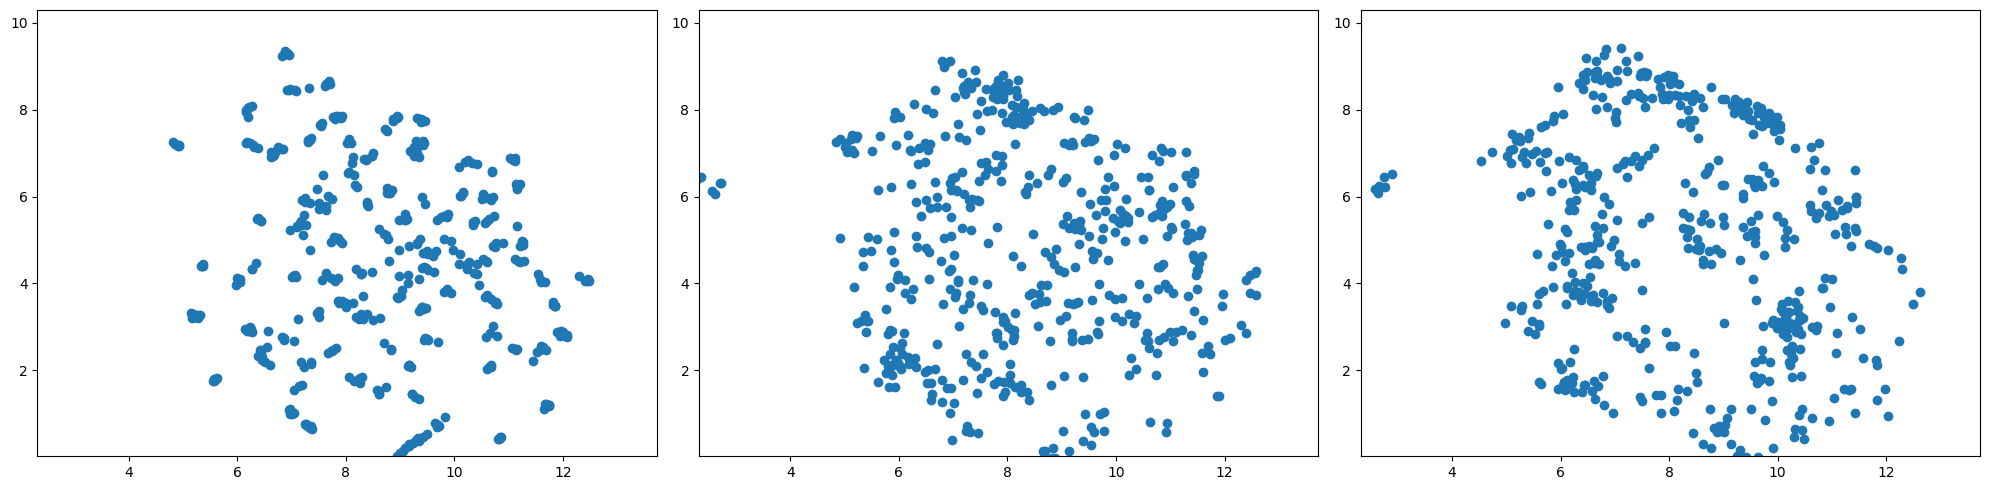

linear2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


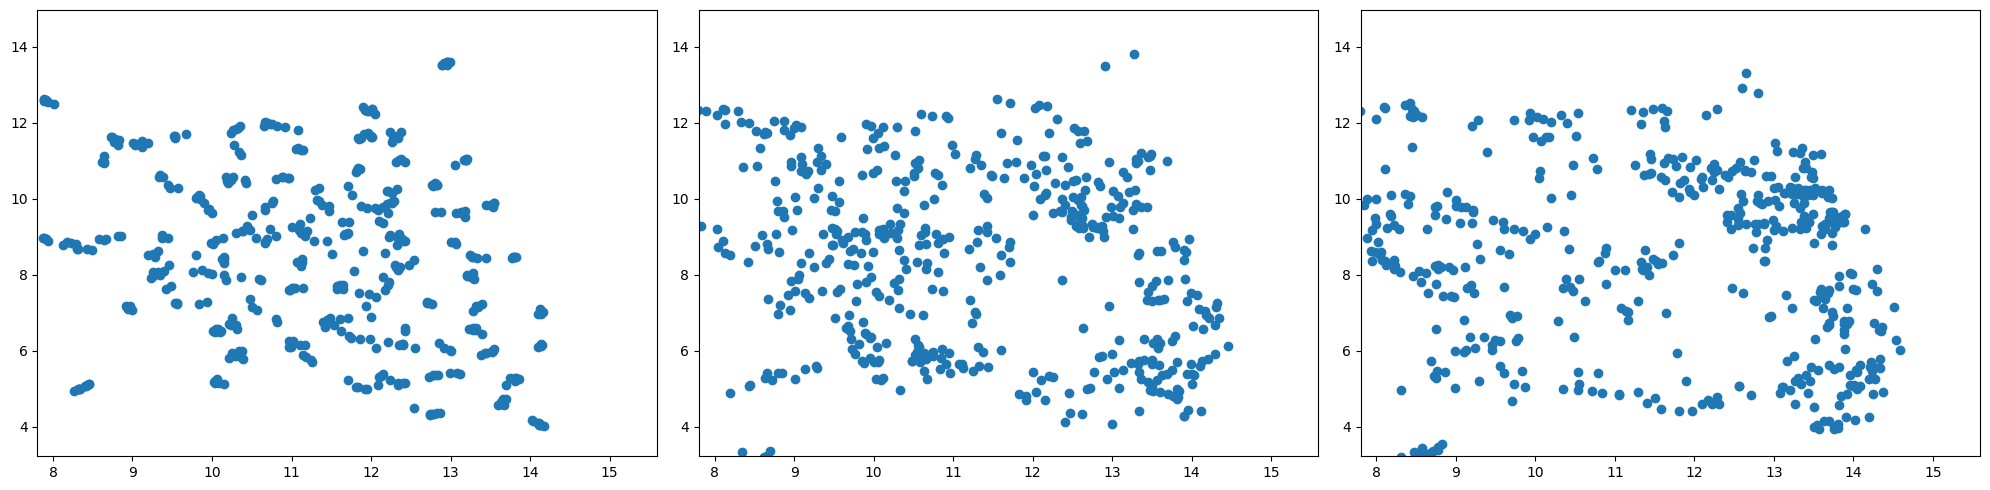

norm2


/tmp/ipykernel_6132/702754503.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(data), i + 1, xlim=(xmin, xmax), ylim=(ymin, ymax))


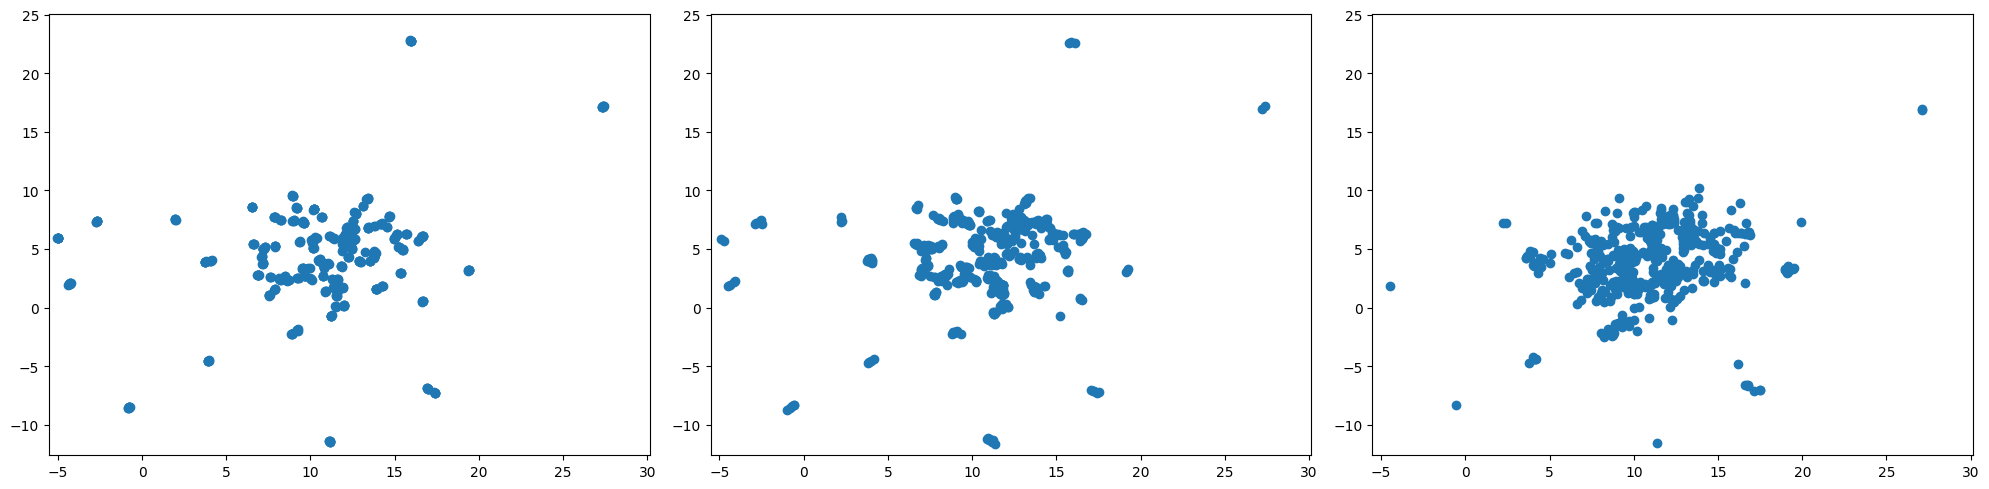

In [102]:
targets = [
           'save/results_3000.pth',
           'save/results_4000.pth',
           'save/results_5000.pth',
           'save/results_6000.pth',
           'save/results_7000.pth']
for model_path in targets:
    results = gen_test_result(model_path, sample)
    print(model_path)
    show_results(results)